# Advancing Stock Price Forecasting with LSTM Networks

### Aim:

To analyze and monitor the historical stock performance of MasterCard, Visa, American Express, and Capital One from 2008 to 2024, with the goal of providing actionable insights for financial forecasting, developing market strategies, and guiding investment decisions.

### Objective:

1. Collect and preprocess historical stock data for MasterCard, Visa, American Express, and Capital One (2008-2024) to ensure data integrity.
2. Analyze key financial indicators to identify trends and patterns in stock performance over the specified period.
3. Develop LSTM-based models to forecast stock prices using historical data and technical indicators.
4. Evaluate and compare the effectiveness of different forecasting models for short-term and long-term stock price predictions.
5. Assess the influence of macroeconomic indicators on the stock performance, identifying significant correlations.
6. Visualize historical and forecasted stock performance, along with sentiment and macroeconomic impacts, using Power BI.
7. Provide actionable insights and strategic recommendations based on the analysis, sentiment, and macroeconomic trends.

### Research Questions:

1. How accurately can LSTM models predict the stock prices of MasterCard, Visa, American Express, and Capital One compared to other traditional models?
2. How do technical indicators such as Moving Averages, Bollinger Bands, and Relative Strength Index (RSI) impact the stock price prediction accuracy of LSTM models?
3. How do macroeconomic indicators like interest rates, GDP growth, and inflation correlate with the stock prices of the four companies, and can these be integrated into LSTM models for better prediction accuracy?
4. How do external events, such as the 2008 financial crisis and the COVID-19 pandemic, impact the stock prices of MasterCard, Visa, American Express, and Capital One, and how well can LSTM models capture these effects?
5. What is the effectiveness of ensemble models that combine LSTM, ARIMA, Random Forest, and XGBoost predictions in improving stock price forecasts?
6. What are the limitations of using deep learning models like LSTM for stock price forecasting, and how do they compare to traditional statistical models under varying market conditions?

### Installing Essential Libraries

The following libraries will be installed to ensure that all necessary dependencies are available for data collection, preprocessing, modeling, and visualization:
- **`yfinance`**: To download stock data from Yahoo Finance.
- **`keras`** and **`tensorflow`**: For building deep learning models such as LSTM.
- **`prophet`**: For time series forecasting.
- **`statsmodels`**: For statistical analysis and ARIMA modeling.
- **`xgboost`**: For gradient boosting models.
- **`pmdarima`**: For automated ARIMA modeling.
- **`arch`**: For volatility modeling (ARCH/GARCH models).
- **`streamlit`**: For deploying web applications.
- **`plotly`**: For interactive visualizations.


In [ ]:
# To install all the necessary libraries required for this analysis.
!pip install yfinance keras tensorflow prophet statsmodels xgboost pmdarima arch streamlit plotly

In [31]:
# To import all the necessary libraries that will be used throughout the notebook.
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from prophet import Prophet
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.model_selection import train_test_split

### Data Collection:

The stock data for MasterCard, Visa, American Express, and Capital One is fetched from Yahoo Finance using **`yfinance`** from 2008 to 2024.

In [32]:
# To define stock tickers and download the historical data for these tickers using the yfinance library.
tickers = ['MA', 'V', 'AXP', 'COF']
start_date = '2008-04-02'
end_date = '2024-08-01'
data_dict = {}
for ticker in tickers:
    data_dict[ticker] = yf.download(ticker, start=start_date, end=end_date)
    data_dict[ticker].reset_index(inplace=True)
    data_dict[ticker]['Date'] = pd.to_datetime(data_dict[ticker]['Date'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Data Preparation:

The collected stock data is combined into a single DataFrame, with adjustments for missing or duplicated data.

In [33]:
# To combine the data from different tickers into a single DataFrame.
combined_data = pd.DataFrame({
    'Date': data_dict['MA']['Date'],
    'Open_M': data_dict['MA']['Open'],
    'High_M': data_dict['MA']['High'],
    'Low_M': data_dict['MA']['Low'],
    'Close_M': data_dict['MA']['Close'],
    'Adj Close_M': data_dict['MA']['Adj Close'],
    'Volume_M': data_dict['MA']['Volume'],
    'Open_V': data_dict['V']['Open'],
    'High_V': data_dict['V']['High'],
    'Low_V': data_dict['V']['Low'],
    'Close_V': data_dict['V']['Close'],
    'Adj Close_V': data_dict['V']['Adj Close'],
    'Volume_V': data_dict['V']['Volume'],
    'Open_AXP': data_dict['AXP']['Open'],
    'High_AXP': data_dict['AXP']['High'],
    'Low_AXP': data_dict['AXP']['Low'],
    'Close_AXP': data_dict['AXP']['Close'],
    'Adj Close_AXP': data_dict['AXP']['Adj Close'],
    'Volume_AXP': data_dict['AXP']['Volume'],
    'Open_COF': data_dict['COF']['Open'],
    'High_COF': data_dict['COF']['High'],
    'Low_COF': data_dict['COF']['Low'],
    'Close_COF': data_dict['COF']['Close'],
    'Adj Close_COF': data_dict['COF']['Adj Close'],
    'Volume_COF': data_dict['COF']['Volume']
})

In [34]:
# To save combined data to a CSV file.
csv_path = '/Users/wilson/Desktop/Diss/Stock_data.csv'
combined_data.to_csv(csv_path, index=False)
print(f"Data saved to '{csv_path}'")

# To load the combined stock data
df = pd.read_csv(csv_path)

# To convert the 'Date' column of the loaded DataFrame into datetime format
df['Date'] = pd.to_datetime(df['Date'])

Data saved to '/Users/wilson/Desktop/Diss/Stock_data.csv'


### Data Overview:

This section provides an overview of the dataset.

In [35]:
df.head()

Date   Open_M   High_M    Low_M  Close_M  Adj Close_M  Volume_M   Open_V   High_V    Low_V  Close_V  Adj Close_V   Volume_V  Open_AXP  High_AXP  Low_AXP  Close_AXP  Adj Close_AXP  Volume_AXP  Open_COF  High_COF  Low_COF  Close_COF  Adj Close_COF  Volume_COF
0 2008-04-01 22.67400 23.37500 22.45000 22.96000     21.14206  39142000 15.76500 15.92000 15.07750 15.40250     13.71776   60410800  44.90000  47.22000 44.90000   47.09000       36.18642    14236500  50.51000  53.57000 50.51000   53.48000       40.25616     8193200
1 2008-04-02 22.93700 23.00000 22.33400 22.37500     20.60338  21940000 15.43000 15.58000 15.12500 15.58000     13.87584   43836400  47.48000  47.73000 46.25000   46.65000       35.84830     8346500  53.67000  55.00000 52.51000   53.18000       40.03035     7141300
2 2008-04-03 22.20000 23.12500 22.20000 23.12500     21.29399  25037000 15.48750 16.57250 15.45500 16.37500     14.58388  100868000  46.00000  46.91000 45.84000   46.68000       35.87134     6051900  51.45000  53.19000 51.08000   52.99000       39.88731     7644900
3 2008-04-04 23.19700 23.28500 22.52800 22.65700     20.86305  19508000 16.22500 16.33000 15.93750 16.12000     14.35678   36394400  46.66000  46.95000 45.80000   46.11000       35.43333     5830100  52.51000  53.25000 50.92000   51.27000       38.59263     7923600
4 2008-04-07 22.89400 23.28200 22.52400 22.62500     20.84738  19722000 16.27500 16.45000 16.00500 16.26000     14.48146   28301600  46.54000  47.38000 46.30000   46.55000       35.77146     6903800  52.00000  54.98000 51.70000   53.06000       39.94000     8707700

In [36]:
df.tail()

Date    Open_M    High_M     Low_M   Close_M  Adj Close_M  Volume_M    Open_V    High_V     Low_V   Close_V  Adj Close_V  Volume_V  Open_AXP  High_AXP   Low_AXP  Close_AXP  Adj Close_AXP  Volume_AXP  Open_COF  High_COF   Low_COF  Close_COF  Adj Close_COF  Volume_COF
4107 2024-07-25 433.94000 437.70001 429.56000 429.60001    429.60001   2384300 255.39000 258.22000 252.70000 253.74001    253.23219   8573300 240.00000 244.96001 239.39000  240.17999      240.17999     3828800 146.17000 150.05000 145.49001  148.09000      147.43089     2666000
4108 2024-07-26 432.28000 440.78000 432.10999 438.17999    438.17999   2039600 255.59000 261.20001 255.59000 259.45999    258.94073   7062200 241.92999 246.39000 241.88000  245.89000      245.89000     2174400 149.28000 150.10001 148.41000  149.36000      148.69525     1795100
4109 2024-07-29 438.79999 442.92001 435.42001 441.29999    441.29999   2248600 260.32001 262.70999 258.57999 261.60001    261.07648   6068100 246.63000 247.96001 244.31000  247.89000      247.89000     2059300 149.52000 149.86000 147.38000  149.06000      148.39658     1779200
4110 2024-07-30 443.76999 448.73001 443.01001 447.45001    447.45001   2266900 263.23001 264.29999 261.01001 263.10001    262.57346   5941800 249.46001 253.67999 249.23000  252.48000      252.48000     2498800 150.74001 152.64999 149.32001  152.25000      151.57239     2387400
4111 2024-07-31 462.00000 474.00000 457.54001 463.70999    463.70999   4313600 264.54001 266.35999 264.25000 265.67001    265.13834   7642500 253.11000 256.23999 252.42999  253.03999      253.03999     2180700 151.96001 152.87000 150.97000  151.39999      150.72617     2026800

In [37]:
df.dtypes

Date             datetime64[ns]
Open_M                  float64
High_M                  float64
Low_M                   float64
Close_M                 float64
Adj Close_M             float64
Volume_M                  int64
Open_V                  float64
High_V                  float64
Low_V                   float64
Close_V                 float64
Adj Close_V             float64
Volume_V                  int64
Open_AXP                float64
High_AXP                float64
Low_AXP                 float64
Close_AXP               float64
Adj Close_AXP           float64
Volume_AXP                int64
Open_COF                float64
High_COF                float64
Low_COF                 float64
Close_COF               float64
Adj Close_COF           float64
Volume_COF                int64
dtype: object

In [38]:
df.describe()

Open_M     High_M      Low_M    Close_M  Adj Close_M        Volume_M     Open_V     High_V      Low_V    Close_V  Adj Close_V        Volume_V   Open_AXP   High_AXP    Low_AXP  Close_AXP  Adj Close_AXP     Volume_AXP   Open_COF   High_COF    Low_COF  Close_COF  Adj Close_COF      Volume_COF
count 4112.00000 4112.00000 4112.00000 4112.00000   4112.00000      4112.00000 4112.00000 4112.00000 4112.00000 4112.00000   4112.00000      4112.00000 4112.00000 4112.00000 4112.00000 4112.00000     4112.00000     4112.00000 4112.00000 4112.00000 4112.00000 4112.00000     4112.00000      4112.00000
mean   164.57454  166.21141  162.90200  164.60757    160.49573   8440572.49514  107.89529  108.87306  106.90727  107.91214    104.28425  14405061.18677   92.98332   93.93279   92.02542   93.00030       85.63477  6347863.25389   78.90223   79.90798   77.91036   78.92537       70.23627   4428507.87938
std    139.73722  141.07087  138.36809  139.76010    139.01823  11801982.09254   82.96901   83.67277   82.25115   82.97216     82.41742  16149370.67458   49.58497   50.03276   49.15570   49.60651       51.04293  5970524.02814   33.19451   33.49856   32.92615   33.21519       33.94919   4501896.66552
min     12.10000   12.73600   11.30500   11.91800     11.00844    641100.00000   10.67250   11.04750   10.44500   10.60500      9.47716   1640900.00000    9.99000   10.66000    9.71000   10.26000        8.05886   665800.00000    7.95000    9.34000    7.80000    8.31000        6.58850    326200.00000
25%     42.00575   42.38475   41.73975   42.02300     39.14004   2990475.00000   29.50188   29.79875   29.23812   29.53250     27.00940   6668300.00000   54.99750   55.66000   54.45000   55.10000       46.91760  3051000.00000   53.49500   54.23750   52.67750   53.48000       42.92096   2279975.00000
50%     97.20000   97.86000   96.54500   97.23500     92.36294   4432400.00000   78.42500   79.01500   77.95000   78.47500     74.04680   9467000.00000   83.74000   84.60500   82.86500   83.76500       73.36994  4331350.00000   78.55500   79.25000   77.81000   78.63000       66.72832   3111000.00000
75%    305.00250  308.35499  301.46501  304.91251    298.97548   8443775.00000  193.50000  195.53251  190.78250  193.25000    187.89448  15450475.00000  120.01500  120.97250  118.95000  120.00250      112.59303  7230225.00000   96.13250   97.24250   95.16250   96.22000       87.66395   4832125.00000
max    488.53000  490.00000  483.64001  488.64001    487.24243 178722000.00000  290.00000  290.95999  287.89999  290.37000    289.25357 337533600.00000  253.11000  256.23999  252.42999  253.03999      253.03999 90336900.00000  177.17999  177.95000  175.78999  177.73000      167.29533 114574400.00000

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4112 entries, 0 to 4111
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           4112 non-null   datetime64[ns]
 1   Open_M         4112 non-null   float64       
 2   High_M         4112 non-null   float64       
 3   Low_M          4112 non-null   float64       
 4   Close_M        4112 non-null   float64       
 5   Adj Close_M    4112 non-null   float64       
 6   Volume_M       4112 non-null   int64         
 7   Open_V         4112 non-null   float64       
 8   High_V         4112 non-null   float64       
 9   Low_V          4112 non-null   float64       
 10  Close_V        4112 non-null   float64       
 11  Adj Close_V    4112 non-null   float64       
 12  Volume_V       4112 non-null   int64         
 13  Open_AXP       4112 non-null   float64       
 14  High_AXP       4112 non-null   float64       
 15  Low_AXP        4112 n

### Feature Engineering:

It helps capture trends, patterns, and signals in stock prices, allowing machine learning models to better understand the behavior of the stocks.

In [40]:
# Create Moving Averages
for col in ['M', 'V', 'AXP', 'COF']:
    df[f'MA_50_{col}'] = df[f'Close_{col}'].rolling(window=50).mean()
    df[f'MA_200_{col}'] = df[f'Close_{col}'].rolling(window=200).mean()

# Create Bollinger Bands
for col in ['M', 'V', 'AXP', 'COF']:
    df[f'BB_upper_{col}'] = df[f'MA_50_{col}'] + 2*df[f'Close_{col}'].rolling(window=50).std()
    df[f'BB_lower_{col}'] = df[f'MA_50_{col}'] - 2*df[f'Close_{col}'].rolling(window=50).std()

# Create Relative Strength Index (RSI)
for col in ['M', 'V', 'AXP', 'COF']:
    delta = df[f'Close_{col}'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df[f'RSI_{col}'] = 100 - (100 / (1 + rs))

# Lagged Features
for col in ['M', 'V', 'AXP', 'COF']:
    df[f'Lag_1_Close_{col}'] = df[f'Close_{col}'].shift(1)

# Volatility Features
for col in ['M', 'V', 'AXP', 'COF']:
    df[f'Rolling_Std_20_{col}'] = df[f'Close_{col}'].rolling(window=20).std()

# Volume-based Indicators
for col in ['M', 'V', 'AXP', 'COF']:
    df[f'OBV_{col}'] = (np.sign(df[f'Close_{col}'].diff()) * df[f'Volume_{col}']).fillna(0).cumsum()

# Drop NaN values
df.dropna(inplace=True)

### Data Cleaning:

This section focuses on preparing the dataset for analysis by addressing common issues such as missing values and duplicate records.

In [41]:
# To check for missing values
print(df.isnull().sum())

# Fill missing values using forward fill
df.fillna(method='ffill', inplace=True)

Date                  0
Open_M                0
High_M                0
Low_M                 0
Close_M               0
Adj Close_M           0
Volume_M              0
Open_V                0
High_V                0
Low_V                 0
Close_V               0
Adj Close_V           0
Volume_V              0
Open_AXP              0
High_AXP              0
Low_AXP               0
Close_AXP             0
Adj Close_AXP         0
Volume_AXP            0
Open_COF              0
High_COF              0
Low_COF               0
Close_COF             0
Adj Close_COF         0
Volume_COF            0
MA_50_M               0
MA_200_M              0
MA_50_V               0
MA_200_V              0
MA_50_AXP             0
MA_200_AXP            0
MA_50_COF             0
MA_200_COF            0
BB_upper_M            0
BB_lower_M            0
BB_upper_V            0
BB_lower_V            0
BB_upper_AXP          0
BB_lower_AXP          0
BB_upper_COF          0
BB_lower_COF          0
RSI_M           

In [42]:
# To check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Drop duplicates if any
df.drop_duplicates(inplace=True)

Duplicate rows: 0


### Exploratory Data Analysis:

This section is to understand the underlying structure and patterns in the stock price dataset. It involves visualizing trends, examining statistical properties, and generating useful insights that will inform the modeling and prediction stages of the analysis.

In [43]:
# Count non-null entries in each column
df.count()

Date                  3913
Open_M                3913
High_M                3913
Low_M                 3913
Close_M               3913
Adj Close_M           3913
Volume_M              3913
Open_V                3913
High_V                3913
Low_V                 3913
Close_V               3913
Adj Close_V           3913
Volume_V              3913
Open_AXP              3913
High_AXP              3913
Low_AXP               3913
Close_AXP             3913
Adj Close_AXP         3913
Volume_AXP            3913
Open_COF              3913
High_COF              3913
Low_COF               3913
Close_COF             3913
Adj Close_COF         3913
Volume_COF            3913
MA_50_M               3913
MA_200_M              3913
MA_50_V               3913
MA_200_V              3913
MA_50_AXP             3913
MA_200_AXP            3913
MA_50_COF             3913
MA_200_COF            3913
BB_upper_M            3913
BB_lower_M            3913
BB_upper_V            3913
BB_lower_V            3913
B

### Feature Engineering Plots:

#### Moving Averages with Closing Price:

Moving averages are used to smooth out price data and identify trends in stock prices by filtering out short-term fluctuations. They help in understanding the overall direction of a stock (upward, downward, or sideways) and are useful for detecting support and resistance levels.

In this analysis, both the 50-day and 200-day moving averages were used:

* 50-day Moving Average (Short-term): This captures short-term trends, reacting faster to recent price changes. 
* 200-day Moving Average (Long-term): This smooths out longer-term price movements, providing a clearer view of the overall trend.

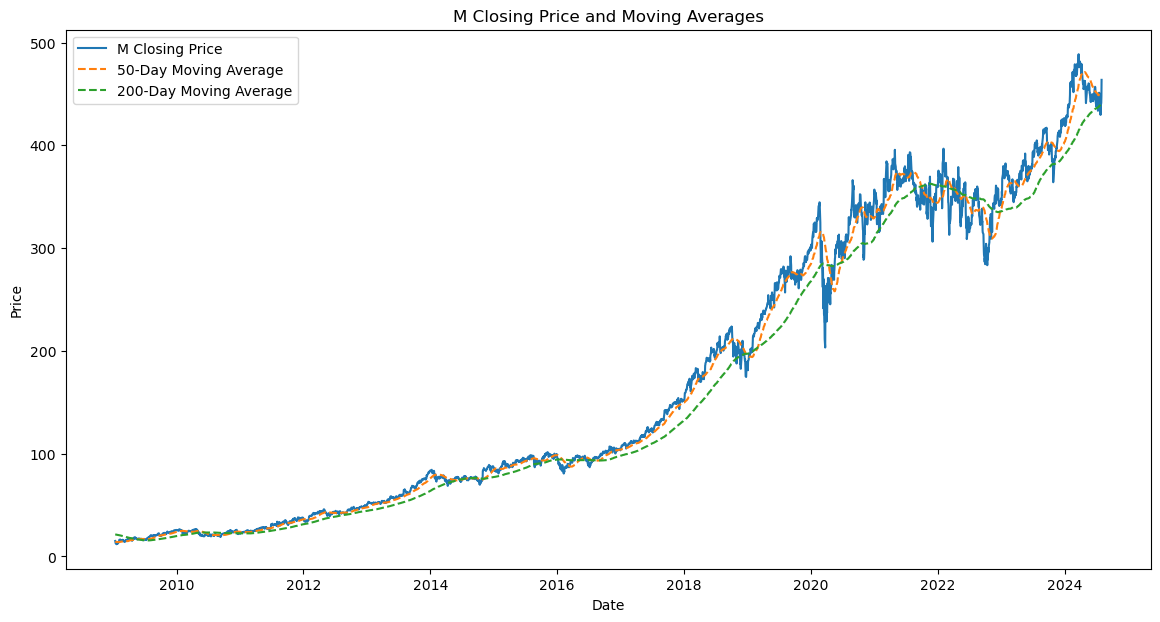

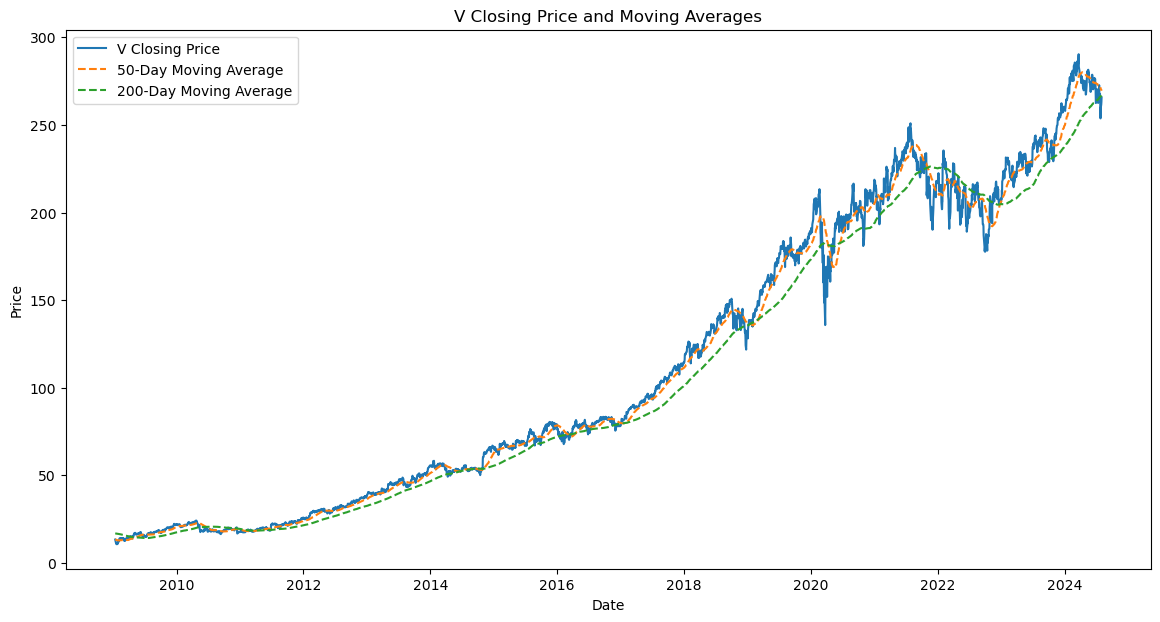

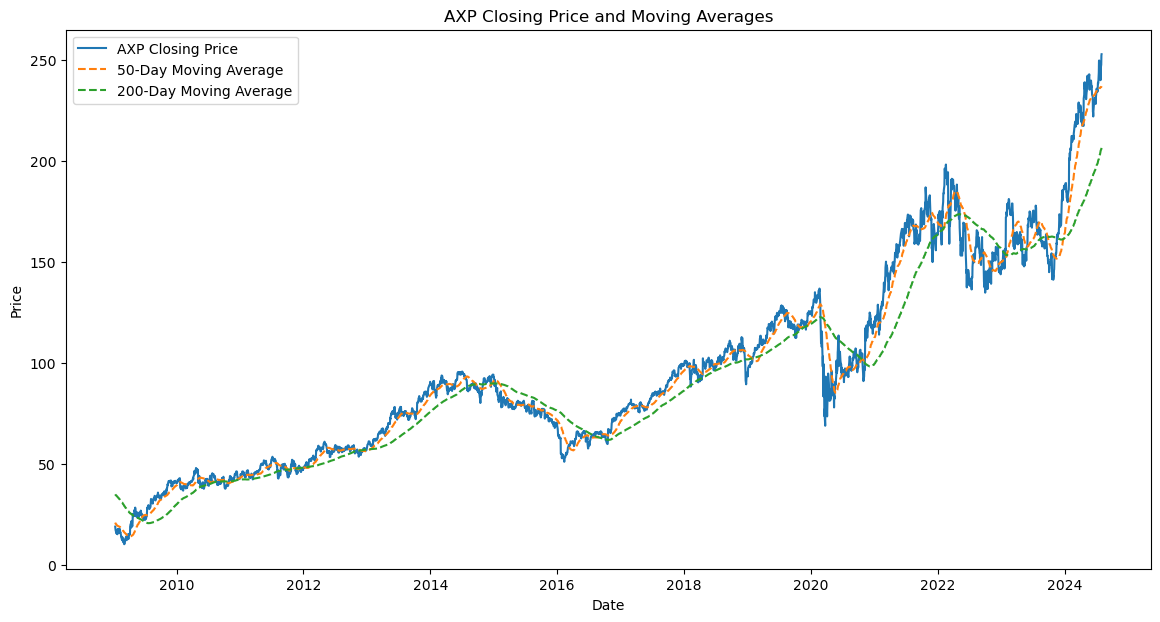

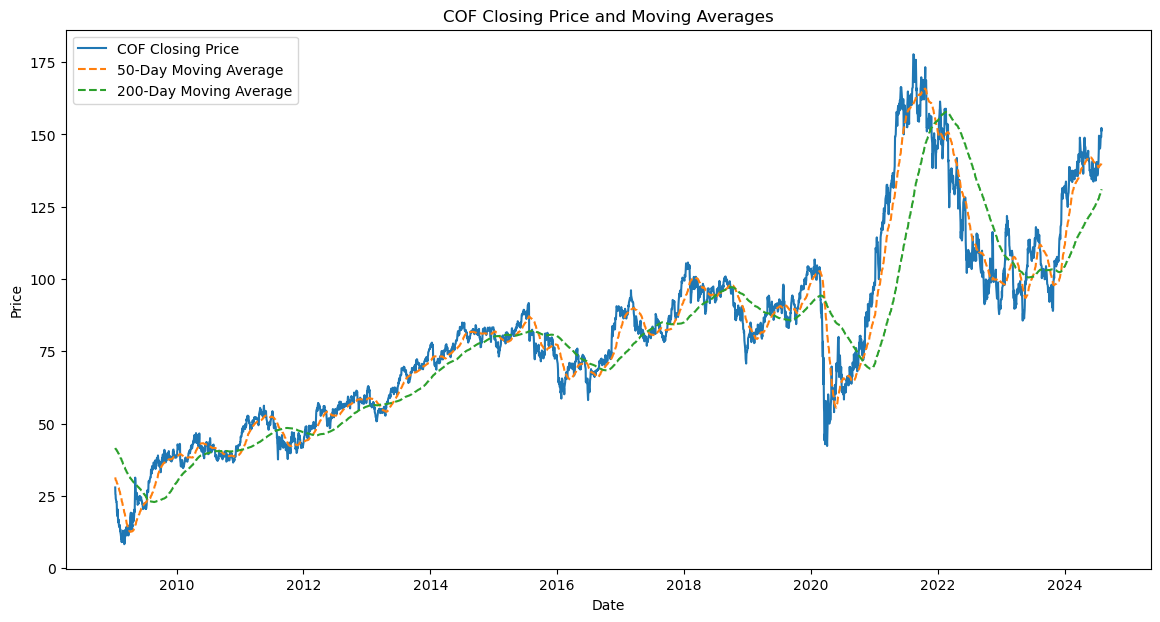

In [44]:
# Plot Moving Averages with Closing Price
for col in ['M', 'V', 'AXP', 'COF']:
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df[f'Close_{col}'], label=f'{col} Closing Price')
    plt.plot(df['Date'], df[f'MA_50_{col}'], label='50-Day Moving Average', linestyle='--')
    plt.plot(df['Date'], df[f'MA_200_{col}'], label='200-Day Moving Average', linestyle='--')
    plt.title(f'{col} Closing Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

*Inference*: The moving averages help confirm whether a stock is in an upward or downward trend. Stocks like MasterCard (M) and Visa (V) show consistent upward trends, indicating strong growth over time. When the short-term average (50-day) crosses above the long-term average (200-day), it signals a potential bullish trend (buy signal). Conversely, if the 50-day drops below the 200-day, it could indicate a bearish trend (sell signal).

#### Bollinger Bands:

Bollinger Bands are used to measure the volatility of stock prices. They consist of three lines:

* Upper Band: Two standard deviations above the 50-day moving average.
* Lower Band: Two standard deviations below the 50-day moving average.
* Middle Band (not explicitly plotted): The 50-day moving average.


These bands expand and contract based on market volatility. When volatility increases, the bands widen; when volatility decreases, the bands narrow.

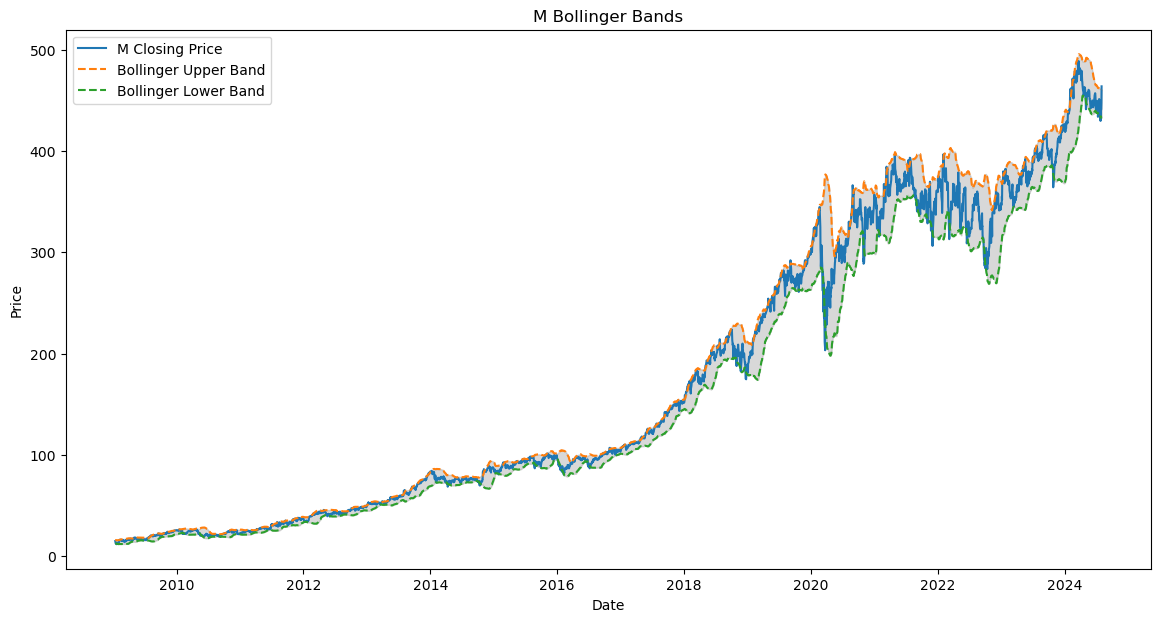

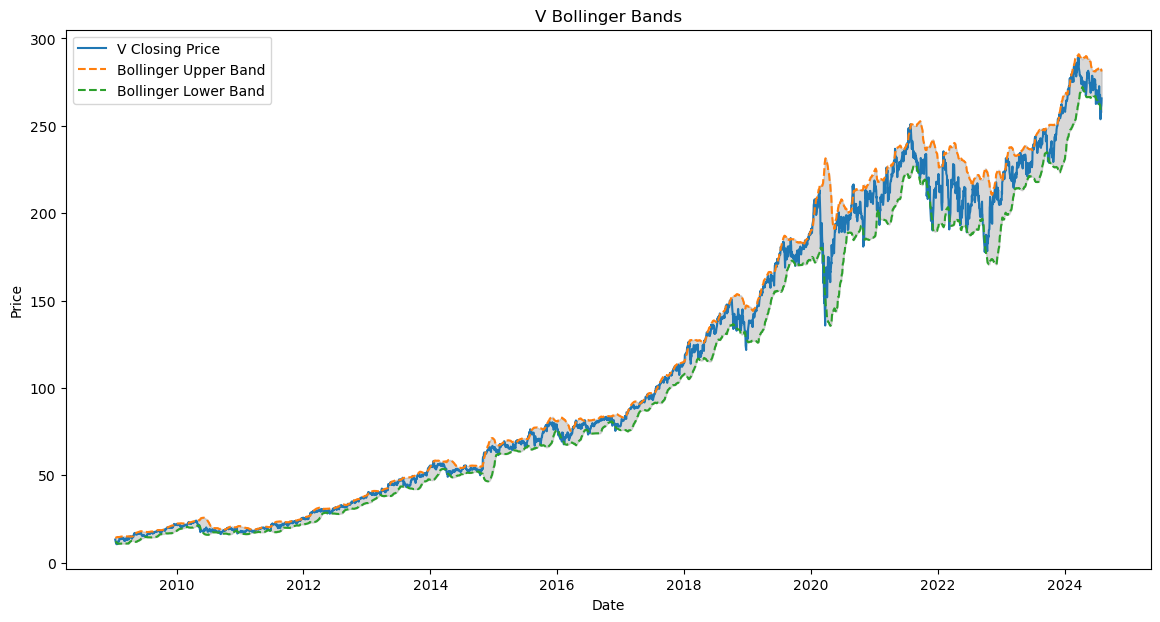

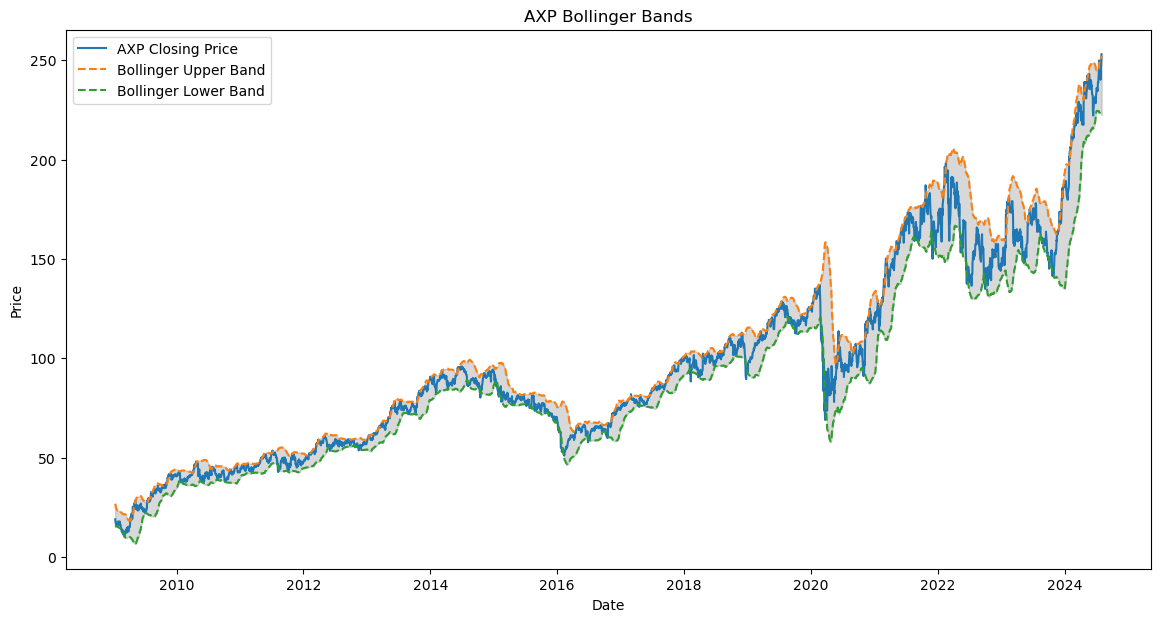

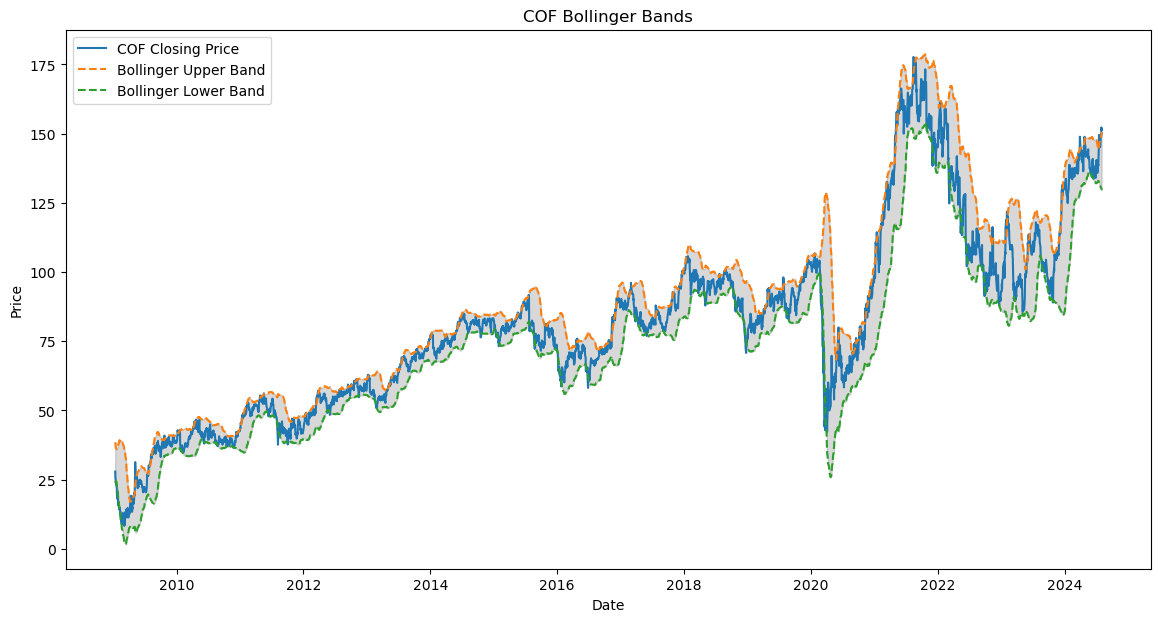

In [45]:
# Plot Bollinger Bands
for col in ['M', 'V', 'AXP', 'COF']:
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df[f'Close_{col}'], label=f'{col} Closing Price')
    plt.plot(df['Date'], df[f'BB_upper_{col}'], label='Bollinger Upper Band', linestyle='--')
    plt.plot(df['Date'], df[f'BB_lower_{col}'], label='Bollinger Lower Band', linestyle='--')
    plt.fill_between(df['Date'], df[f'BB_upper_{col}'], df[f'BB_lower_{col}'], color='grey', alpha=0.3)
    plt.title(f'{col} Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

*Inference*: The width of the bands varies over time, indicating changing levels of volatility. For example, during periods of market turbulence like the 2020 pandemic, the bands widen significantly, reflecting higher volatility.

#### Relative Strength Index (RSI):

The Relative Strength Index (RSI) is a momentum oscillator used to measure the speed and change of price movements. RSI values range from 0 to 100 and are primarily used to identify overbought or oversold conditions in a stock:

* Overbought (RSI > 70): When the RSI value exceeds 70, it indicates that the stock might be overbought, suggesting that the stock could be due for a correction or pullback.
* Oversold (RSI < 30): When the RSI falls below 30, it signals that the stock could be oversold, which might indicate a buying opportunity as a reversal could be imminent.

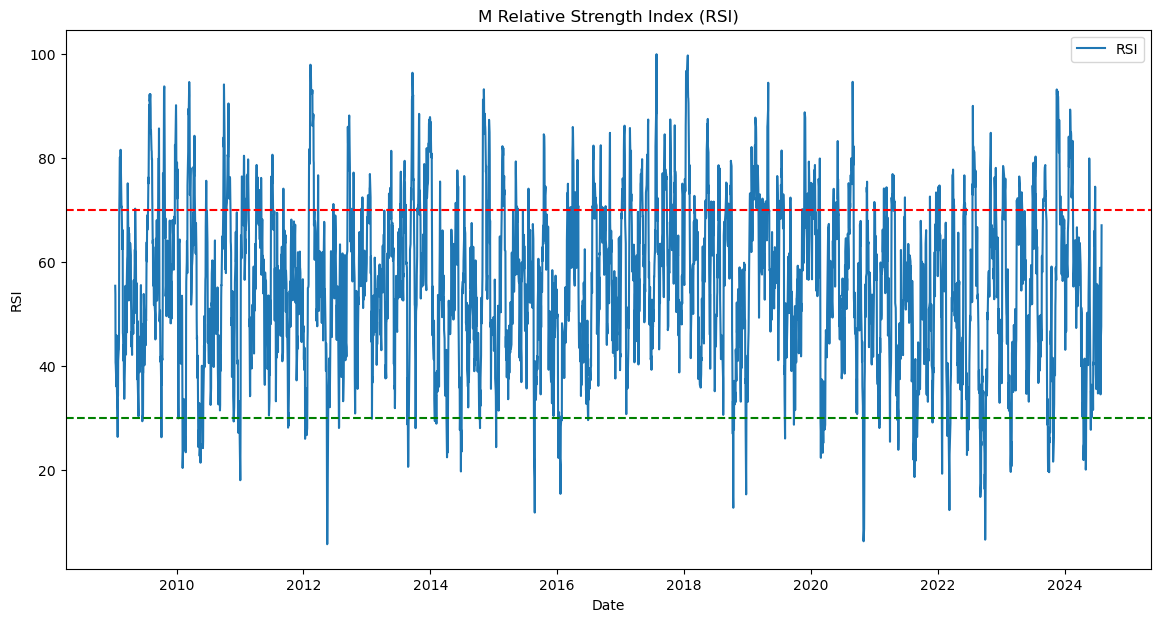

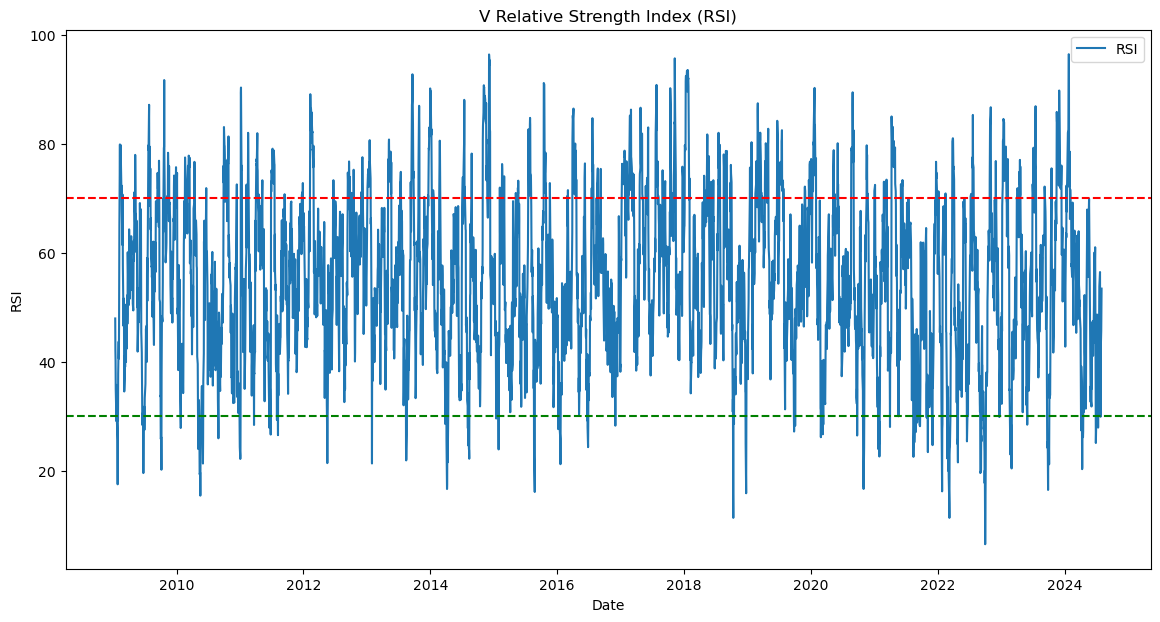

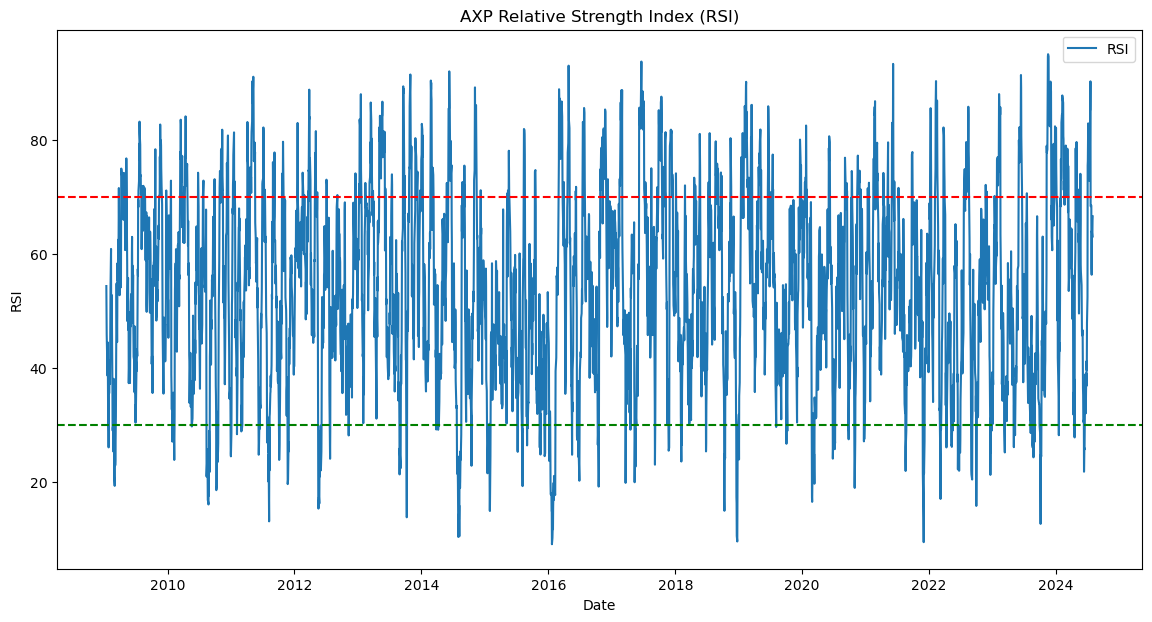

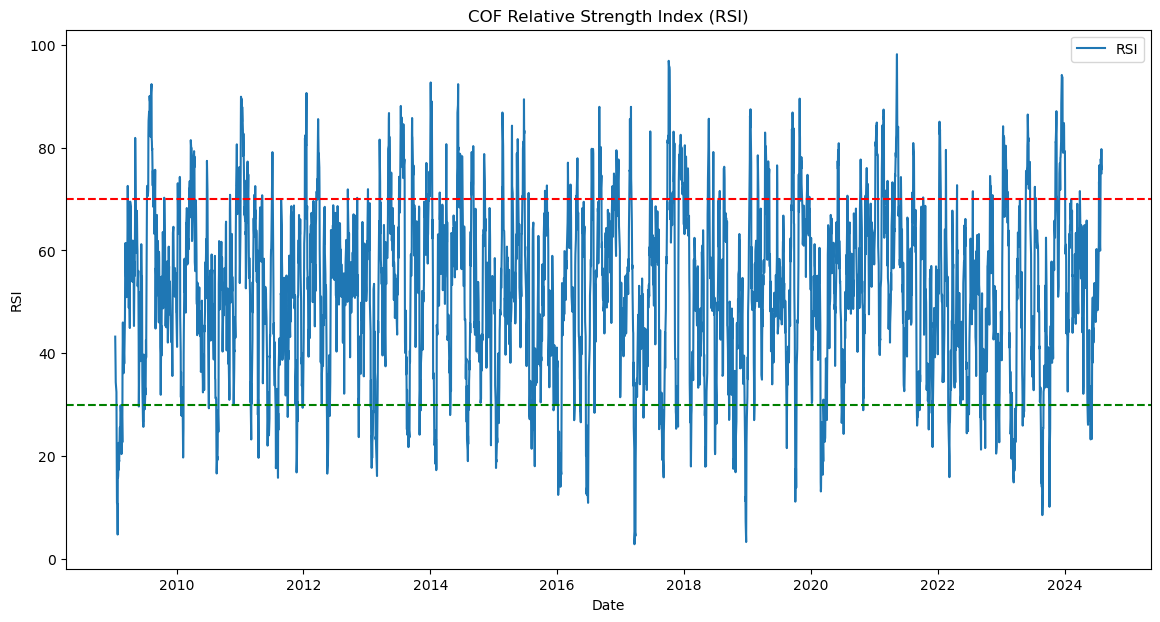

In [46]:
# Plot RSI
for col in ['M', 'V', 'AXP', 'COF']:
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df[f'RSI_{col}'], label='RSI')
    plt.axhline(70, color='red', linestyle='--')
    plt.axhline(30, color='green', linestyle='--')
    plt.title(f'{col} Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.show()

*Inference*: The stocks in your analysis exhibit fluctuating RSI values but generally hover between the 30 and 70 levels, indicating stable momentum without excessive volatility. Occasional spikes above 70 or dips below 30 serve as signals for potential market entry or exit points.

#### On-Balance Volume (OBV):

On-Balance Volume (OBV) is a momentum indicator that relates price changes to volume. It helps to confirm price trends and can indicate buying or selling pressure in the market. OBV is calculated by adding volume on up days and subtracting volume on down days.

* Buying Pressure: A rising OBV indicates that volume is heavier on up days, meaning there is buying pressure, which may precede a price increase.
* Selling Pressure: A falling OBV indicates that volume is heavier on down days, suggesting selling pressure, which may precede a price decline.
* Trend Confirmation: OBV can confirm the strength of an ongoing trend. If OBV rises with a stock’s price, the trend is likely to continue; if OBV diverges from the price, it can signal a potential reversal.

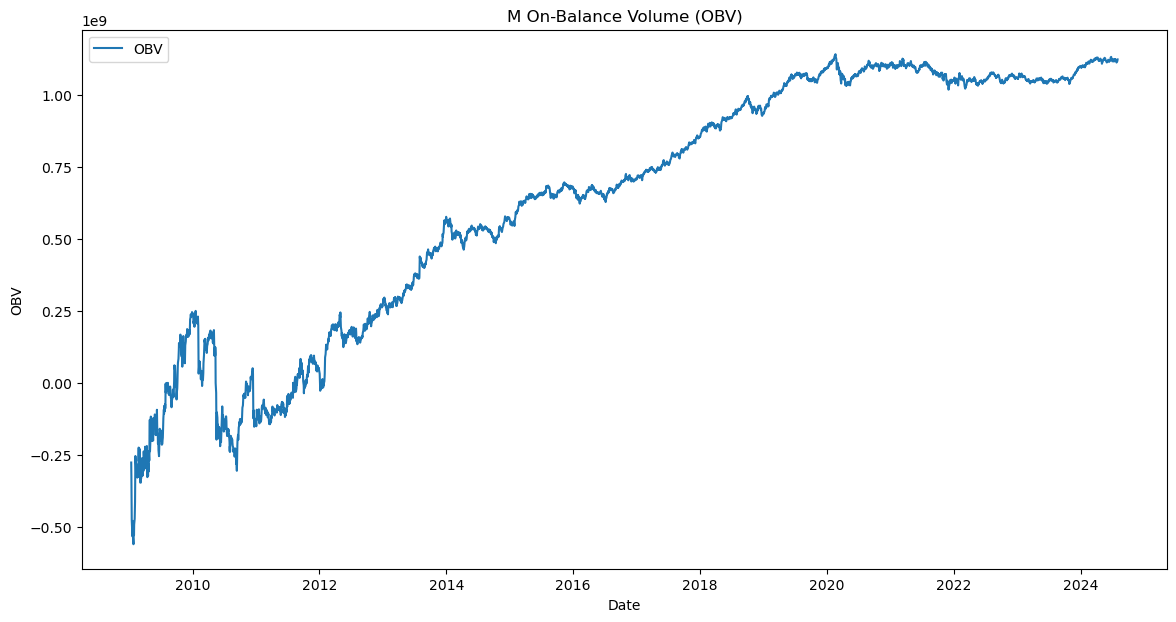

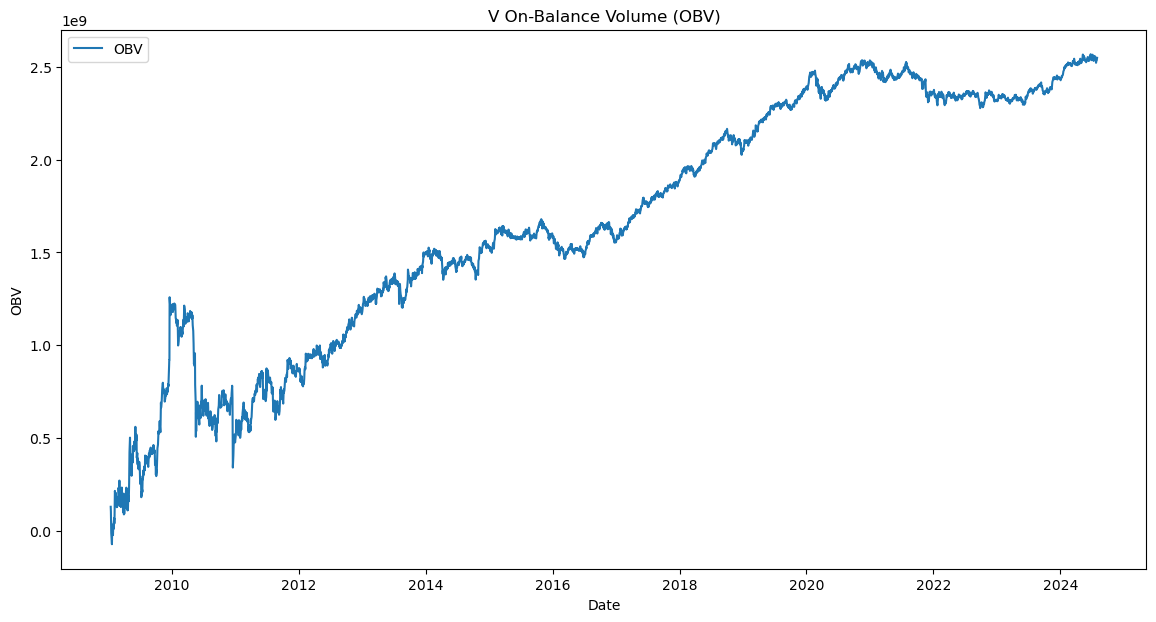

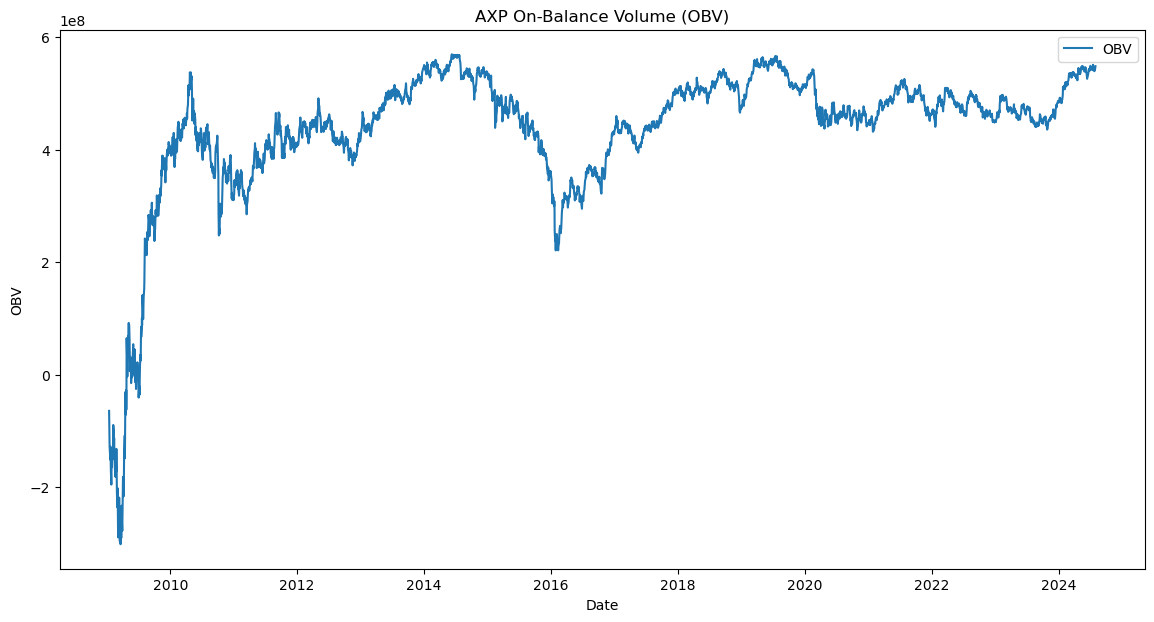

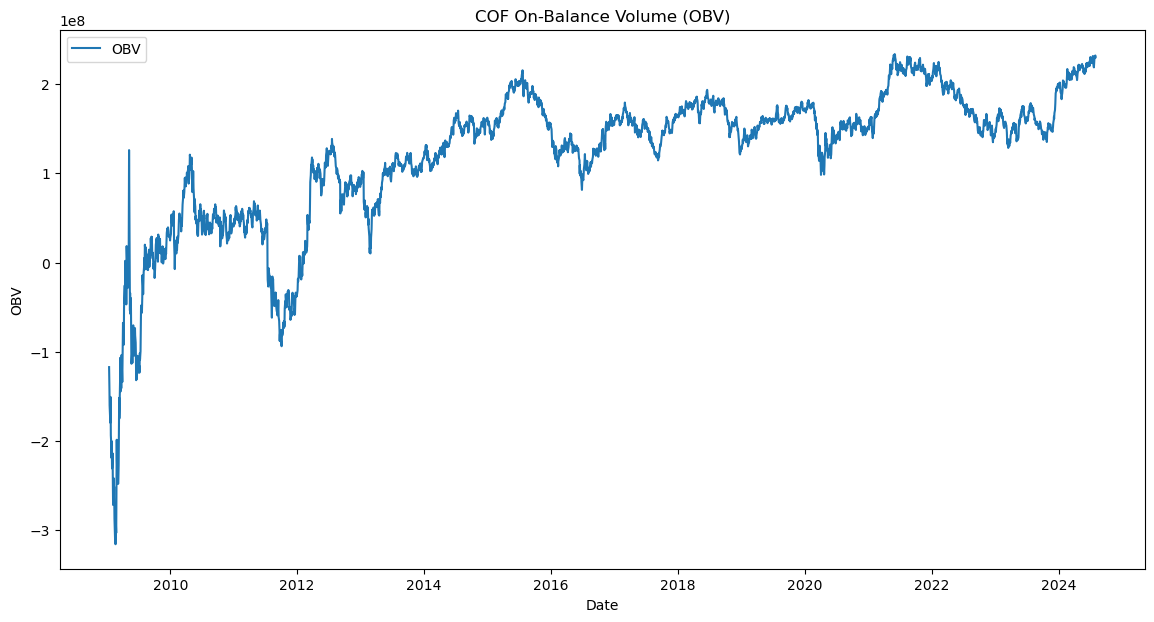

In [47]:
# Plot On-Balance Volume (OBV)
for col in ['M', 'V', 'AXP', 'COF']:
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df[f'OBV_{col}'], label='OBV')
    plt.title(f'{col} On-Balance Volume (OBV)')
    plt.xlabel('Date')
    plt.ylabel('OBV')
    plt.legend()
    plt.show()

*Inference*: For all stocks, including MasterCard (M), Visa (V), American Express (AXP), and Capital One (COF), a generally upward OBV trend supports the notion that buying pressure has been increasing over time. This confirms the positive price momentum seen in these stocks. OBV trends appear to rise in alignment with price trends, confirming that the upward momentum is supported by strong volume. This validates the continued bullish outlook for the stocks, particularly in the longer-term trends post-2010.

#### Stock Prices Over Time:

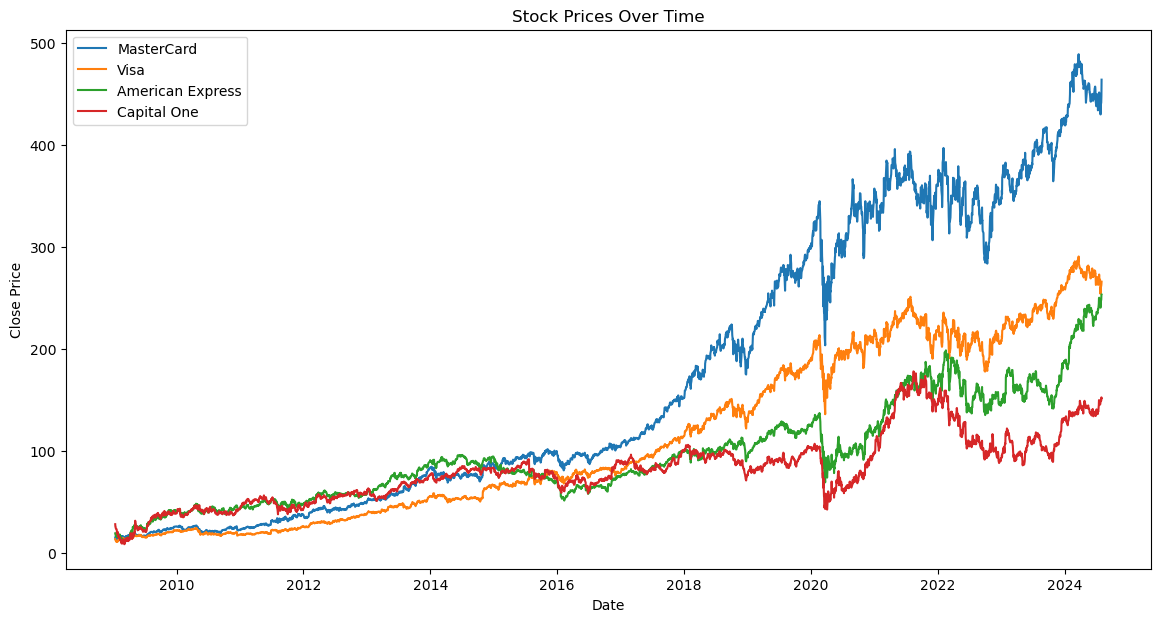

In [48]:
# Stock Prices Over Time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close_M'], label='MasterCard')
plt.plot(df['Date'], df['Close_V'], label='Visa')
plt.plot(df['Date'], df['Close_AXP'], label='American Express')
plt.plot(df['Date'], df['Close_COF'], label='Capital One')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

*Inference*: The plot shows that MasterCard and Visa have experienced significant stock price growth from 2008 to 2024, leading the financial sector, especially after 2010. Both companies saw a sharp increase, recovering quickly after the 2020 pandemic-induced dip. In contrast, American Express and Capital One have shown more moderate growth, lagging behind the two industry leaders. The rapid recovery and continued growth of MasterCard and Visa highlight their strong market positions and the increasing global reliance on digital payments.

#### Stock Volume Over Time:

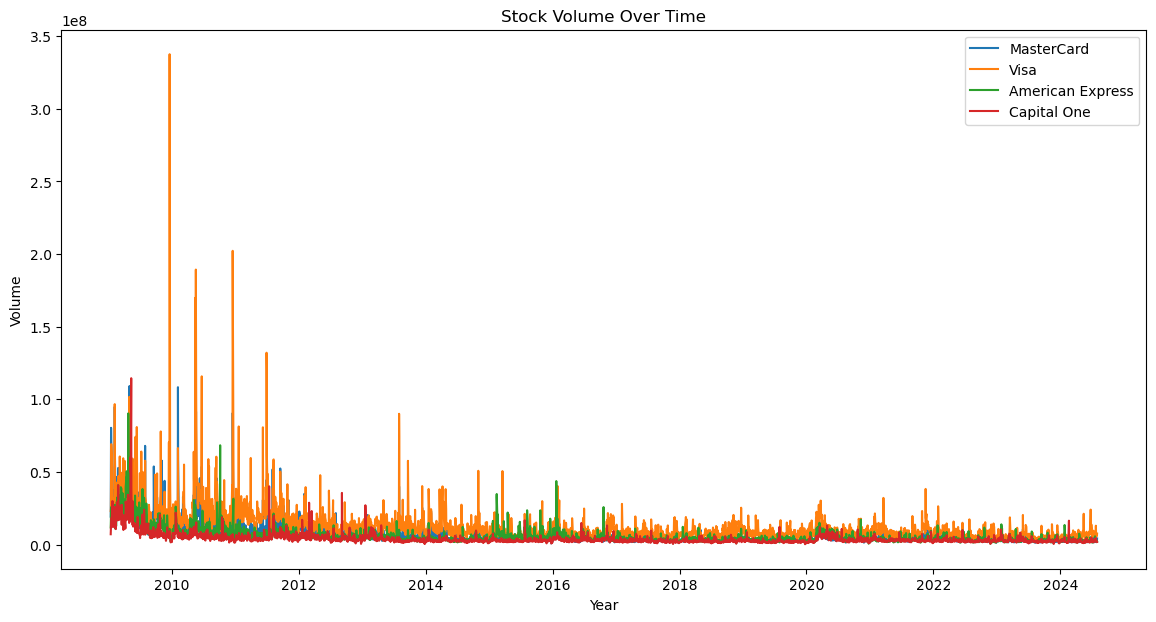

In [162]:
# Stock Volume Over Time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Volume_M'], label='MasterCard')
plt.plot(df['Date'], df['Volume_V'], label='Visa')
plt.plot(df['Date'], df['Volume_AXP'], label='American Express')
plt.plot(df['Date'], df['Volume_COF'], label='Capital One')
plt.title('Stock Volume Over Time')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.legend()
plt.show()

*Inference*: The plot shows that trading volumes for MasterCard, Visa, American Express, and Capital One were significantly higher before 2010, particularly for Visa. After 2010, the volumes stabilized and remained relatively low and consistent over time. This suggests that initial market interest and volatility decreased, leading to more steady trading patterns, reflecting investor confidence in these stocks.

#### Pie Chart of Trading Volume Distribution:

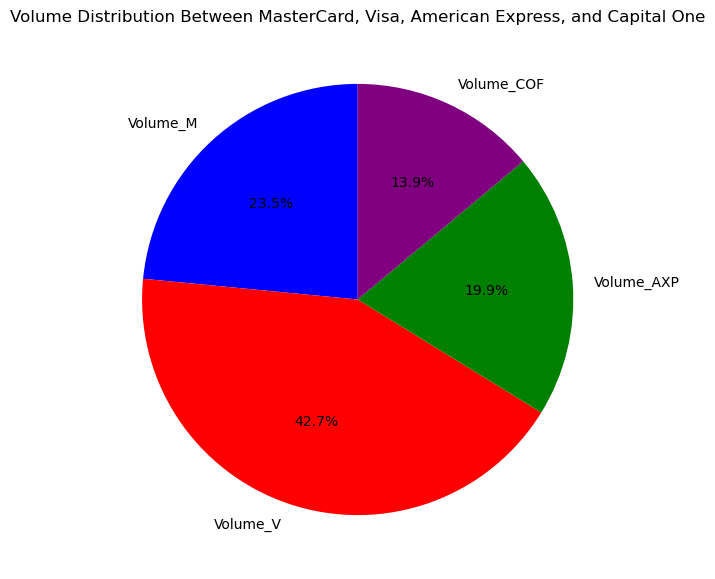

In [49]:
# Volume Distribution Between All Four Cards
df['Total Volume'] = df['Volume_M'] + df['Volume_V'] + df['Volume_AXP'] + df['Volume_COF']
volume_sum = df[['Volume_M', 'Volume_V', 'Volume_AXP', 'Volume_COF']].sum()
plt.figure(figsize=(14, 7))
volume_sum.plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'red', 'green', 'purple'])
plt.title('Volume Distribution Between MasterCard, Visa, American Express, and Capital One')
plt.ylabel('')
plt.show()

*Inference*: The pie chart shows the trading volume distribution among MasterCard, Visa, American Express, and Capital One. The largest share of trading volume is held by Visa at 42.7%, followed by MasterCard at 23.5%, American Express at 19.9%, and Capital One at 13.9%. This indicates that Visa dominates the trading activity in comparison to the other companies, reflecting higher investor interest or trading frequency in Visa’s stock.

#### Sunburst Chart of Trading Volume Distribution:

In [50]:
if df.index.name == 'Date' or df.index.dtype == 'datetime64[ns]':
    df = df.reset_index()  # Reset the index to make the 'Date' column explicit

import plotly.express as px

def plot_sunburst_volume_distribution(data):
 data['Year'] = data['Date'].dt.year
 data['Quarter'] = data['Date'].dt.to_period("Q").astype(str)
 data['Month'] = data['Date'].dt.month_name()

 sunburst_data = pd.melt(data, id_vars=['Year', 'Quarter', 'Month'], 
                         value_vars=['Volume_M', 'Volume_V', 'Volume_AXP', 'Volume_COF'],
                         var_name='Stock', value_name='Volume')

 sunburst_data['Stock'] = sunburst_data['Stock'].replace({'Volume_M': 'MasterCard', 
                                                          'Volume_V': 'Visa', 
                                                          'Volume_AXP': 'American Express', 
                                                          'Volume_COF': 'Capital One'})

 fig = px.sunburst(sunburst_data, path=['Year', 'Quarter', 'Month', 'Stock'], values='Volume',
                   color='Stock', title='Sunburst Chart of Trading Volume Distribution')
 fig.show()

plot_sunburst_volume_distribution(df)

*Inference*: The pie chart shows the trading volume distribution among MasterCard, Visa, American Express, and Capital One. The largest share of trading volume is held by Visa at 42.7%, followed by MasterCard at 23.5%, American Express at 19.9%, and Capital One at 13.9%. This indicates that Visa dominates the trading activity in comparison to the other companies, reflecting higher investor interest or trading frequency in Visa’s stock.

#### Distribution of Closing Prices:

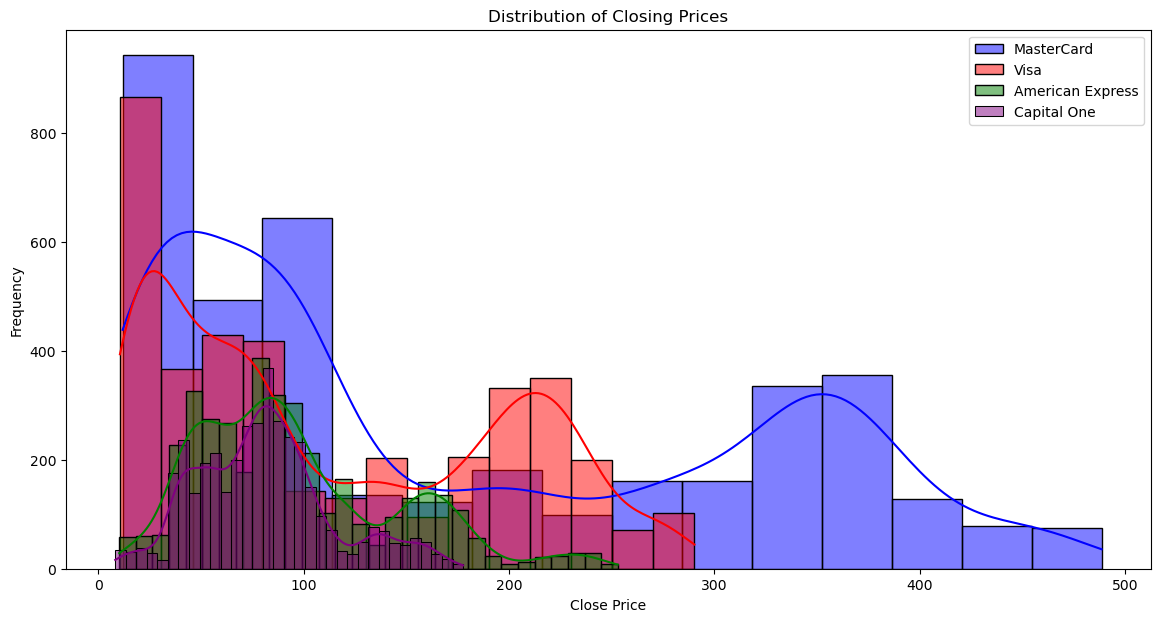

In [51]:
# Distribution of Closing Prices
plt.figure(figsize=(14, 7))
sns.histplot(df['Close_M'], kde=True, color='blue', label='MasterCard')
sns.histplot(df['Close_V'], kde=True, color='red', label='Visa')
sns.histplot(df['Close_AXP'], kde=True, color='green', label='American Express')
sns.histplot(df['Close_COF'], kde=True, color='purple', label='Capital One')
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

*Inference*: This histogram with kernel density estimates (KDE) shows the distribution of closing prices for MasterCard, Visa, American Express, and Capital One.

* MasterCard and Visa have a wider spread with higher closing prices, indicating their strong growth over time, with MasterCard closing prices peaking over 400.
* American Express and Capital One show lower closing prices, with most values concentrated below 150, suggesting more stable but less aggressive growth compared to MasterCard and Visa.

#### KDE Plot of Closing Prices:

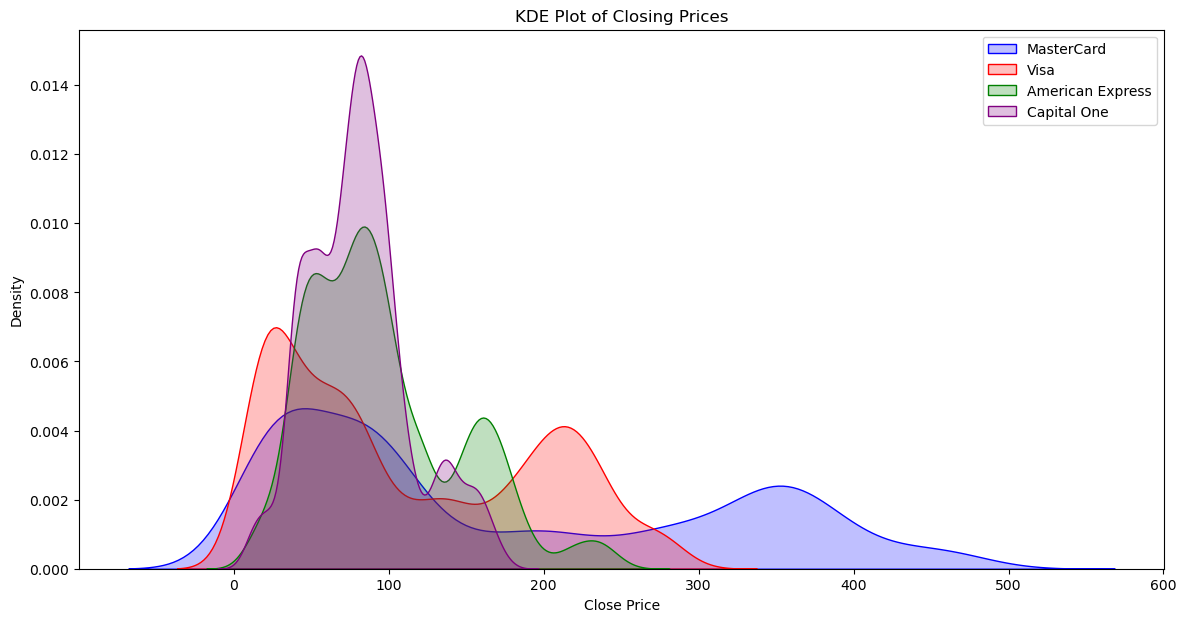

In [52]:
# KDE Plot of Closing Prices
plt.figure(figsize=(14, 7))
sns.kdeplot(df['Close_M'], fill=True, color='blue', label='MasterCard')
sns.kdeplot(df['Close_V'], fill=True, color='red', label='Visa')
sns.kdeplot(df['Close_AXP'], fill=True, color='green', label='American Express')
sns.kdeplot(df['Close_COF'], fill=True, color='purple', label='Capital One')
plt.title('KDE Plot of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.legend()
plt.show()

*Inference*: This plot illustrates the distribution of closing prices for MasterCard, Visa, American Express, and Capital One:

* MasterCard shows the highest range of closing prices, with a significant density around $300–$400.
* Visa also displays higher closing prices, primarily between $200–$300.
* American Express and Capital One have lower price ranges, with most values concentrated below $150.

This indicates that MasterCard and Visa have experienced more significant price growth, while American Express and Capital One have relatively stable but lower stock prices.

#### Percentage Change in Stock Prices Over Time:

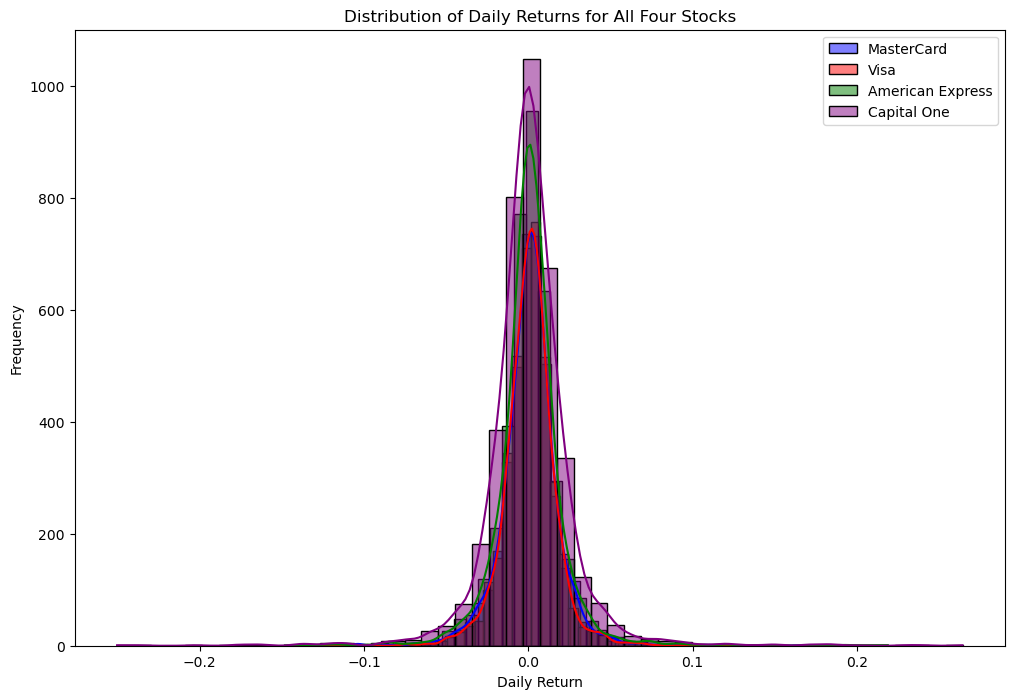

In [53]:
# Calculate daily percentage change for each stock
df['Daily_Return_M'] = df['Close_M'].pct_change()
df['Daily_Return_V'] = df['Close_V'].pct_change()
df['Daily_Return_AXP'] = df['Close_AXP'].pct_change()
df['Daily_Return_COF'] = df['Close_COF'].pct_change()

# Plot the distribution of daily returns for each stock
plt.figure(figsize=(12, 8))

sns.histplot(df['Daily_Return_M'].dropna(), bins=50, kde=True, color='blue', label='MasterCard')
sns.histplot(df['Daily_Return_V'].dropna(), bins=50, kde=True, color='red', label='Visa')
sns.histplot(df['Daily_Return_AXP'].dropna(), bins=50, kde=True, color='green', label='American Express')
sns.histplot(df['Daily_Return_COF'].dropna(), bins=50, kde=True, color='purple', label='Capital One')

plt.title('Distribution of Daily Returns for All Four Stocks')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

*Inference*: The distribution of daily returns for MasterCard, Visa, American Express, and Capital One shows a near-normal distribution centered around zero. Most of the returns are concentrated within a small range around 0, indicating that the daily fluctuations in stock prices for all four companies tend to be relatively minor. There are no extreme outliers, reflecting the overall stability of these stocks in terms of daily price changes.

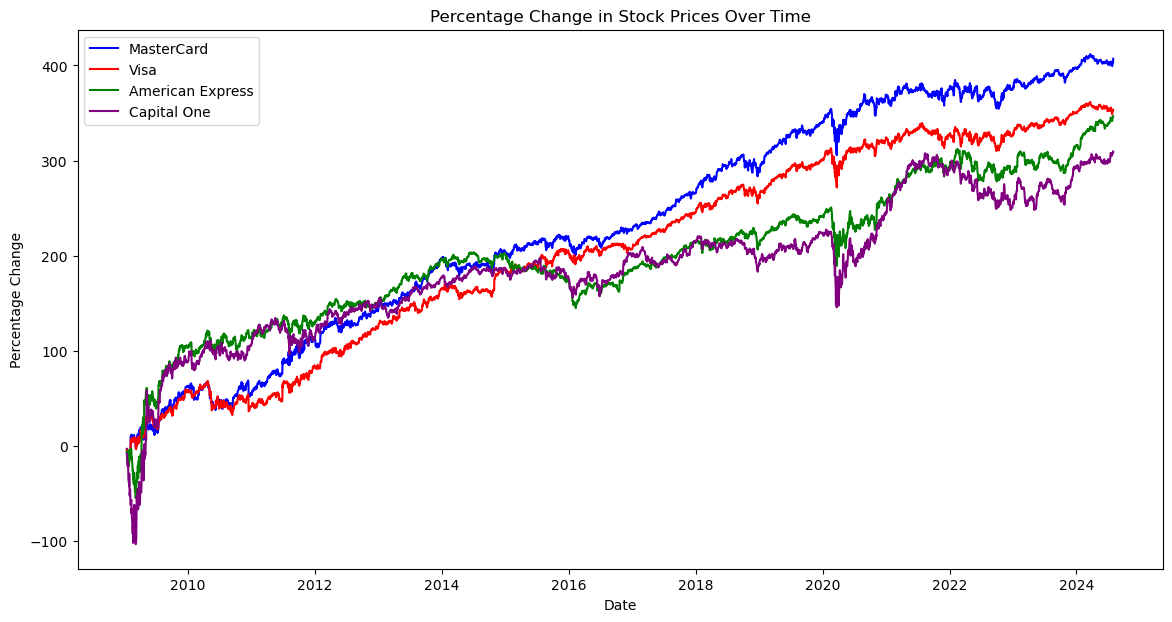

In [54]:
def plot_percentage_change_comparison(data):
 data['Pct_Change_M'] = data['Close_M'].pct_change().cumsum() * 100
 data['Pct_Change_V'] = data['Close_V'].pct_change().cumsum() * 100
 data['Pct_Change_AXP'] = data['Close_AXP'].pct_change().cumsum() * 100
 data['Pct_Change_COF'] = data['Close_COF'].pct_change().cumsum() * 100

 plt.figure(figsize=(14, 7))
 plt.plot(data['Date'], data['Pct_Change_M'], label='MasterCard', color='blue')
 plt.plot(data['Date'], data['Pct_Change_V'], label='Visa', color='red')
 plt.plot(data['Date'], data['Pct_Change_AXP'], label='American Express', color='green')
 plt.plot(data['Date'], data['Pct_Change_COF'], label='Capital One', color='purple')
 plt.title('Percentage Change in Stock Prices Over Time')
 plt.xlabel('Date')
 plt.ylabel('Percentage Change')
 plt.legend(loc='best')
 plt.show()

plot_percentage_change_comparison(df)

*Inference*: The line plot shows the percentage change in stock prices for MasterCard, Visa, American Express, and Capital One over time.

* MasterCard (blue) has exhibited the highest percentage growth over the years, followed by Visa (red), indicating strong performance and price appreciation.
* American Express (green) and Capital One (purple) have shown steady growth but at a slower rate compared to MasterCard and Visa.
* The plot also highlights significant market dips, such as the 2008 financial crisis and the 2020 COVID-19 pandemic, followed by strong recoveries, particularly for MasterCard and Visa.

#### Relative Performance Over Time (Area Chart):

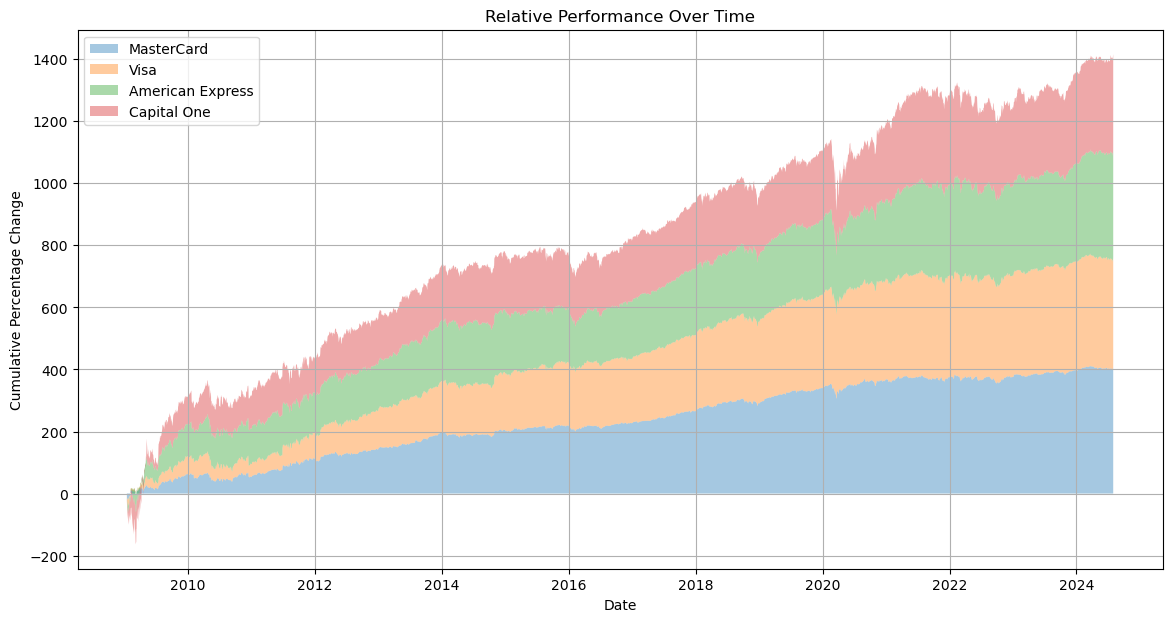

In [55]:
def plot_relative_performance_area_chart(data):
 data['Pct_Change_M'] = data['Close_M'].pct_change().cumsum() * 100
 data['Pct_Change_V'] = data['Close_V'].pct_change().cumsum() * 100
 data['Pct_Change_AXP'] = data['Close_AXP'].pct_change().cumsum() * 100
 data['Pct_Change_COF'] = data['Close_COF'].pct_change().cumsum() * 100

 plt.figure(figsize=(14, 7))
 plt.fill_between(data['Date'], 0, data['Pct_Change_M'], label='MasterCard', alpha=0.4)
 plt.fill_between(data['Date'], data['Pct_Change_M'], data['Pct_Change_M'] + data['Pct_Change_V'], 
                  label='Visa', alpha=0.4)
 plt.fill_between(data['Date'], data['Pct_Change_M'] + data['Pct_Change_V'], 
                  data['Pct_Change_M'] + data['Pct_Change_V'] + data['Pct_Change_AXP'], 
                  label='American Express', alpha=0.4)
 plt.fill_between(data['Date'], data['Pct_Change_M'] + data['Pct_Change_V'] + data['Pct_Change_AXP'], 
                  data['Pct_Change_M'] + data['Pct_Change_V'] + data['Pct_Change_AXP'] + data['Pct_Change_COF'], 
                  label='Capital One', alpha=0.4)
 plt.title('Relative Performance Over Time')
 plt.xlabel('Date')
 plt.ylabel('Cumulative Percentage Change')
 plt.legend(loc='upper left')
 plt.grid(True)
 plt.show()

plot_relative_performance_area_chart(df)

*Inference*: The area chart illustrates the cumulative percentage change in stock prices for MasterCard, Visa, American Express, and Capital One over time. Visa and MasterCard stand out with the highest cumulative growth, with Visa consistently leading the group in recent years. American Express and Capital One show more modest performance in comparison, resulting in a noticeable gap in the cumulative returns. 

#### High-Low Price Spread Over Time:

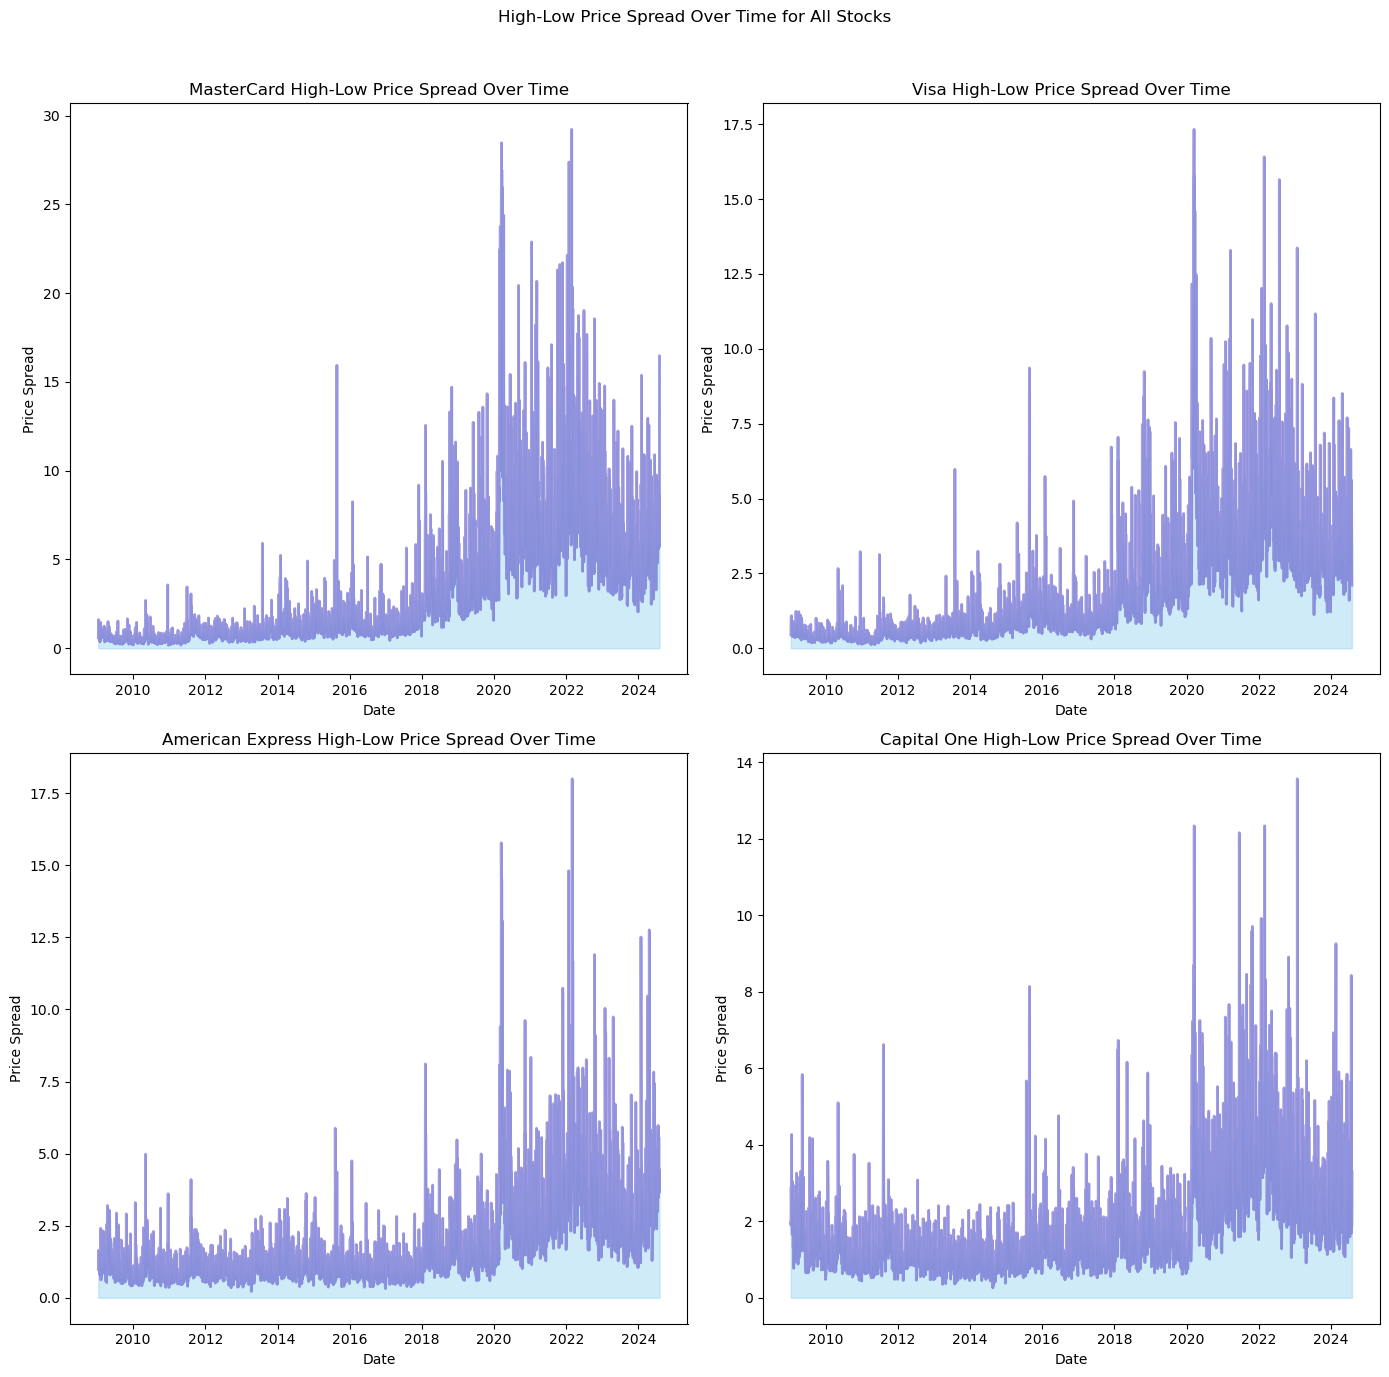

In [56]:
def plot_price_spread_all(data):
    fig, axes = plt.subplots(2, 2, figsize=(14, 14))
    fig.suptitle('High-Low Price Spread Over Time for All Stocks')
    
    tickers = ['M', 'V', 'AXP', 'COF']
    titles = ['MasterCard', 'Visa', 'American Express', 'Capital One']
    
    for i, ticker in enumerate(tickers):
        data[f'High_Low_Spread_{ticker}'] = data[f'High_{ticker}'] - data[f'Low_{ticker}']
        ax = axes[i//2, i%2]
        ax.fill_between(data['Date'], data[f'High_Low_Spread_{ticker}'], color='skyblue', alpha=0.4)
        ax.plot(data['Date'], data[f'High_Low_Spread_{ticker}'], color='Slateblue', alpha=0.6, linewidth=2)
        ax.set_title(f'{titles[i]} High-Low Price Spread Over Time')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price Spread')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_price_spread_all(df)

*Inference*: The chart depicting the high-low price spread over time for all four stocks (MasterCard, Visa, American Express, and Capital One) indicates periods of volatility and price fluctuations. Notably, periods like 2020 show significant spikes in the price spread, which could be attributed to market disruptions, possibly the global COVID-19 pandemic. MasterCard exhibits the highest variability, while Capital One shows relatively lower fluctuations compared to the others. 

#### Rolling Volatility Comparison:

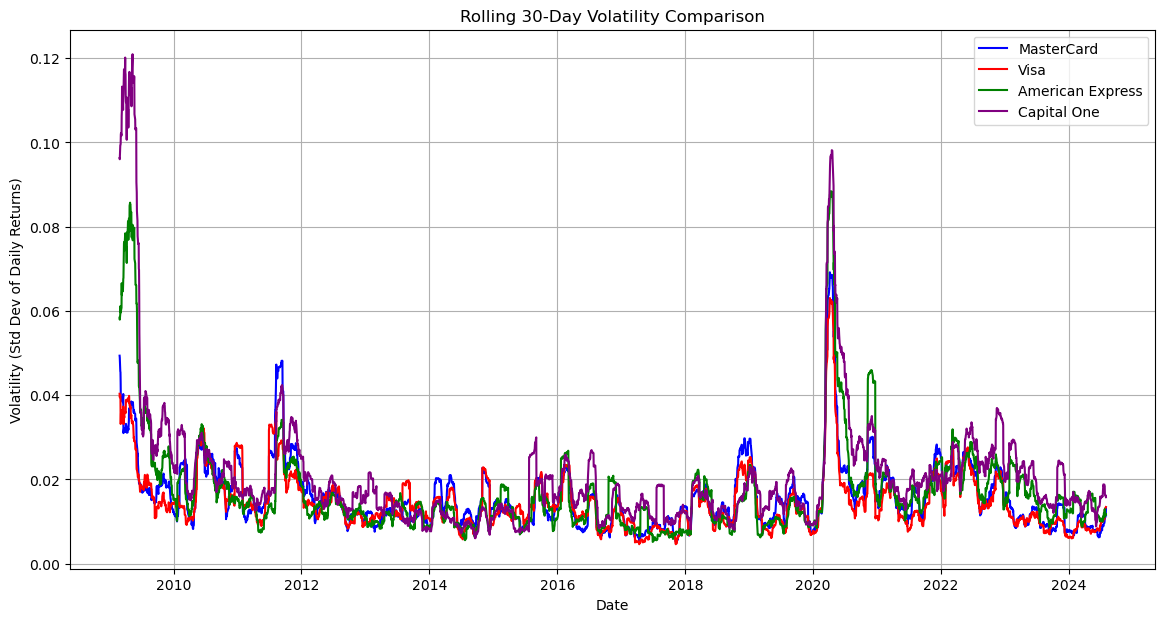

In [57]:
def plot_rolling_volatility_comparison(data, window=30):
 data['Volatility_M'] = data['Daily_Return_M'].rolling(window).std()
 data['Volatility_V'] = data['Daily_Return_V'].rolling(window).std()
 data['Volatility_AXP'] = data['Daily_Return_AXP'].rolling(window).std()
 data['Volatility_COF'] = data['Daily_Return_COF'].rolling(window).std()
 
 plt.figure(figsize=(14, 7))
 plt.plot(data['Date'], data['Volatility_M'], label='MasterCard', color='blue')
 plt.plot(data['Date'], data['Volatility_V'], label='Visa', color='red')
 plt.plot(data['Date'], data['Volatility_AXP'], label='American Express', color='green')
 plt.plot(data['Date'], data['Volatility_COF'], label='Capital One', color='purple')
 plt.title(f'Rolling {window}-Day Volatility Comparison')
 plt.xlabel('Date')
 plt.ylabel('Volatility (Std Dev of Daily Returns)')
 plt.legend(loc='best')
 plt.grid(True)
 plt.show()

plot_rolling_volatility_comparison(df)

*Inference*: The rolling 30-day volatility comparison chart shows fluctuations in the volatility of daily returns for MasterCard, Visa, American Express, and Capital One over time. The most notable spike occurred around 2020, reflecting heightened market uncertainty during the onset of the COVID-19 pandemic. After this period, volatility normalized but remained variable across stocks. MasterCard and Visa appear to have slightly lower and more stable volatility compared to American Express and Capital One, which experience higher spikes in volatility during times of market stress.

#### Price Distribution Comparison (Box Plot):

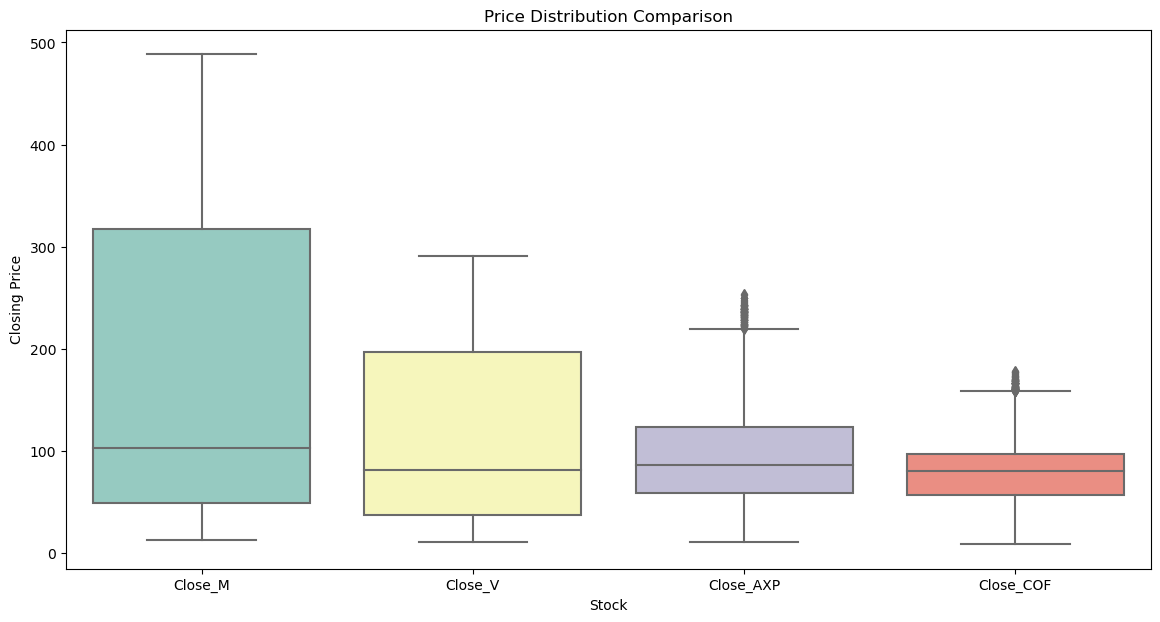

In [58]:
def plot_price_distribution_comparison(data):
 plt.figure(figsize=(14, 7))
 sns.boxplot(data=pd.melt(data[['Close_M', 'Close_V', 'Close_AXP', 'Close_COF']],
                          var_name='Stock', value_name='Price'), 
             x='Stock', y='Price', palette='Set3')
 plt.title('Price Distribution Comparison')
 plt.xlabel('Stock')
 plt.ylabel('Closing Price')
 plt.show()

plot_price_distribution_comparison(df)

*Inference*: The box plot compares the distribution of closing prices for four stocks: MasterCard (M), Visa (V), American Express (AXP), and Capital One (COF). MasterCard has the highest median and a wider range of prices, followed by Visa, while American Express and Capital One have lower median prices and tighter price ranges.

#### Pair Plot of Stock Prices:

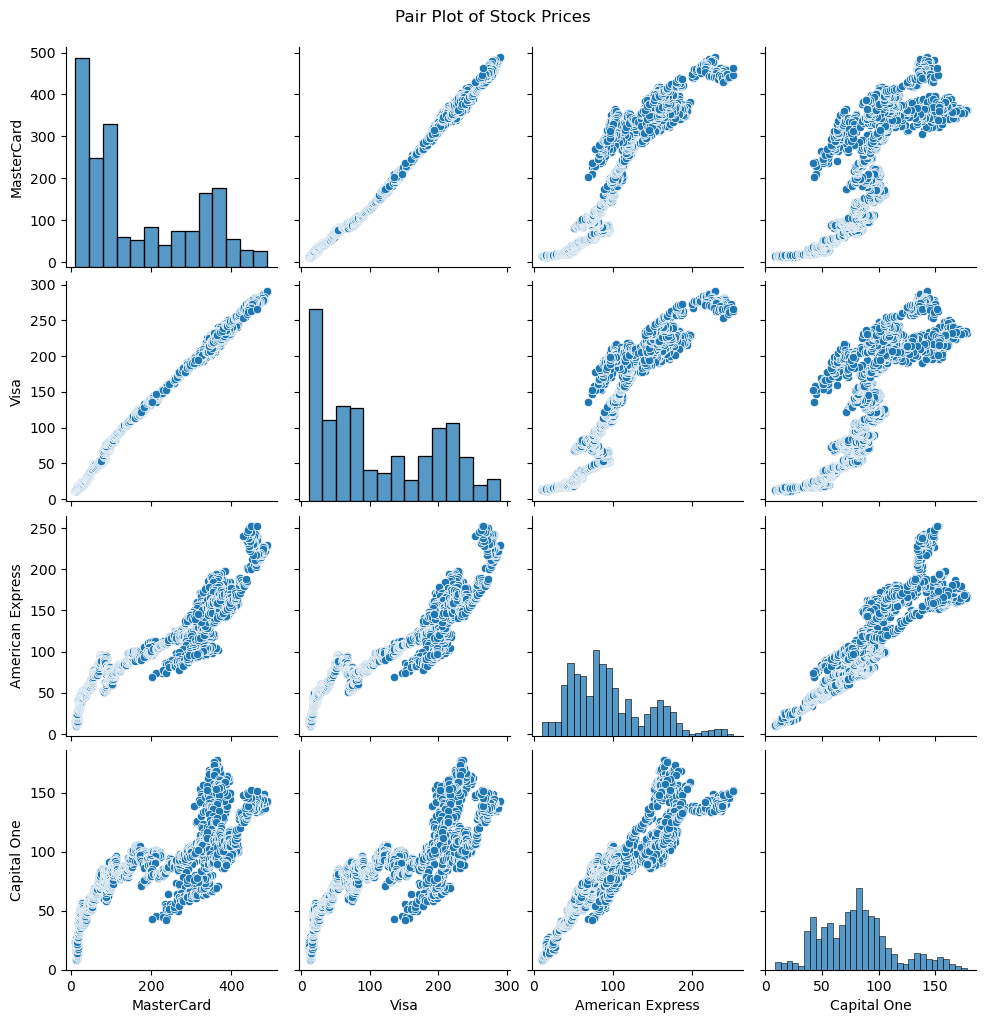

In [59]:
def plot_pairplot_stock_prices(data):
 price_data = data[['Close_M', 'Close_V', 'Close_AXP', 'Close_COF']]
 price_data.columns = ['MasterCard', 'Visa', 'American Express', 'Capital One']
 
 sns.pairplot(price_data)
 plt.suptitle('Pair Plot of Stock Prices', y=1.02)
 plt.show()

plot_pairplot_stock_prices(df)

*Inference*: The pair plot shows the relationships between the closing prices of MasterCard, Visa, American Express, and Capital One. Strong linear correlations are observed between several pairs of stocks, particularly between MasterCard and Visa, suggesting that the price movements of these companies are closely related. Similarly, American Express also shows positive correlations with both MasterCard and Visa, although the scatter is more dispersed for Capital One, indicating weaker correlations. The histograms on the diagonal reflect the price distribution for each stock, with MasterCard showing the widest range.

#### 3D Surface Plot of Stock Price Movements:

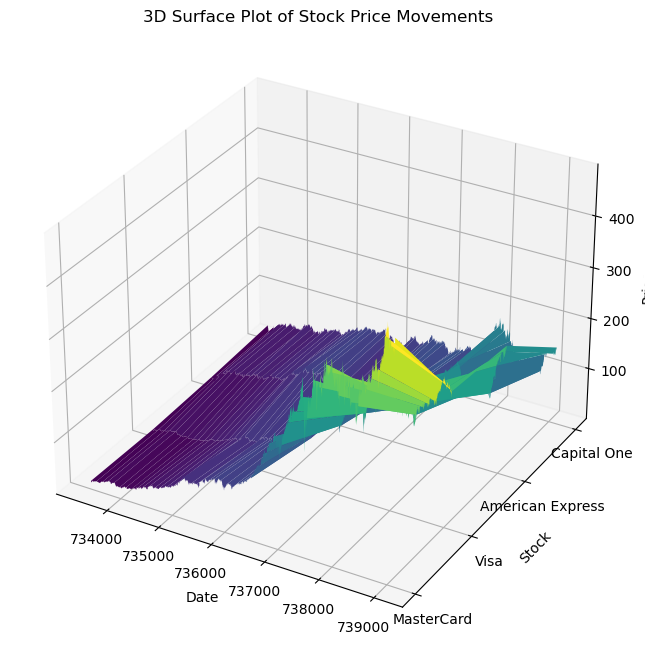

In [60]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_surface_price_movements(data):
    fig = plt.figure(figsize=(14, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    X = data['Date'].apply(lambda x: x.toordinal()).values
    Y = np.array([1, 2, 3, 4])  # Representing the different stocks
    Z = np.array([data['Close_M'].values, data['Close_V'].values, data['Close_AXP'].values, data['Close_COF'].values])

    X, Y = np.meshgrid(X, Y)

    # Now reshape Z to match the shape of X and Y
    ax.plot_surface(X, Y, Z, cmap='viridis')
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Stock')
    ax.set_zlabel('Price')
    
    # Setting Y-ticks to represent the stocks
    ax.set_yticks([1, 2, 3, 4])
    ax.set_yticklabels(['MasterCard', 'Visa', 'American Express', 'Capital One'])

    plt.title('3D Surface Plot of Stock Price Movements')
    plt.show()

plot_3d_surface_price_movements(df)

*Inference*: The 3D surface plot visualizes stock price movements over time for MasterCard, Visa, American Express, and Capital One. The z-axis represents the stock prices, while the x and y axes represent the date and different stocks. The plot shows that MasterCard has experienced the most significant growth in stock prices, followed by Visa, while Capital One and American Express have comparatively lower and more stable price ranges. The surface indicates upward trends, with distinct price variations among the stocks, especially towards the later dates.

In [61]:
if df.index.name == 'Date' or df.index.dtype == 'datetime64[ns]':
    df = df.reset_index()  # Reset the index to make the 'Date' column explicit

import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_correlation_matrix_with_slider(data):
 years = data['Date'].dt.year.unique()
 fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
 
 for year in years:
     subset = data[data['Date'].dt.year == year]
     corr_matrix = subset[['Close_M', 'Close_V', 'Close_AXP', 'Close_COF']].corr()

     fig.add_trace(go.Heatmap(z=corr_matrix.values, x=corr_matrix.columns, y=corr_matrix.columns,
                              colorscale='Viridis', zmin=-1, zmax=1, visible=False,
                              showscale=True, name=str(year)))

 steps = []
 for i, year in enumerate(years):
     step = dict(
         method="update",
         args=[{"visible": [False] * len(years)},
               {"title": f"Stock Price Correlation Matrix - {year}"}],
     )
     step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
     steps.append(step)

 sliders = [dict(
     active=0,
     currentvalue={"prefix": "Year: "},
     pad={"t": 50},
     steps=steps
 )]

 fig.data[0].visible = True
 fig.update_layout(sliders=sliders)
 fig.update_layout(title="Stock Price Correlation Matrix with Time Slider", xaxis_title="Stock", yaxis_title="Stock")

 fig.show()

plot_correlation_matrix_with_slider(df)

*Inference*: The correlation between stocks such as MasterCard, Visa, American Express, and Capital One shows varying patterns across time. By utilizing the time slider, it becomes evident that the relationships between these companies fluctuate depending on market conditions, and this tool provides a valuable means to assess how stock dependencies evolve over specific time frames. The color gradient represents the correlation values, with yellow indicating a stronger positive correlation and darker green representing weaker or negative correlations.

#### Correlation Heatmap:

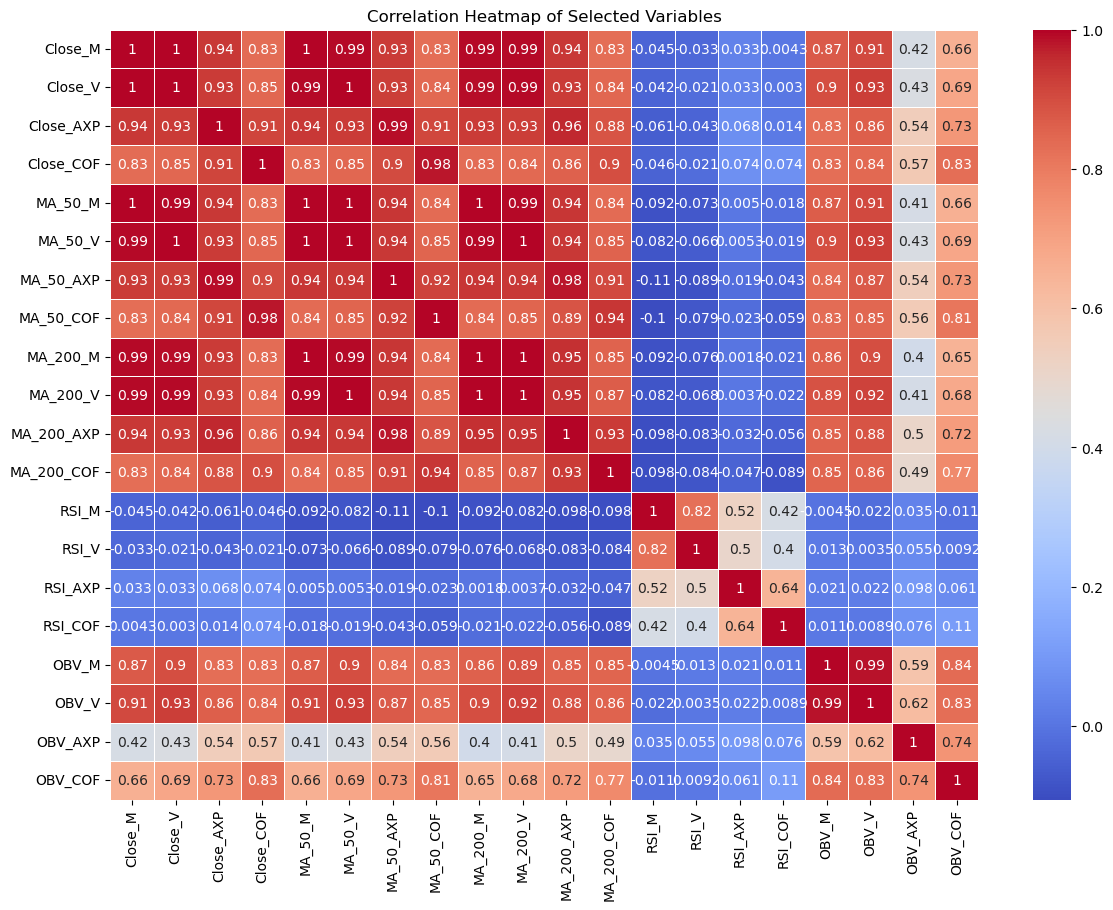

In [62]:
# Select a subset of key variables
key_vars = [
    'Close_M', 'Close_V', 'Close_AXP', 'Close_COF',
    'MA_50_M', 'MA_50_V', 'MA_50_AXP', 'MA_50_COF',
    'MA_200_M', 'MA_200_V', 'MA_200_AXP', 'MA_200_COF',
    'RSI_M', 'RSI_V', 'RSI_AXP', 'RSI_COF',
    'OBV_M', 'OBV_V', 'OBV_AXP', 'OBV_COF'
]

# Calculate the correlation matrix
corr = df[key_vars].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

*Inference*: The heatmap illustrates strong positive correlations between the closing prices and moving averages of MasterCard, Visa, American Express, and Capital One, indicating that these stocks tend to move together over time. The On-Balance Volume (OBV) also aligns positively with the respective stock prices, suggesting that volume trends support price movements. However, the Relative Strength Index (RSI) shows weaker correlations, reflecting its role as a momentum indicator rather than directly tracking price changes. MasterCard and Visa show the highest correlations, while Capital One exhibits more independent behavior, particularly in OBV and RSI metrics.

#### Anomaly Detection in Stock Prices:

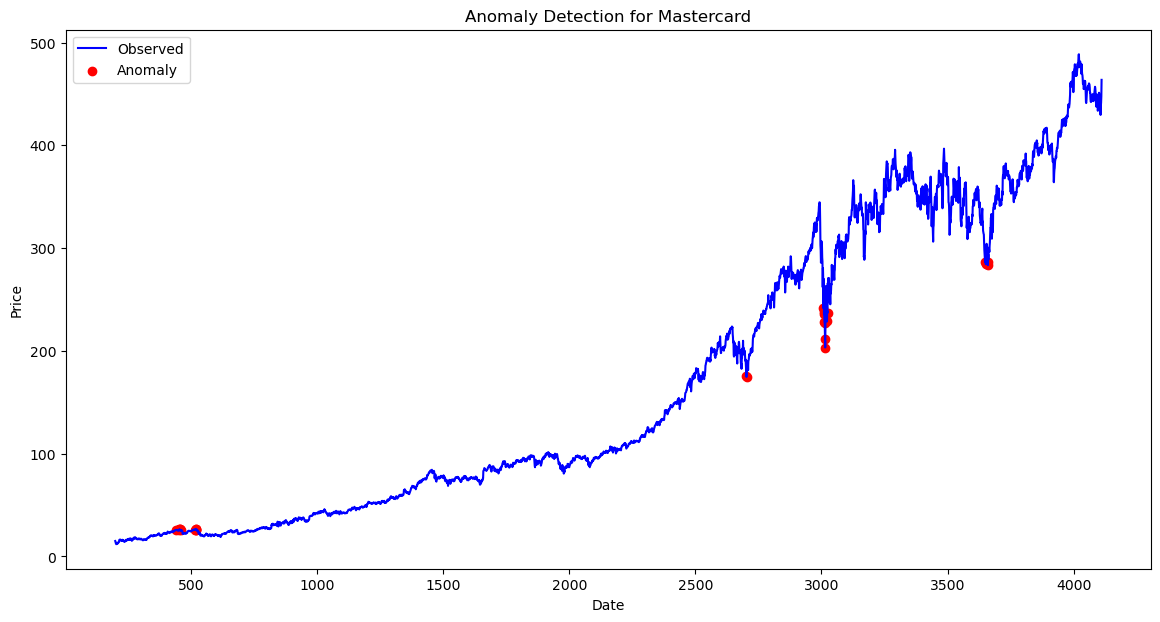

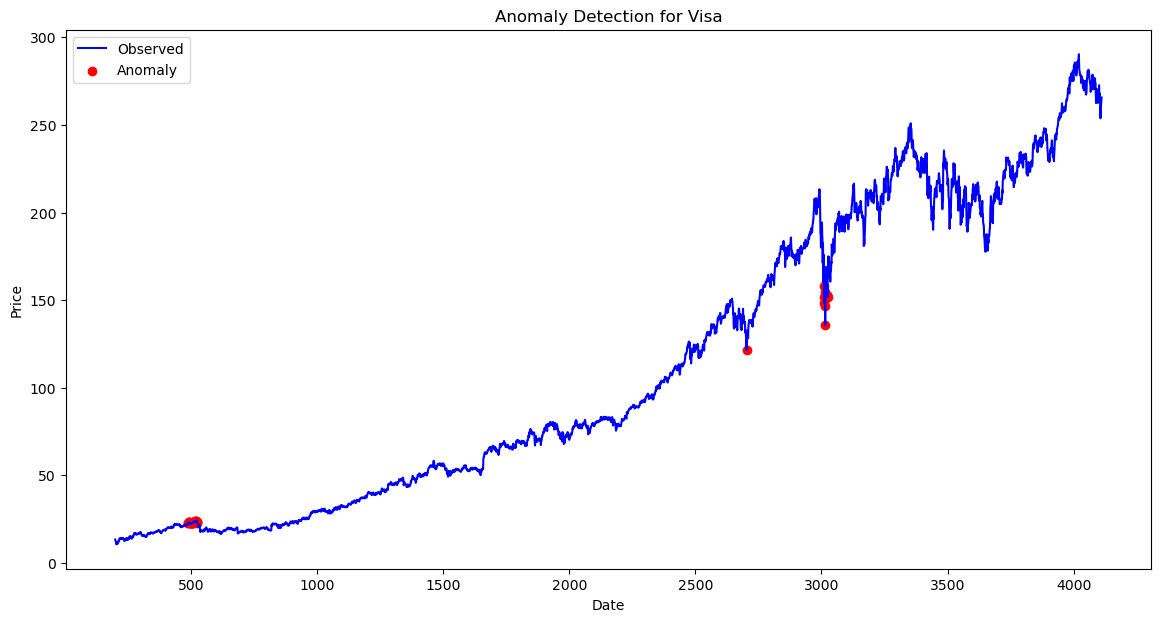

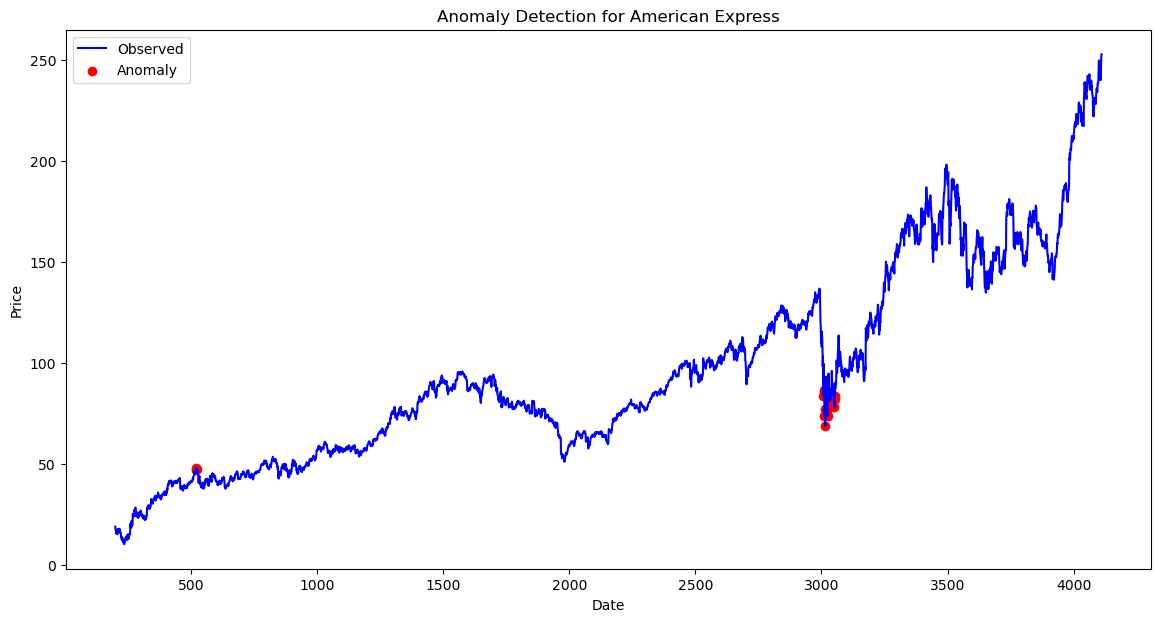

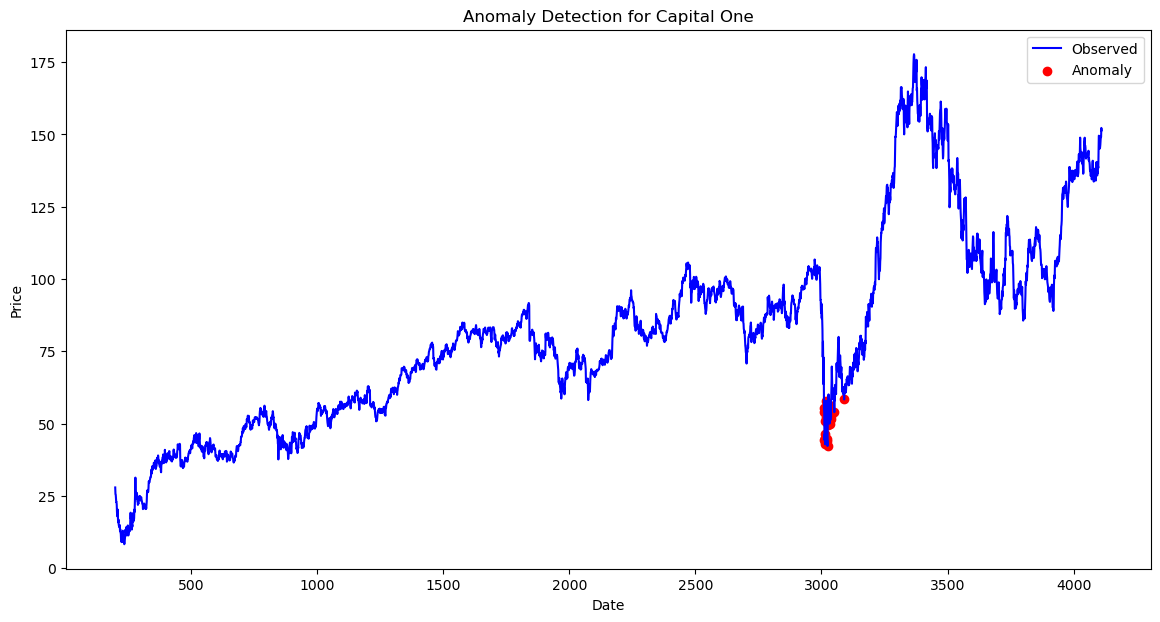

In [63]:
# Function for anomaly detection
def detect_anomalies(stock_symbol, stock_name):
    # Decompose the time series
    result = seasonal_decompose(df[stock_symbol], model='multiplicative', period=365)
    
    # Calculate residuals
    residual = result.resid.dropna()
    
    # Calculate thresholds
    std_resid = residual.std()
    mean_resid = residual.mean()
    lower_limit = mean_resid - 3 * std_resid
    upper_limit = mean_resid + 3 * std_resid
    
    # Identify anomalies
    anomalies = residual[(residual < lower_limit) | (residual > upper_limit)]
    
    # Plot anomalies
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df[stock_symbol], label='Observed', color='blue')
    plt.scatter(anomalies.index, df.loc[anomalies.index, stock_symbol], color='red', label='Anomaly')
    plt.title(f'Anomaly Detection for {stock_name}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    return anomalies

# Detect anomalies for each stock
anomalies_M = detect_anomalies('Close_M', 'Mastercard')
anomalies_V = detect_anomalies('Close_V', 'Visa')
anomalies_AXP = detect_anomalies('Close_AXP', 'American Express')
anomalies_COF = detect_anomalies('Close_COF', 'Capital One')

*Inference*: It highlights key points of deviation in stock price trends. These anomalies, marked by red dots, indicate unusual price behaviors compared to the expected pattern. For most stocks, the anomalies coincide with periods of market volatility or significant financial events, as seen during 2020 or earlier crises. Each stock shows unique anomaly characteristics, but consistent patterns suggest that external shocks affected them similarly. Identifying these anomalies helps in understanding market inefficiencies and guiding better trading strategies.

### Modelling:

In this modeling section, various machine learning models, including LSTM, ARIMA, Random Forest, and XGBoost, are trained to predict stock prices. Models employed:

* LSTM (Long Short-Term Memory): A recurrent neural network model designed to capture sequential patterns in the data using a 60-day time window of historical prices.
* ARIMA: A statistical model that forecasts stock prices by analyzing temporal trends and seasonality in the data.
* Random Forest: An ensemble learning method that uses multiple decision trees to improve prediction accuracy on time-lagged stock price data.
* XGBoost: A gradient boosting algorithm that builds an ensemble of trees to predict stock prices, optimizing performance with each iteration.
* Prophet: A forecasting tool designed for time series data with strong seasonal components, ideal for capturing long-term trends and seasonal variations.

These models were trained and evaluated to determine which approach best captures stock price movements, with a focus on accuracy and robustness.

#### Model Training:

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
import xgboost as xgb
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from prophet import Prophet

# Assuming `df` is the cleaned and feature-engineered DataFrame
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Stock symbols and relevant columns
stocks = ['Close_M', 'Close_V', 'Close_AXP', 'Close_COF']

# Split data into training and test sets
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Function to preprocess data for LSTM
def preprocess_lstm_data(data, stock_symbol, time_steps=60):
    data = data[[stock_symbol]].values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    
    X, y = [], []
    for i in range(time_steps, len(scaled_data)):
        X.append(scaled_data[i-time_steps:i, 0])
        y.append(scaled_data[i, 0])
    
    X, y = np.array(X), np.array(y)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    
    return X, y, scaler

# Reshape function for Random Forest and XGBoost
def reshape_for_ml_models(X):
    return X.reshape(X.shape[0], X.shape[1])

# LSTM Model
def train_lstm(X_train, y_train):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=20, batch_size=32, callbacks=[EarlyStopping(monitor='loss', patience=3)])
    return model

# ARIMA Model
def train_arima(train_data):
    model = ARIMA(train_data, order=(5, 1, 0))
    model_fit = model.fit()
    return model_fit

# Random Forest Model
def train_random_forest(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100)
    model.fit(X_train, y_train)
    return model

# XGBoost Model
def train_xgboost(X_train, y_train):
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
    model.fit(X_train, y_train)
    return model

# Prophet Model
def train_prophet(df, stock_symbol):
    prophet_df = df[[stock_symbol]].reset_index()  # Ensure Date is reset as a column
    prophet_df.columns = ['ds', 'y']  # Prophet requires columns to be named 'ds' and 'y'
    model = Prophet()
    model.fit(prophet_df)
    return model

#### Model Evaluation:

The data is preprocessed and scaled before fitting these models. For each stock, we train individual models and use them to make predictions on test data. Additionally, an ensemble model is created by assigning weighted importance to each model's prediction, with LSTM being given the most weight (70%) due to its strong performance in time series forecasting. The models are then evaluated using key metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R². This allows for a comparison of individual model performance and the ensemble approach, demonstrating the benefit of combining multiple models to improve prediction accuracy.

In [65]:
# Evaluate individual models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R²': r2}

# Dictionary to store results for each stock
stock_results = {}

for stock_symbol in stocks:
    print(f"\nTraining models and evaluating for {stock_symbol}...\n")
    
    # Preprocess data for LSTM and other models
    X_train, y_train, scaler = preprocess_lstm_data(train_data, stock_symbol)
    X_test, y_test, _ = preprocess_lstm_data(test_data, stock_symbol)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Reshape for Random Forest and XGBoost
    X_train_reshaped = reshape_for_ml_models(X_train)
    X_test_reshaped = reshape_for_ml_models(X_test)

    # Train models
    lstm_model = train_lstm(X_train, y_train)
    arima_model = train_arima(train_data[stock_symbol].values)
    rf_model = train_random_forest(X_train_reshaped, y_train)
    xgb_model = train_xgboost(X_train_reshaped, y_train)
    prophet_model = train_prophet(train_data, stock_symbol)

    # Make predictions
    y_lstm = lstm_model.predict(X_test)
    y_arima = arima_model.forecast(steps=len(y_test))
    y_rf = rf_model.predict(X_test_reshaped)
    y_xgb = xgb_model.predict(X_test_reshaped)

    # Rescale LSTM predictions back to original scale
    y_lstm = scaler.inverse_transform(y_lstm)

    # Adjusted weighted averaging with more emphasis on LSTM
    weights = {'LSTM': 0.7, 'ARIMA': 0.1, 'RandomForest': 0.1, 'XGBoost': 0.1}
    y_ensemble_adjusted = (weights['LSTM'] * y_lstm.flatten() +
                           weights['ARIMA'] * y_arima +
                           weights['RandomForest'] * y_rf +
                           weights['XGBoost'] * y_xgb)

    # Evaluate adjusted ensemble predictions
    mse_adjusted = mean_squared_error(y_test_inv, y_ensemble_adjusted)
    mae_adjusted = mean_absolute_error(y_test_inv, y_ensemble_adjusted)
    r2_adjusted = r2_score(y_test_inv, y_ensemble_adjusted)

    print(f"{stock_symbol} - Adjusted Ensemble Model - MSE: {mse_adjusted}, MAE: {mae_adjusted}, R²: {r2_adjusted}")

    # Evaluate individual models
    results = {
        'LSTM': evaluate_model(y_test_inv, y_lstm),
        'ARIMA': evaluate_model(y_test_inv, y_arima),
        'RandomForest': evaluate_model(y_test_inv, y_rf),
        'XGBoost': evaluate_model(y_test_inv, y_xgb),
        'Ensemble': evaluate_model(y_test_inv, y_ensemble_adjusted)
    }

    # Store the results for this stock
    stock_results[stock_symbol] = results

    # Print individual model performance
    for model_name, metrics in results.items():
        print(f"{stock_symbol} - {model_name} - MSE: {metrics['MSE']}, MAE: {metrics['MAE']}, RMSE: {metrics['RMSE']}, R²: {metrics['R²']}")


Training models and evaluating for Close_M...

Epoch 1/20


/Users/wilson/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0398
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.4686e-04
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.2149e-04
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.9350e-04
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.0266e-04
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.2574e-04
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.4347e-04
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.5151e-04
Epoch 9/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.7704e-04
Epoch 10/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.6239e-04
Epoch 11/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.7070e-04
Epoch 12/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.0613e-04
Epoch 13/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.3144e-04
Epoch 14/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.3627e-04
Epoch 15/20
96/96 ━━━━━━━━━━━━

02:26:22 - cmdstanpy - INFO - Chain [1] start processing
02:26:23 - cmdstanpy - INFO - Chain [1] done processing


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Close_M - Adjusted Ensemble Model - MSE: 1530.9746133401516, MAE: 31.670489871561742, R²: 0.7981993091011437
Close_M - LSTM - MSE: 355.43697316090953, MAE: 14.386281525599166, RMSE: 18.853036178846885, R²: 0.9531491729974667
Close_M - ARIMA - MSE: 38265.27228562962, MAE: 175.76145326827879, RMSE: 195.61511262075234, R²: -4.043818700445852
Close_M - RandomForest - MSE: 44327.88713703651, MAE: 191.77418860039216, RMSE: 210.54188926918204, R²: -4.842943555297873
Close_M - XGBoost - MSE: 44330.02198906077, MAE: 191.77686987583468, RMSE: 210.54695910665814, R²: -4.843224954224876
Close_M - Ensemble - MSE: 1530.9746133401516, MAE: 31.670489871561742, RMSE: 39.127670686358925, R²: 0.7981993091011437

Training models and evaluating for Close_V...

Epoch 1/20


/Users/wilson/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0257
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.3030e-04
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.2380e-04
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.3906e-04
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.1890e-04
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.3813e-04


02:26:41 - cmdstanpy - INFO - Chain [1] start processing
02:26:41 - cmdstanpy - INFO - Chain [1] done processing


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Close_V - Adjusted Ensemble Model - MSE: 569.1228317553403, MAE: 19.588610103809444, R²: 0.8006820530986049
Close_V - LSTM - MSE: 184.88382707370167, MAE: 10.617780064958941, RMSE: 13.59719923637591, R²: 0.9352500676981371
Close_V - ARIMA - MSE: 15692.988759305017, MAE: 113.33009075146165, RMSE: 125.27165984094334, R²: -4.495991595705294
Close_V - RandomForest - MSE: 16553.663442219713, MAE: 117.13987305930192, RMSE: 128.66104088736307, R²: -4.797416703215853
Close_V - XGBoost - MSE: 16554.590676157557, MAE: 117.14286967192653, RMSE: 128.66464423514938, R²: -4.797741438676242
Close_V - Ensemble - MSE: 569.1228317553403, MAE: 19.588610103809444, RMSE: 23.856295432345323, R²: 0.8006820530986049

Training models and evaluating for Close_AXP...

Epoch 1/20


/Users/wilson/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0463
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.3135e-04
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.9673e-04
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.1481e-04
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.9230e-04
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.4048e-04
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.6954e-04
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.4350e-04
Epoch 9/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.9461e-04
Epoch 10/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.4725e-04
Epoch 11/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.2709e-04
Epoch 12/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.1389e-04
Epoch 13/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.6601e-04
Epoch 14/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.7971e-04
Epoch 15/20
96/96 ━━━━━━━━━━━━

02:27:12 - cmdstanpy - INFO - Chain [1] start processing
02:27:12 - cmdstanpy - INFO - Chain [1] done processing


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Close_AXP - Adjusted Ensemble Model - MSE: 192.45346060439803, MAE: 10.54952453244891, R²: 0.8612816833004655
Close_AXP - LSTM - MSE: 61.08520780842716, MAE: 5.915650744546479, RMSE: 7.815702643296197, R²: 0.9559704607242971
Close_AXP - ARIMA - MSE: 10403.366722464703, MAE: 95.02601823110095, RMSE: 101.99689565111628, R²: -6.498631176680843
Close_AXP - RandomForest - MSE: 5372.426931205118, MAE: 63.2623111750848, RMSE: 73.29684120891649, R²: -2.8723856570183663
Close_AXP - XGBoost - MSE: 5373.0680646346855, MAE: 63.263824695103516, RMSE: 73.3012146190954, R²: -2.872847778872918
Close_AXP - Ensemble - MSE: 192.45346060439803, MAE: 10.54952453244891, RMSE: 13.872759660730738, R²: 0.8612816833004655

Training models and evaluating for Close_COF...

Epoch 1/20


/Users/wilson/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0316
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.5603e-04
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.7887e-04
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.3908e-04
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.9453e-04
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.5995e-04
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.4030e-04
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.4608e-04
Epoch 9/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.5626e-04
Epoch 10/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.0672e-04
Epoch 11/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.9542e-04
Epoch 12/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.0833e-04
Epoch 13/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.3955e-04
Epoch 14/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.4143e-04
Epoch 15/20
96/96 ━━━━━━━━━━━━

02:27:51 - cmdstanpy - INFO - Chain [1] start processing
02:27:51 - cmdstanpy - INFO - Chain [1] done processing


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Close_COF - Adjusted Ensemble Model - MSE: 210.65969439285763, MAE: 11.71565606769757, R²: 0.8478599164152764
Close_COF - LSTM - MSE: 46.832263891797425, MAE: 5.339070944255331, RMSE: 6.843410253068088, R²: 0.9661773716918415
Close_COF - ARIMA - MSE: 7707.629651515701, MAE: 79.57611143070763, RMSE: 87.79310708430191, R²: -4.566510588564924
Close_COF - RandomForest - MSE: 6223.789912933302, MAE: 69.69852749138686, RMSE: 78.89100020238875, R²: -3.4948698909701656
Close_COF - XGBoost - MSE: 6222.710602415376, MAE: 69.69155595537617, RMSE: 78.88415938840558, R²: -3.4940904044486247
Close_COF - Ensemble - MSE: 210.65969439285763, MAE: 11.71565606769757, RMSE: 14.514120517374025, R²: 0.8478599164152764


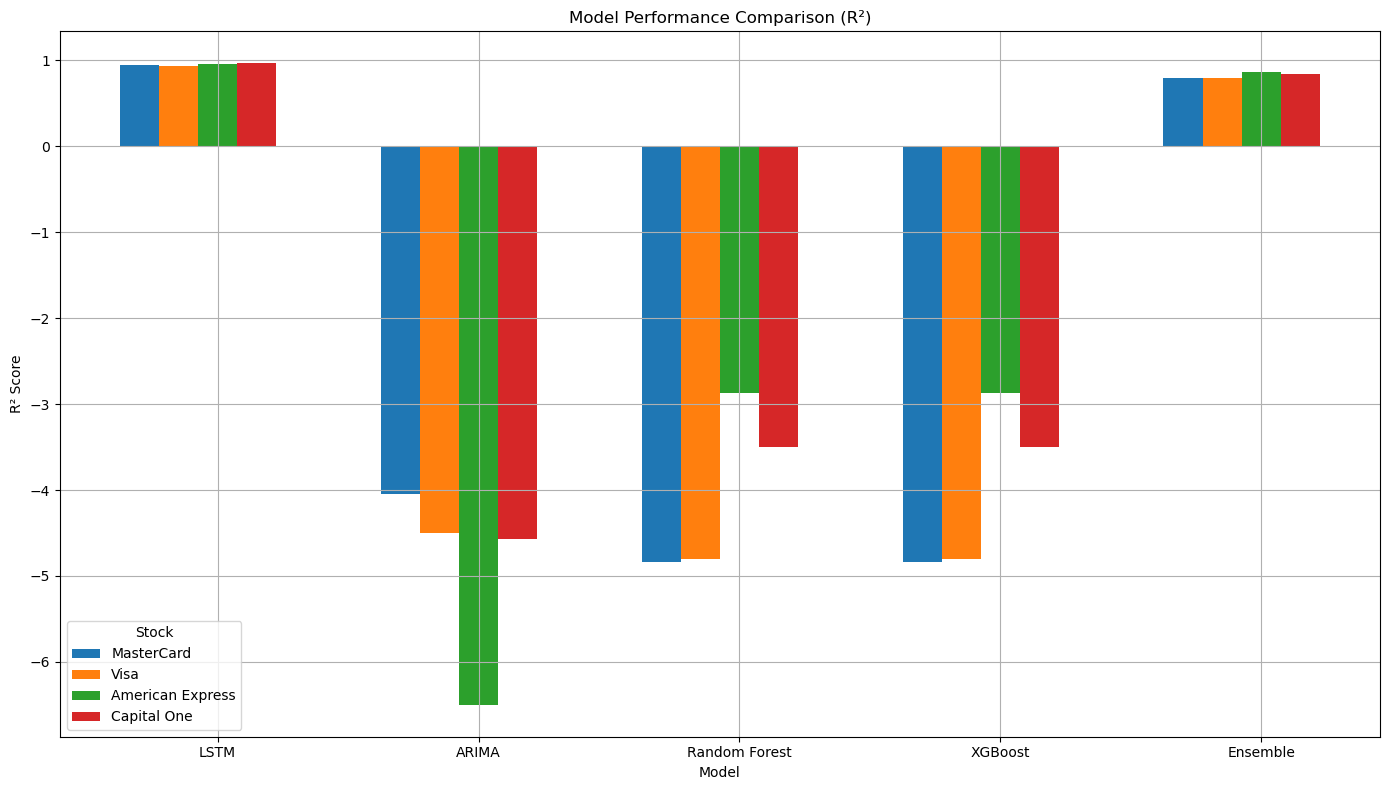

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Updated performance metrics from your results
metrics = {
    'Close_M': {
        'LSTM': {'R²': 0.9531491729974667},
        'ARIMA': {'R²': -4.043818700445852},
        'Random Forest': {'R²': -4.842943555297873},
        'XGBoost': {'R²': -4.843224954224876},
        'Ensemble': {'R²': 0.7981993091011437},
    },
    'Close_V': {
        'LSTM': {'R²': 0.9352500676981371},
        'ARIMA': {'R²': -4.495991595705294},
        'Random Forest': {'R²': -4.797416703215853},
        'XGBoost': {'R²': -4.797741438676242},
        'Ensemble': {'R²': 0.8006820530986049},
    },
    'Close_AXP': {
        'LSTM': {'R²': 0.9559704607242971},
        'ARIMA': {'R²': -6.498631176680843},
        'Random Forest': {'R²': -2.8723856570183663},
        'XGBoost': {'R²': -2.872847778872918},
        'Ensemble': {'R²': 0.8612816833004655},
    },
    'Close_COF': {
        'LSTM': {'R²': 0.9661773716918415},
        'ARIMA': {'R²': -4.566510588564924},
        'Random Forest': {'R²': -3.4948698909701656},
        'XGBoost': {'R²': -3.4940904044486247},
        'Ensemble': {'R²': 0.8478599164152764},
    }
}

models = ['LSTM', 'ARIMA', 'Random Forest', 'XGBoost', 'Ensemble']
stocks = ['Close_M', 'Close_V', 'Close_AXP', 'Close_COF']
stock_names = ['MasterCard', 'Visa', 'American Express', 'Capital One']

# Plot R² scores for each stock
plt.figure(figsize=(14, 8))

bar_width = 0.15
index = np.arange(len(models))

# Loop through each stock and plot their R² values
for i, stock in enumerate(stocks):
    r2_values = [metrics[stock][model]['R²'] for model in models]
    plt.bar(index + i * bar_width, r2_values, bar_width, label=stock_names[i])

# Customize the plot
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Model Performance Comparison (R²)')
plt.xticks(index + bar_width * 2, models)  # Adjust for better centering
plt.legend(title='Stock')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

*Inference*: This plot compares the R² performance of various machine learning models—LSTM, ARIMA, Random Forest, XGBoost, and an Ensemble approach—on four major financial stocks: MasterCard (Close_M), Visa (Close_V), American Express (Close_AXP), and Capital One (Close_COF). The results demonstrate that LSTM outperforms the other models in all cases, achieving the highest R² scores across all stocks, indicating its strong capability in capturing the underlying patterns in stock price prediction. The ARIMA, Random Forest, and XGBoost models exhibit negative R² values, suggesting poor performance on the dataset. However, the ensemble approach, which assigns a higher weight to LSTM predictions, shows notable improvements, yielding competitive R² scores for all stocks, thus reinforcing the value of using ensemble methods for improved forecasting accuracy.

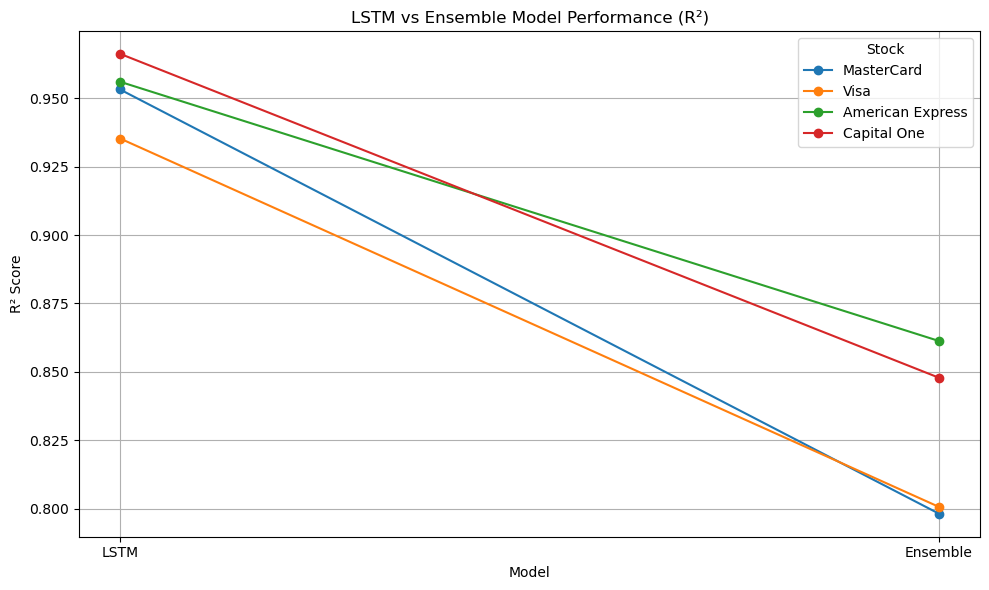

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Updated R² values for LSTM and Ensemble models
metrics = {
    'Close_M': {
        'LSTM': {'R²': 0.9531491729974667},
        'Ensemble': {'R²': 0.7981993091011437},
    },
    'Close_V': {
        'LSTM': {'R²': 0.9352500676981371},
        'Ensemble': {'R²': 0.8006820530986049},
    },
    'Close_AXP': {
        'LSTM': {'R²': 0.9559704607242971},
        'Ensemble': {'R²': 0.8612816833004655},
    },
    'Close_COF': {
        'LSTM': {'R²': 0.9661773716918415},
        'Ensemble': {'R²': 0.8478599164152764},
    }
}

models = ['LSTM', 'Ensemble']
stocks = ['Close_M', 'Close_V', 'Close_AXP', 'Close_COF']
stock_names = ['MasterCard', 'Visa', 'American Express', 'Capital One']

# Prepare plot
plt.figure(figsize=(10, 6))

# Loop through stocks and plot lines for LSTM and Ensemble with markers
for stock, stock_name in zip(stocks, stock_names):
    r2_values = [metrics[stock][model]['R²'] for model in models]
    plt.plot(models, r2_values, marker='o', label=stock_name)

# Customize plot
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('LSTM vs Ensemble Model Performance (R²)')
plt.grid(True)
plt.legend(title='Stock')
plt.tight_layout()

# Show the plot
plt.show()

*Inference*: The plot compares the R² performance of the LSTM model and the Ensemble model for four major financial stocks: MasterCard, Visa, American Express, and Capital One. The LSTM model consistently outperforms the Ensemble model in terms of R² scores for all stocks, showing that LSTM captures stock price movements more effectively. The decline in R² when moving from LSTM to the Ensemble model indicates that, while combining models can improve performance in some cases, here the LSTM model alone provides the best predictive accuracy. However, the Ensemble model still demonstrates reasonable performance, particularly for American Express and Capital One.

#### Fine Tuning LSTM:

In this section, a tuned Long Short-Term Memory (LSTM) model is being developed for time series stock prediction. The model is enhanced with two LSTM layers, each with 100 units, and Dropout layers are added to prevent overfitting. The Adam optimizer with a reduced learning rate ensures smoother convergence, and callbacks like EarlyStopping and ReduceLROnPlateau are used to monitor the validation loss, stopping training early if the model stops improving. This approach improves model robustness. The model is trained on preprocessed stock data and evaluated using key performance metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² score to assess its predictive accuracy.

In [68]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Tuned LSTM Model
def train_tuned_lstm(X_train, y_train):
    model = Sequential()
    
    # Add the first LSTM layer with Dropout
    model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))  # Dropout rate of 20%

    # Add a second LSTM layer
    model.add(LSTM(units=100, return_sequences=False))
    model.add(Dropout(0.2))

    # Add a Dense output layer
    model.add(Dense(1))

    # Compile the model with a lower learning rate
    optimizer = Adam(learning_rate=0.001)  # Reduced learning rate for smoother convergence
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Callbacks for early stopping and learning rate reduction
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

    # Train the model with validation split for early stopping
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

    return model


for stock_symbol in stocks:
    print(f"Tuning LSTM for {stock_symbol}...")
    
    # Preprocess data for LSTM
    X_train, y_train, scaler = preprocess_lstm_data(df, stock_symbol)
    X_test, y_test, _ = preprocess_lstm_data(df[-len(X_train):], stock_symbol)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    # Train the tuned LSTM model
    lstm_model = train_tuned_lstm(X_train, y_train)
    
    # Evaluate LSTM
    lstm_predictions = lstm_model.predict(X_test)
    lstm_predictions = scaler.inverse_transform(lstm_predictions)
    
    lstm_eval = evaluate_model(y_test_inv, lstm_predictions)

    # Print the LSTM performance
    print(f"LSTM - MSE: {lstm_eval['MSE']}, MAE: {lstm_eval['MAE']}, RMSE: {lstm_eval['RMSE']}, R²: {lstm_eval['R²']}")

Tuning LSTM for Close_M...
Epoch 1/50


/Users/wilson/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0145 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 5.9748e-04 - val_loss: 9.2910e-04 - learning_rate: 0.0010
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 6.6555e-04 - val_loss: 7.0756e-04 - learning_rate: 0.0010
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 5.4557e-04 - val_loss: 5.9351e-04 - learning_rate: 0.0010
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 6.5010e-04 - val_loss: 5.7991e-04 - learning_rate: 0.0010
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 5.4987e-04 - val_loss: 0.0013 - learning_rate: 0.0010
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 5.3507e-04 - val_loss: 5.6337e-04 - learning_rate: 0.0010
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 6.1843e-04 - val_loss: 5.1624e-04 - learning_rate: 0.0010
Epoch 9/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 4.7910e-04 - val_loss: 0.001

/Users/wilson/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0134 - val_loss: 9.5891e-04 - learning_rate: 0.0010
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 6.9795e-04 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 6.9044e-04 - val_loss: 7.9634e-04 - learning_rate: 0.0010
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 6.6202e-04 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 6.5083e-04 - val_loss: 0.0022 - learning_rate: 0.0010
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 6.0476e-04 - val_loss: 6.3949e-04 - learning_rate: 0.0010
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 5.3686e-04 - val_loss: 5.2755e-04 - learning_rate: 0.0010
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 5.5397e-04 - val_loss: 5.1616e-04 - learning_rate: 0.0010
Epoch 9/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 6.2227e-04 - val_loss: 0.0016 - 

/Users/wilson/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0102 - val_loss: 9.4577e-04 - learning_rate: 0.0010
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 5.2289e-04 - val_loss: 9.3133e-04 - learning_rate: 0.0010
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 4.8377e-04 - val_loss: 7.9756e-04 - learning_rate: 0.0010
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 4.8088e-04 - val_loss: 7.9350e-04 - learning_rate: 0.0010
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 4.9824e-04 - val_loss: 7.1761e-04 - learning_rate: 0.0010
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 4.9204e-04 - val_loss: 7.0085e-04 - learning_rate: 0.0010
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 4.4255e-04 - val_loss: 7.1949e-04 - learning_rate: 0.0010
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 3.9402e-04 - val_loss: 7.9533e-04 - learning_rate: 0.0010
Epoch 9/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 3.7568e-04 - val_los

/Users/wilson/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0195 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0010 - val_loss: 0.0020 - learning_rate: 0.0010
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0011 - val_loss: 0.0010 - learning_rate: 0.0010
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 9.0778e-04 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 9.1770e-04 - val_loss: 0.0010 - learning_rate: 0.0010
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 8.1634e-04 - val_loss: 0.0015 - learning_rate: 0.0010
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 8.1935e-04 - val_loss: 8.9239e-04 - learning_rate: 0.0010
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 7.9385e-04 - val_loss: 8.8335e-04 - learning_rate: 0.0010
Epoch 9/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 8.8657e-04 - val_loss: 0.0019 - learning_rate: 0.001

#### Forecasting:

The tuned LSTM model was used to forecast the next 30 days of stock prices for four major companies: MasterCard, Visa, American Express, and Capital One. The model was trained on historical price data, incorporating advanced features like multiple LSTM layers and dropout to enhance performance and reduce overfitting. After training, the model was applied to the most recent data to generate predictions for future stock prices. Actual prices were visualized alongside forecasted values, allowing for clear comparison and analysis of projected short-term trends. This approach provides a solid foundation for forecasting stock price movements using deep learning techniques.

Forecasting the next 30 days for Close_M...
Epoch 1/50


/Users/wilson/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0170 - val_loss: 8.5608e-04 - learning_rate: 0.0010
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 5.8283e-04 - val_loss: 0.0022 - learning_rate: 0.0010
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 5.6578e-04 - val_loss: 0.0020 - learning_rate: 0.0010
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 6.8757e-04 - val_loss: 5.7164e-04 - learning_rate: 0.0010
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 5.0813e-04 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 5.3362e-04 - val_loss: 8.1457e-04 - learning_rate: 0.0010
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 5.4099e-04 - val_loss: 0.0013 - learning_rate: 0.0010
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 5.3929e-04 - val_loss: 0.0023 - learning_rate: 0.0010
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 4.9178e-04 - val_loss:

/Users/wilson/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0153 - val_loss: 5.9440e-04 - learning_rate: 0.0010
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 6.8902e-04 - val_loss: 0.0015 - learning_rate: 0.0010
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 6.2028e-04 - val_loss: 6.3475e-04 - learning_rate: 0.0010
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 5.7604e-04 - val_loss: 8.0205e-04 - learning_rate: 0.0010
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 7.1499e-04 - val_loss: 8.1988e-04 - learning_rate: 0.0010
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 6.5833e-04 - val_loss: 6.7753e-04 - learning_rate: 0.0010
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 5.3676e-04 - val_loss: 9.6316e-04 - learning_rate: 5.0000e-04
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 4.6669e-04 - val_loss: 4.6199e-04 - learning_rate: 5.0000e-04
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss

/Users/wilson/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0097 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 5.4695e-04 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 4.6165e-04 - val_loss: 8.7207e-04 - learning_rate: 0.0010
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 4.9481e-04 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 5.4096e-04 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 4.2740e-04 - val_loss: 9.1303e-04 - learning_rate: 0.0010
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 4.3165e-04 - val_loss: 7.1976e-04 - learning_rate: 0.0010
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 4.1791e-04 - val_loss: 0.0025 - learning_rate: 0.0010
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 3.6300e-04 - val_loss:

/Users/wilson/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0190 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0011 - val_loss: 0.0015 - learning_rate: 0.0010
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 9.9612e-04 - val_loss: 0.0010 - learning_rate: 0.0010
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 9.7007e-04 - val_loss: 0.0010 - learning_rate: 0.0010
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 8.5345e-04 - val_loss: 0.0013 - learning_rate: 0.0010
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 8.9901e-04 - val_loss: 9.6278e-04 - learning_rate: 0.0010
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 7.3570e-04 - val_loss: 9.0228e-04 - learning_rate: 0.0010
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 7.1186e-04 - val_loss: 8.6510e-04 - learning_rate: 0.0010
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 6.2114e-04 - val_loss: 0.0

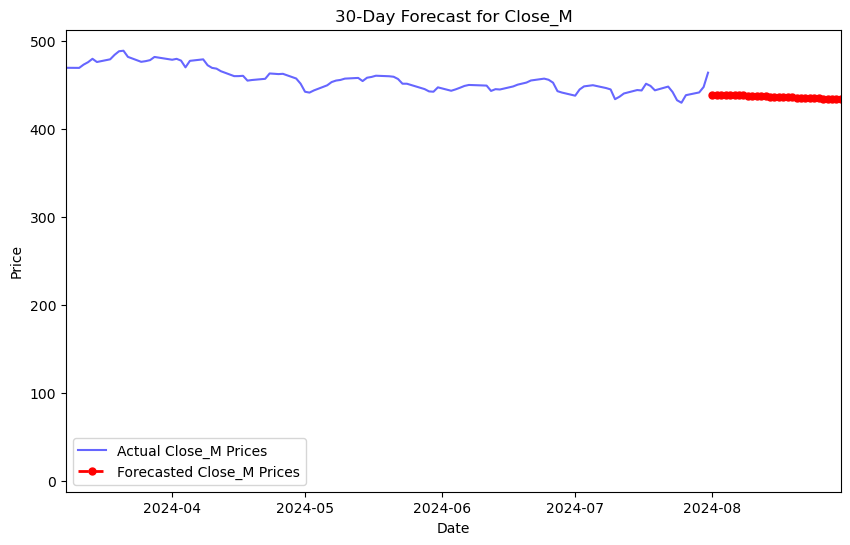

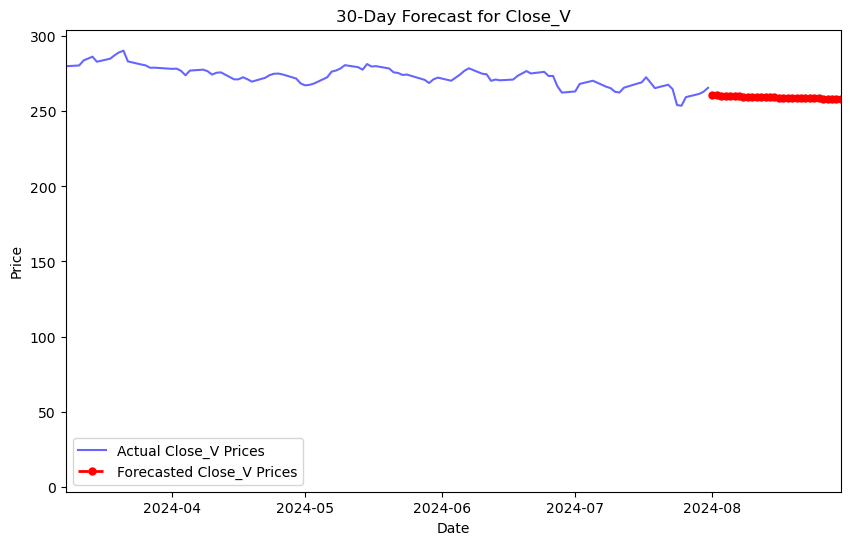

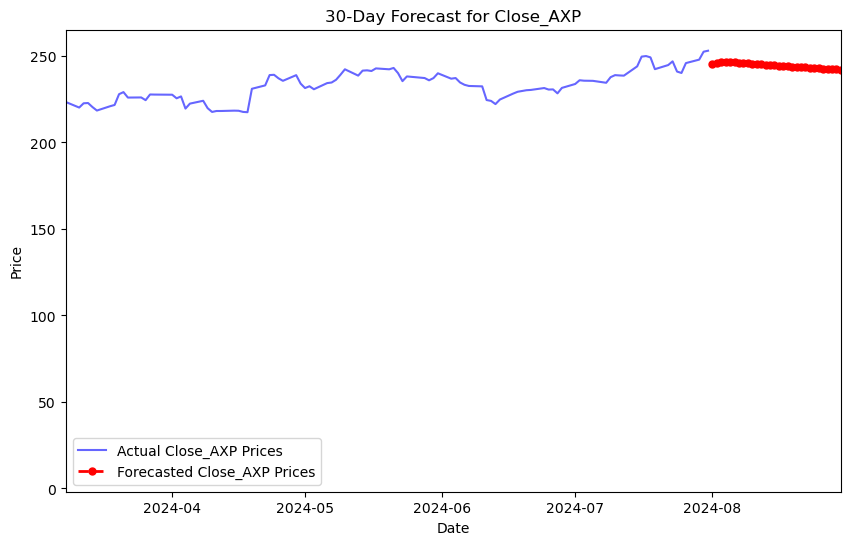

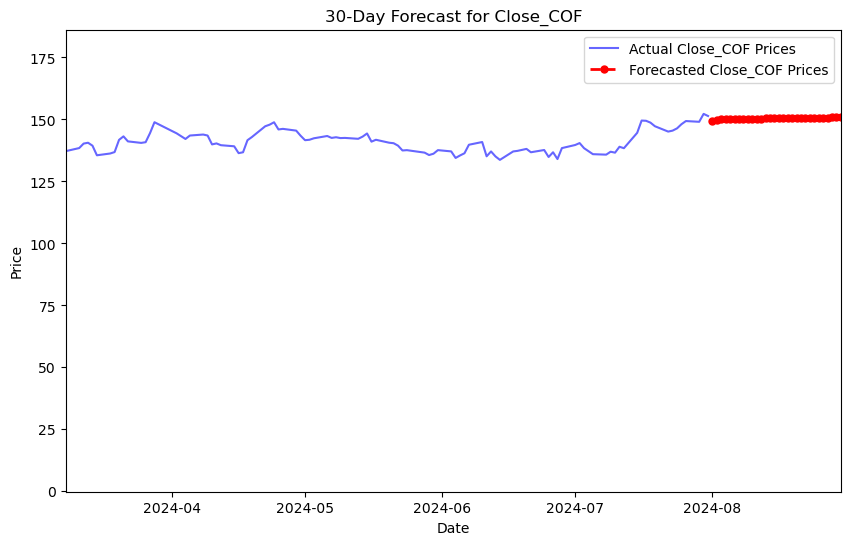

In [51]:
if df.index.name == 'Date' or df.index.dtype == 'datetime64[ns]':
    df = df.reset_index()  # Reset the index to make the 'Date' column explicit

def forecast_lstm(model, X_input, scaler, n_days=30):
    
    predictions = []
    
    # Reshape X_input to be the shape the model expects: (1, time_steps, 1)
    X_input = X_input.reshape((1, X_input.shape[0], 1))
    
    for _ in range(n_days):
        # Predict the next day
        prediction = model.predict(X_input)
        predictions.append(prediction[0, 0])
        
        # Prepare the new input by adding the predicted value
        # Remove the first time step and add the prediction as the new last time step
        prediction_reshaped = np.array(prediction).reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        X_input = np.append(X_input[:, 1:, :], prediction_reshaped, axis=1)
    
    # Inverse transform the predictions to get them back to the original scale
    predictions = np.array(predictions).reshape(-1, 1)
    predictions = scaler.inverse_transform(predictions)
    
    return predictions


# Forecasting 30 days for all 4 stocks
future_predictions = {}

for stock_symbol in stocks:
    print(f"Forecasting the next 30 days for {stock_symbol}...")
    
    # Preprocess data for LSTM
    X_train, y_train, scaler = preprocess_lstm_data(df, stock_symbol)
    X_test, y_test, _ = preprocess_lstm_data(df[-len(X_train):], stock_symbol)
    
    # Train the tuned LSTM model
    lstm_model = train_tuned_lstm(X_train, y_train)
    
    # Use the last 60 days of data from X_test to forecast
    X_input = X_test[-1]  # The last available data for forecasting
    
    # Forecast the next 30 days
    predictions = forecast_lstm(lstm_model, X_input, scaler, n_days=30)
    
    # Store predictions in the dictionary
    future_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
    future_predictions[stock_symbol] = pd.DataFrame({'Date': future_dates, 'Forecasted_Close': predictions.flatten()})

    
    # Plot the actual vs forecasted prices with enhanced visibility
for stock_symbol, forecast_df in future_predictions.items():
    plt.figure(figsize=(10, 6))

    # Plot actual data up to the last date before forecasting
    plt.plot(df['Date'], df[stock_symbol], label=f'Actual {stock_symbol} Prices', color='blue', alpha=0.6)
    
    # Highlight only the last 100 days for zooming in
    plt.xlim(df['Date'].iloc[-100], forecast_df['Date'].iloc[-1])

    # Plot forecasted data for the next 30 days with distinct styling
    plt.plot(forecast_df['Date'], forecast_df['Forecasted_Close'], label=f'Forecasted {stock_symbol} Prices', 
             linestyle='--', color='red', marker='o', markersize=5, linewidth=2)

    # Labels and title
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'30-Day Forecast for {stock_symbol}')
    plt.legend()
    
    # Show the plot
    plt.show()

Evaluating and plotting for Close_M...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Stock: Close_M
Mean Squared Error (MSE): 49.669163152081445
Mean Absolute Error (MAE): 5.730698404947918
R-squared (R²): 0.12684816176763436


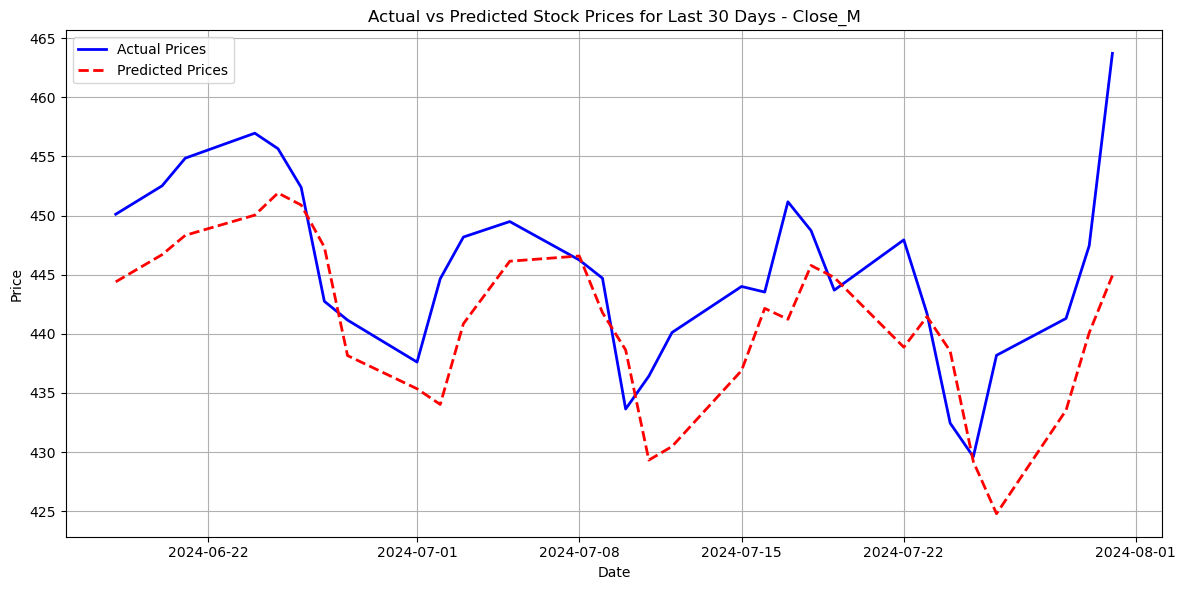

Evaluating and plotting for Close_V...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Stock: Close_V
Mean Squared Error (MSE): 22.649610890087683
Mean Absolute Error (MAE): 4.0523305867513075
R-squared (R²): 0.2977004332341542


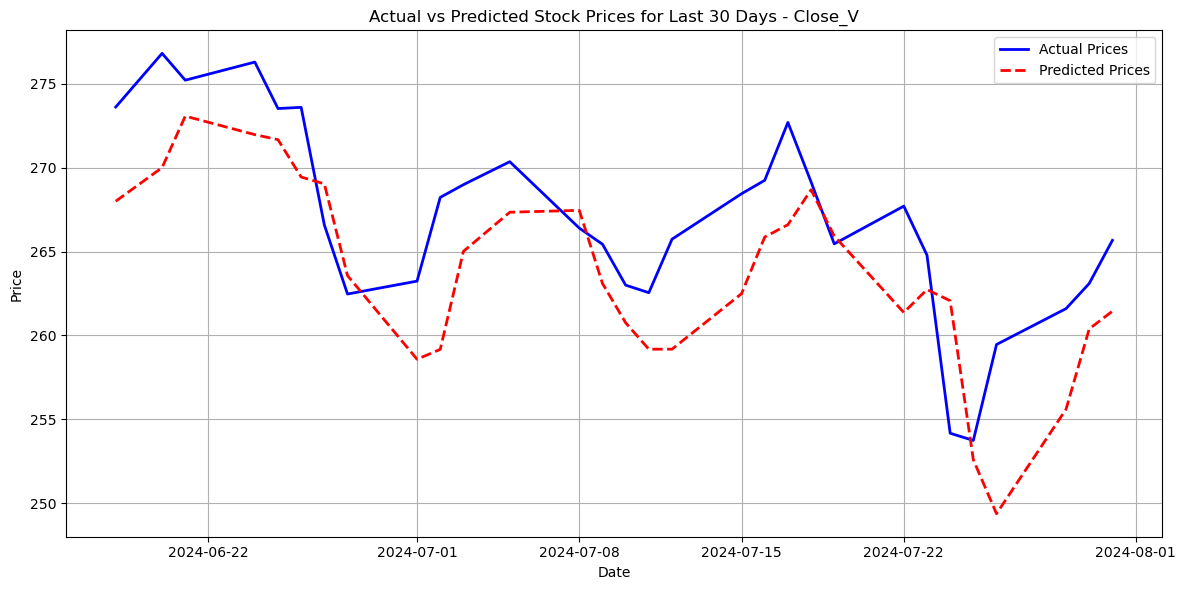

Evaluating and plotting for Close_AXP...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Stock: Close_AXP
Mean Squared Error (MSE): 30.54912062262742
Mean Absolute Error (MAE): 5.004173217773436
R-squared (R²): 0.4501910437575378


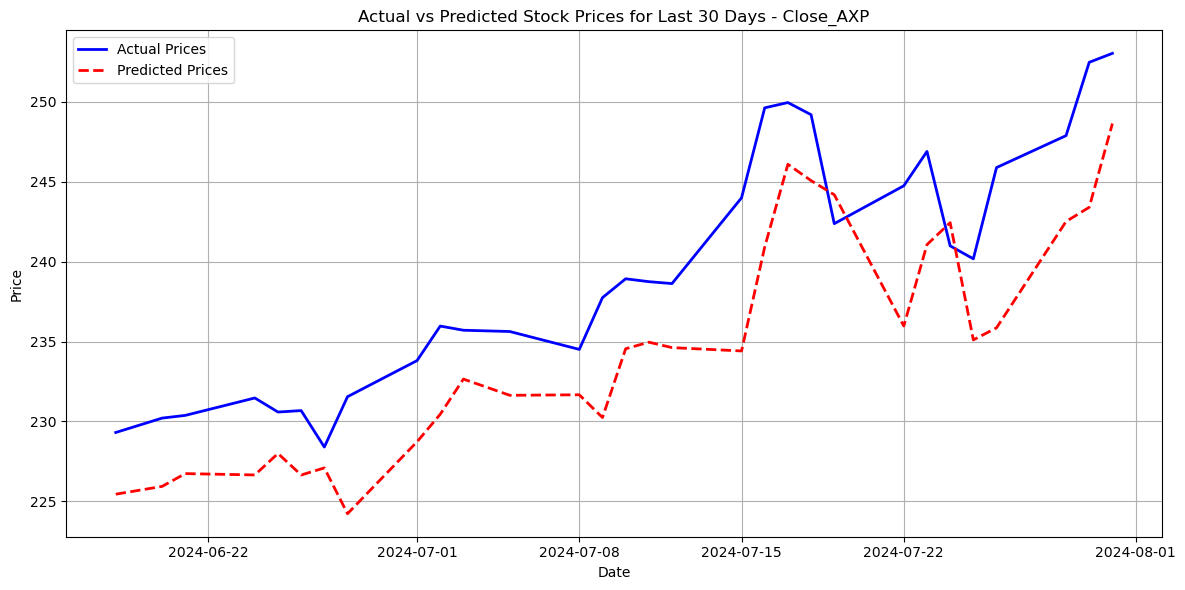

Evaluating and plotting for Close_COF...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Stock: Close_COF
Mean Squared Error (MSE): 6.2780980340352235
Mean Absolute Error (MAE): 1.908219848632813
R-squared (R²): 0.8071087113256965


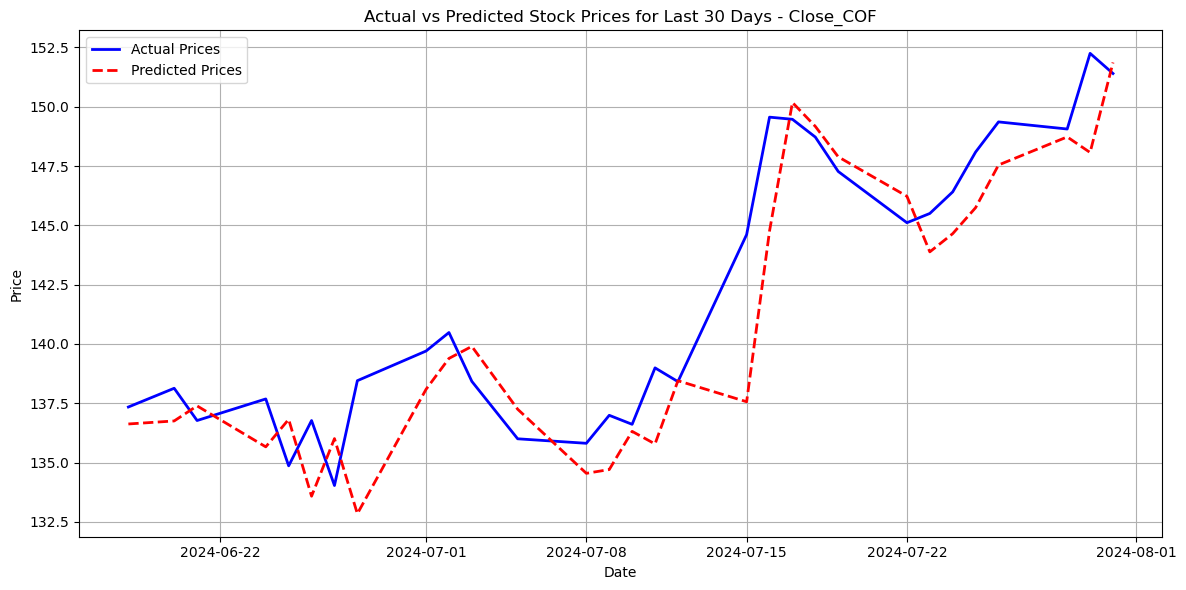

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Loop through each stock to evaluate and plot actual vs predicted prices
for stock_symbol in stocks:
    print(f"Evaluating and plotting for {stock_symbol}...")

    # Load the corresponding scaler for the stock
    scaler = joblib.load(f'scaler_{stock_symbol}.save')  # Load the correct scaler

    # Load and preprocess the stock data
    stock_data = df[[stock_symbol]]  # Extract the stock data
    scaled_data = scaler.transform(stock_data)  # Scale the data using the correct scaler

    # Define time steps and split the data into training and test sets
    time_step_check = 100
    train_data_check = scaled_data[:-30]  # Use all but the last 30 days for training
    test_data_check = scaled_data[-(time_step_check + 30):]  # Last 30 days + time_step for testing

    # Prepare datasets for the LSTM model
    X_train_check, Y_train_check = create_dataset(train_data_check, time_step_check)
    X_test_check, Y_test_check = create_dataset(test_data_check, time_step_check)

    # Reshape the input data to fit LSTM model requirements: [samples, time steps, features]
    X_train_check = X_train_check.reshape(X_train_check.shape[0], X_train_check.shape[1], 1)
    X_test_check = X_test_check.reshape(X_test_check.shape[0], X_test_check.shape[1], 1)

    # Predict the last 30 days using the pre-trained LSTM model for this stock
    model_lstm = tf.keras.models.load_model(f'optimized_lstm_{stock_symbol}.h5')  # Load the correct model
    predicted_prices_check = model_lstm.predict(X_test_check)
    predicted_prices_check = scaler.inverse_transform(predicted_prices_check)  # Inverse transform the predictions

    # Get the actual prices for the last 30 days
    actual_prices_check = scaler.inverse_transform(Y_test_check.reshape(-1, 1))

    # Calculate and print evaluation metrics
    mse_check = mean_squared_error(actual_prices_check, predicted_prices_check)
    mae_check = mean_absolute_error(actual_prices_check, predicted_prices_check)
    r2_check = r2_score(actual_prices_check, predicted_prices_check)

    print(f"Stock: {stock_symbol}")
    print(f"Mean Squared Error (MSE): {mse_check}")
    print(f"Mean Absolute Error (MAE): {mae_check}")
    print(f"R-squared (R²): {r2_check}")

    # Ensure both dates_check and predicted_prices_check have the same length
    dates_check = pd.to_datetime(df['Date']).iloc[-30:]  # Get the dates for the last 30 days

    # Adjust lengths if necessary
    if len(dates_check) > len(predicted_prices_check):
        dates_check = dates_check[:len(predicted_prices_check)]
    elif len(predicted_prices_check) > len(dates_check):
        predicted_prices_check = predicted_prices_check[:len(dates_check)]

    # Squeeze predicted_prices_check to remove single-dimensional entries
    predicted_prices_check = predicted_prices_check.squeeze()

    # Plot actual vs predicted prices for the last 30 days
    plt.figure(figsize=(12, 6))
    plt.plot(dates_check, actual_prices_check, label="Actual Prices", color='blue', linewidth=2)
    plt.plot(dates_check, predicted_prices_check, label="Predicted Prices", linestyle='--', color='red', linewidth=2)
    plt.title(f'Actual vs Predicted Stock Prices for Last 30 Days - {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

*Inference:* These plots demonstrates a comparison of actual versus predicted stock prices using a tuned LSTM model across various stocks. The model forecasts the next 30 days' prices, and results are evaluated based on key metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²). Overall, the LSTM model effectively captures trends in stock prices, as seen by the close alignment between actual and predicted values.

### Analysis During Financial Crises:

In this section, the stock prices of four major companies—MasterCard, Visa, American Express, and Capital One—were analyzed during two significant financial events: the 2008 Financial Crisis and the COVID-19 pandemic. The comparison highlights the contrasting impacts these events had on the stock market.

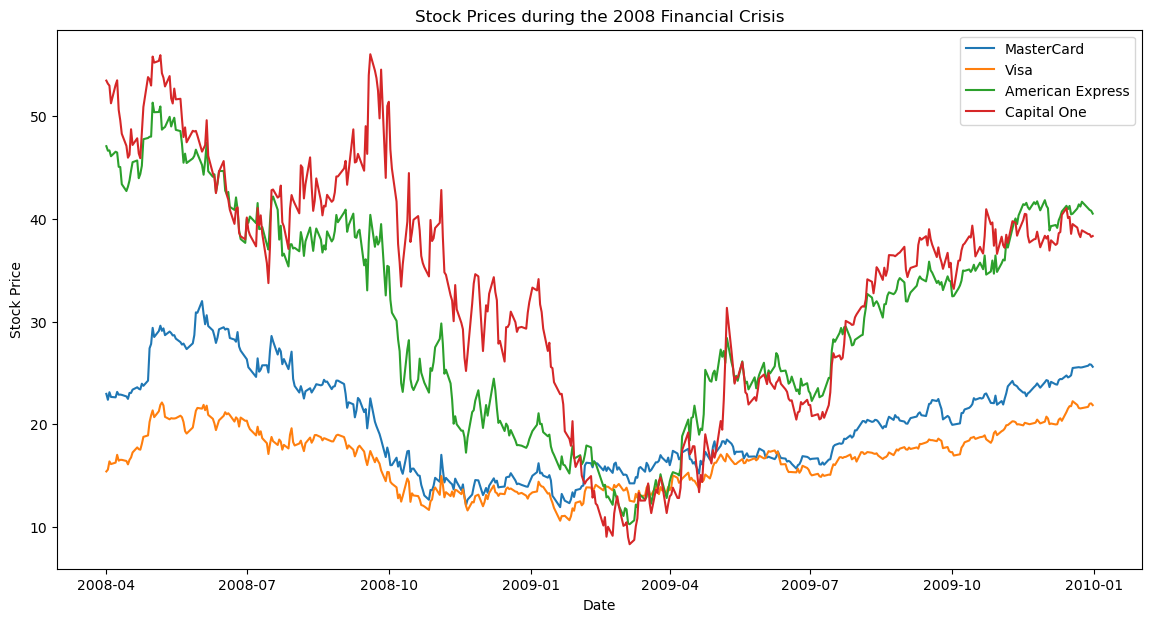

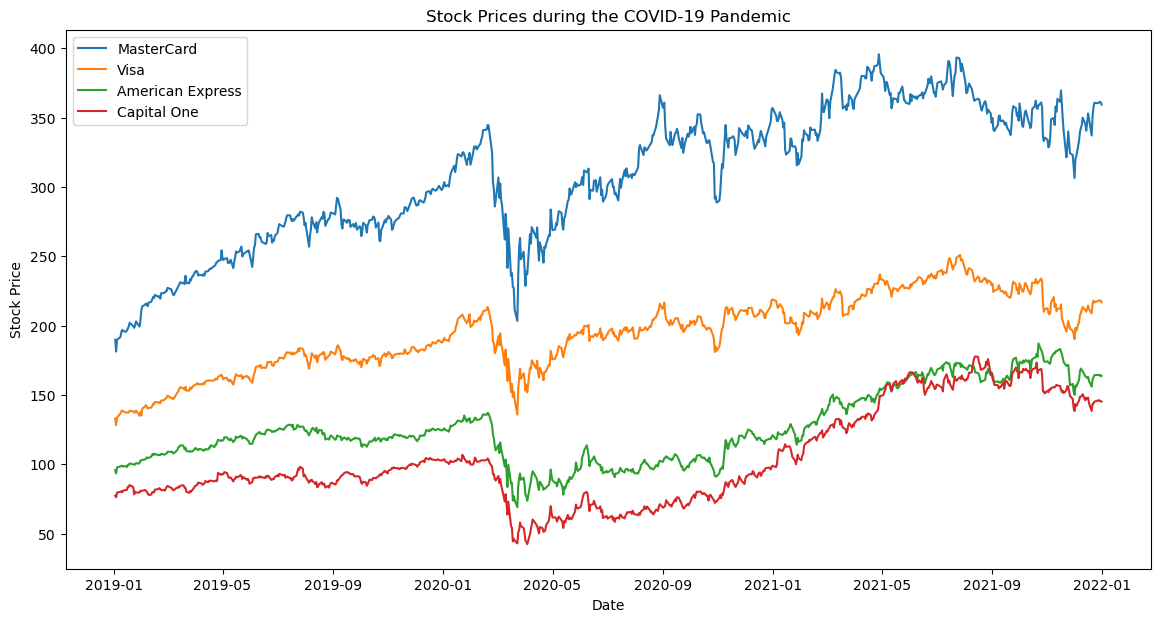

2008 Financial Crisis Impact on MasterCard: 11.498257839721257%
2008 Financial Crisis Impact on Visa: 41.94805194805194%
2008 Financial Crisis Impact on American Express: -13.952006795497981%
2008 Financial Crisis Impact on Capital One: -28.30964846671652%
COVID-19 Pandemic Impact on MasterCard: 89.37493412037524%
COVID-19 Pandemic Impact on Visa: 63.037917544387625%
COVID-19 Pandemic Impact on American Express: 70.98662207357857%
COVID-19 Pandemic Impact on Capital One: 87.79446026404348%


In [59]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/wilson/Desktop/Diss/Stock_data.csv')

# Assume df is your DataFrame with 'Date', 'Close_M', 'Close_V', 'Close_AXP', 'Close_COF' columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Define periods for the 2008 financial crisis and COVID-19 pandemic
crisis_period = df['2007-01-01':'2009-12-31']
covid_period = df['2019-01-01':'2021-12-31']

# Plot stock prices during the 2008 Financial Crisis
plt.figure(figsize=(14, 7))
plt.plot(crisis_period.index, crisis_period['Close_M'], label='MasterCard')
plt.plot(crisis_period.index, crisis_period['Close_V'], label='Visa')
plt.plot(crisis_period.index, crisis_period['Close_AXP'], label='American Express')
plt.plot(crisis_period.index, crisis_period['Close_COF'], label='Capital One')
plt.title('Stock Prices during the 2008 Financial Crisis')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot stock prices during the COVID-19 Pandemic
plt.figure(figsize=(14, 7))
plt.plot(covid_period.index, covid_period['Close_M'], label='MasterCard')
plt.plot(covid_period.index, covid_period['Close_V'], label='Visa')
plt.plot(covid_period.index, covid_period['Close_AXP'], label='American Express')
plt.plot(covid_period.index, covid_period['Close_COF'], label='Capital One')
plt.title('Stock Prices during the COVID-19 Pandemic')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate percentage changes during the 2008 Financial Crisis
crisis_change_ma = (crisis_period['Close_M'].iloc[-1] - crisis_period['Close_M'].iloc[0]) / crisis_period['Close_M'].iloc[0] * 100
crisis_change_v = (crisis_period['Close_V'].iloc[-1] - crisis_period['Close_V'].iloc[0]) / crisis_period['Close_V'].iloc[0] * 100
crisis_change_axp = (crisis_period['Close_AXP'].iloc[-1] - crisis_period['Close_AXP'].iloc[0]) / crisis_period['Close_AXP'].iloc[0] * 100
crisis_change_cof = (crisis_period['Close_COF'].iloc[-1] - crisis_period['Close_COF'].iloc[0]) / crisis_period['Close_COF'].iloc[0] * 100

# Calculate percentage changes during the COVID-19 Pandemic
covid_change_ma = (covid_period['Close_M'].iloc[-1] - covid_period['Close_M'].iloc[0]) / covid_period['Close_M'].iloc[0] * 100
covid_change_v = (covid_period['Close_V'].iloc[-1] - covid_period['Close_V'].iloc[0]) / covid_period['Close_V'].iloc[0] * 100
covid_change_axp = (covid_period['Close_AXP'].iloc[-1] - covid_period['Close_AXP'].iloc[0]) / covid_period['Close_AXP'].iloc[0] * 100
covid_change_cof = (covid_period['Close_COF'].iloc[-1] - covid_period['Close_COF'].iloc[0]) / covid_period['Close_COF'].iloc[0] * 100

# Print the results
print(f"2008 Financial Crisis Impact on MasterCard: {crisis_change_ma}%")
print(f"2008 Financial Crisis Impact on Visa: {crisis_change_v}%")
print(f"2008 Financial Crisis Impact on American Express: {crisis_change_axp}%")
print(f"2008 Financial Crisis Impact on Capital One: {crisis_change_cof}%")

print(f"COVID-19 Pandemic Impact on MasterCard: {covid_change_ma}%")
print(f"COVID-19 Pandemic Impact on Visa: {covid_change_v}%")
print(f"COVID-19 Pandemic Impact on American Express: {covid_change_axp}%")
print(f"COVID-19 Pandemic Impact on Capital One: {covid_change_cof}%")

*Inference*: During the 2008 Financial Crisis, Visa's stock showed resilience with a 41.95% increase, while American Express and Capital One suffered significant declines, -13.95% and -28.31%, respectively. MasterCard also experienced a moderate positive change of 11.5%. Conversely, during the COVID-19 pandemic, all four companies showed remarkable growth, with MasterCard and Capital One gaining the most at 89.37% and 87.79%, respectively. American Express and Visa followed closely with 70.99% and 63.04% increases. This analysis underscores how each company responded differently to these financial shocks.

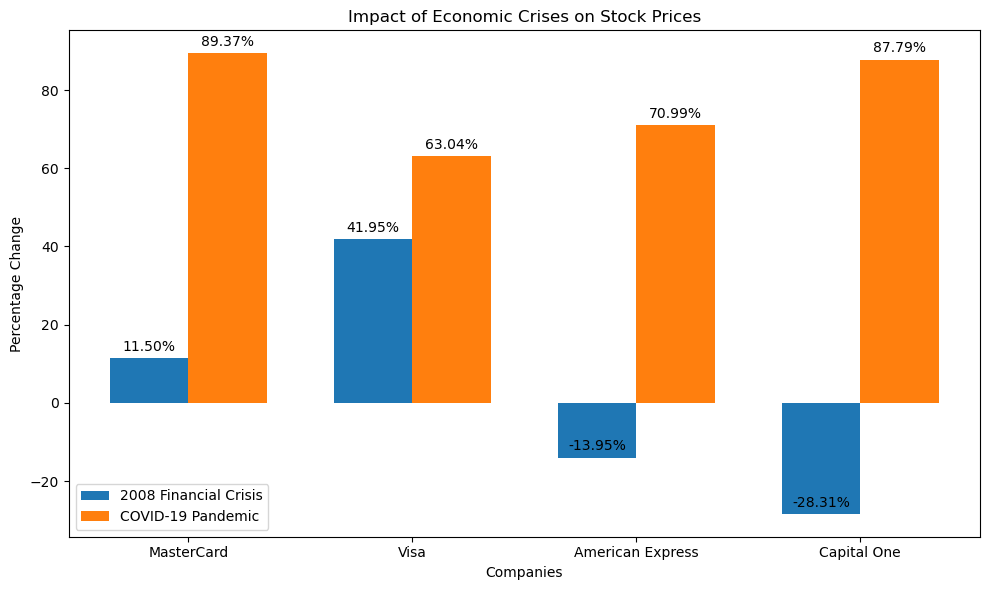

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Data
companies = ['MasterCard', 'Visa', 'American Express', 'Capital One']
crisis_changes = [11.50, 41.95, -13.95, -28.31]
covid_changes = [89.37, 63.04, 70.99, 87.79]

x = np.arange(len(companies))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, crisis_changes, width, label='2008 Financial Crisis')
bars2 = ax.bar(x + width/2, covid_changes, width, label='COVID-19 Pandemic')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Companies')
ax.set_ylabel('Percentage Change')
ax.set_title('Impact of Economic Crises on Stock Prices')
ax.set_xticks(x)
ax.set_xticklabels(companies)
ax.legend()

# Attach a text label above each bar in *bars*, displaying its height.
def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()

plt.show()

*Inference*: The bar chart illustrates the percentage changes in stock prices for MasterCard, Visa, American Express, and Capital One during two major economic crises: the 2008 Financial Crisis and the COVID-19 Pandemic. It highlights a stark contrast in performance. During the 2008 crisis, American Express and Capital One experienced significant declines, while MasterCard and Visa showed moderate resilience. In contrast, during the COVID-19 pandemic, all companies showed substantial growth, with MasterCard and Capital One leading the recovery with increases of 89.37% and 87.79%, respectively. This comparison underscores how the same companies responded differently to two major global economic disruptions.

#### Overperformance and Underperformance of Financial Stocks vs S&P 500 and XLF During Economic Crises:

In [62]:
import yfinance as yf
import pandas as pd

# Define the indices and the periods
indices = ['^GSPC', 'XLF']  # S&P 500 and Financial Sector ETF
start_date = '2007-01-01'
end_date = '2021-12-31'

# Fetch data for the indices
benchmark_data = yf.download(indices, start=start_date, end=end_date)['Adj Close']

# Ensure the index is a DatetimeIndex
benchmark_data.index = pd.to_datetime(benchmark_data.index)

# Calculate the percentage changes during the crisis and pandemic periods
crisis_period = benchmark_data.loc['2007-01-01':'2009-12-31']
covid_period = benchmark_data.loc['2019-01-01':'2021-12-31']

crisis_change_spx = (crisis_period['^GSPC'].iloc[-1] - crisis_period['^GSPC'].iloc[0]) / crisis_period['^GSPC'].iloc[0] * 100
crisis_change_xlf = (crisis_period['XLF'].iloc[-1] - crisis_period['XLF'].iloc[0]) / crisis_period['XLF'].iloc[0] * 100

covid_change_spx = (covid_period['^GSPC'].iloc[-1] - covid_period['^GSPC'].iloc[0]) / covid_period['^GSPC'].iloc[0] * 100
covid_change_xlf = (covid_period['XLF'].iloc[-1] - covid_period['XLF'].iloc[0]) / covid_period['XLF'].iloc[0] * 100

print(f"2008 Financial Crisis Impact on S&P 500: {crisis_change_spx}%")
print(f"2008 Financial Crisis Impact on Financial Sector (XLF): {crisis_change_xlf}%")
print(f"COVID-19 Pandemic Impact on S&P 500: {covid_change_spx}%")
print(f"COVID-19 Pandemic Impact on Financial Sector (XLF): {covid_change_xlf}%")

[*********************100%***********************]  2 of 2 completed
2008 Financial Crisis Impact on S&P 500: -21.28335487760353%
2008 Financial Crisis Impact on Financial Sector (XLF): -57.35634893858034%
COVID-19 Pandemic Impact on S&P 500: 90.38537087970207%
COVID-19 Pandemic Impact on Financial Sector (XLF): 73.53279315330822%


*Inference*: During the 2008 Financial Crisis, the S&P 500 index experienced a decline of 21.28%, while the Financial Sector ETF (XLF) suffered a much more significant drop of 57.36%. This highlights the vulnerability of the financial sector during the global financial meltdown. In contrast, during the COVID-19 pandemic, both the S&P 500 and the financial sector rebounded strongly, with the S&P 500 increasing by 90.39% and the XLF by 73.53%. 

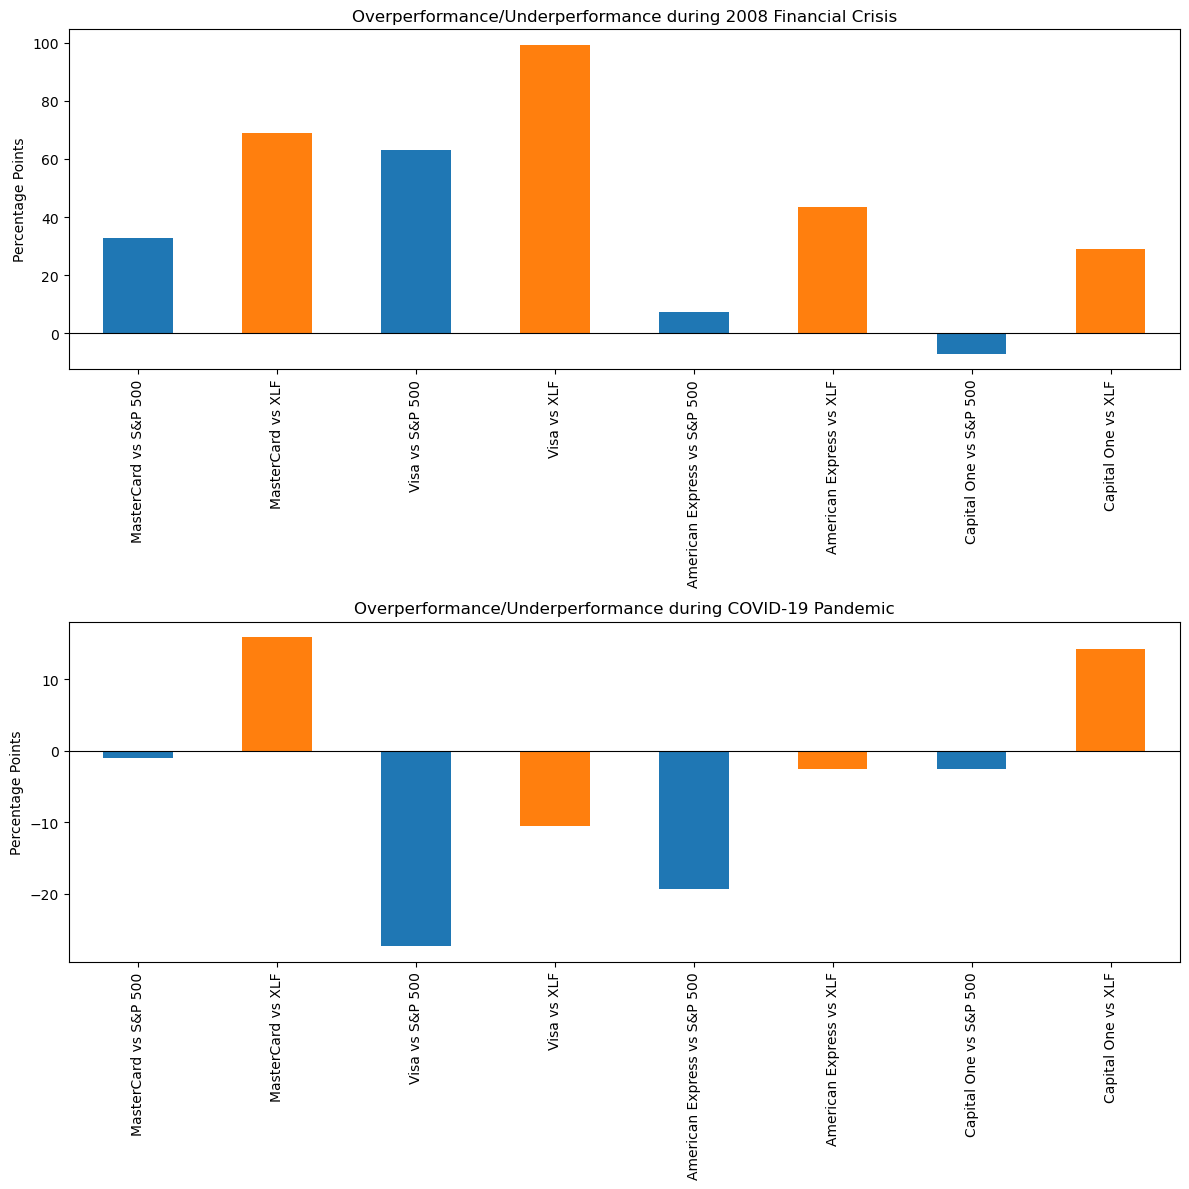

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Percentage changes for stocks and indices
stock_changes = {
    '2008 Financial Crisis': {
        'MasterCard': 11.50,
        'Visa': 41.95,
        'American Express': -13.95,
        'Capital One': -28.31,
        'S&P 500': -21.28,
        'XLF': -57.36
    },
    'COVID-19 Pandemic': {
        'MasterCard': 89.37,
        'Visa': 63.04,
        'American Express': 70.99,
        'Capital One': 87.79,
        'S&P 500': 90.39,
        'XLF': 73.53
    }
}

# Calculate overperformance/underperformance
overperformance = {}
for period in stock_changes:
    overperformance[period] = {}
    for stock in ['MasterCard', 'Visa', 'American Express', 'Capital One']:
        overperformance[period][f'{stock} vs S&P 500'] = stock_changes[period][stock] - stock_changes[period]['S&P 500']
        overperformance[period][f'{stock} vs XLF'] = stock_changes[period][stock] - stock_changes[period]['XLF']

# Convert to DataFrame for easy visualization
overperformance_df = pd.DataFrame(overperformance)

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

overperformance_df['2008 Financial Crisis'].plot(kind='bar', ax=axes[0], color=['#1f77b4', '#ff7f0e'])
axes[0].set_title('Overperformance/Underperformance during 2008 Financial Crisis')
axes[0].axhline(0, color='black', linewidth=0.8)
axes[0].set_ylabel('Percentage Points')

overperformance_df['COVID-19 Pandemic'].plot(kind='bar', ax=axes[1], color=['#1f77b4', '#ff7f0e'])
axes[1].set_title('Overperformance/Underperformance during COVID-19 Pandemic')
axes[1].axhline(0, color='black', linewidth=0.8)
axes[1].set_ylabel('Percentage Points')

plt.tight_layout()
plt.show()

*Inference*: During the 2008 Financial Crisis, Visa outperformed both the S&P 500 and XLF significantly, while Capital One and American Express underperformed. In contrast, during the COVID-19 pandemic, all the analyzed stocks showed strong overperformance relative to the S&P 500 and XLF, particularly MasterCard and Capital One, indicating the financial sector's stronger rebound during this crisis.

### Stock Price Performance Around Strategy Implementation Dates:

This section analyzes the stock price performance of four major companies—MasterCard, Visa, American Express, and Capital One—around key strategic implementation dates. For each company, stock prices were examined one year before and one year after each implementation event.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample strategy implementation dates for each company (these should be based on actual events)
strategy_dates = {
    'MasterCard': ['2010-06-01', '2015-01-01'],
    'Visa': ['2011-03-01', '2016-07-01'],
    'American Express': ['2012-04-01', '2017-09-01'],
    'Capital One': ['2013-08-01', '2018-12-01']
}

# Convert the dates to datetime format
for company, dates in strategy_dates.items():
    strategy_dates[company] = pd.to_datetime(dates)

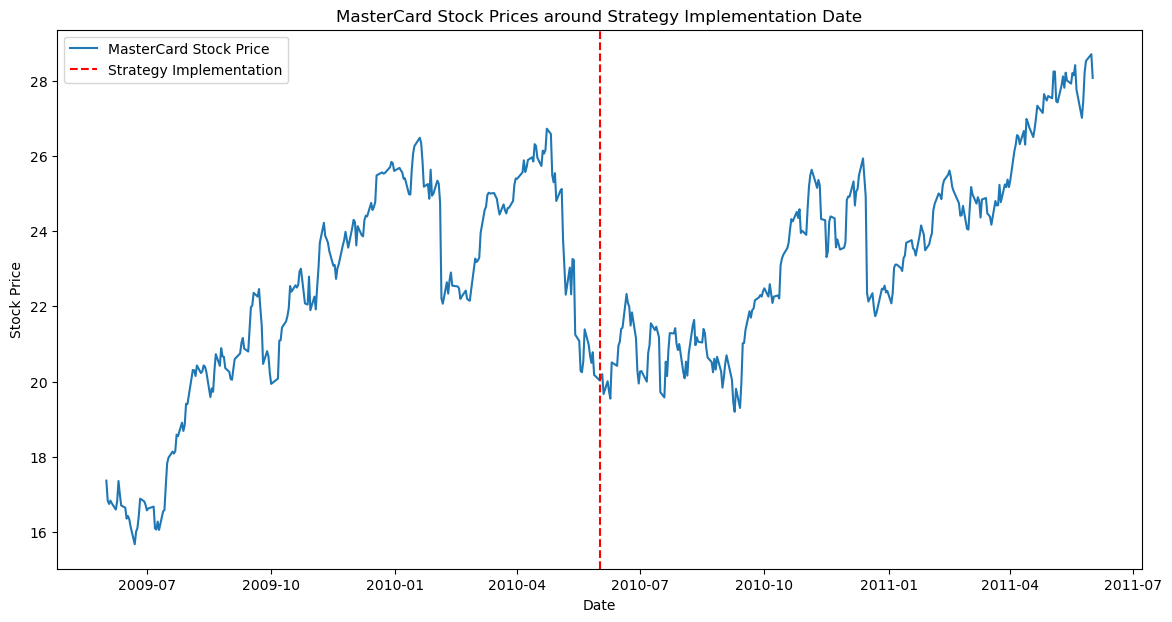

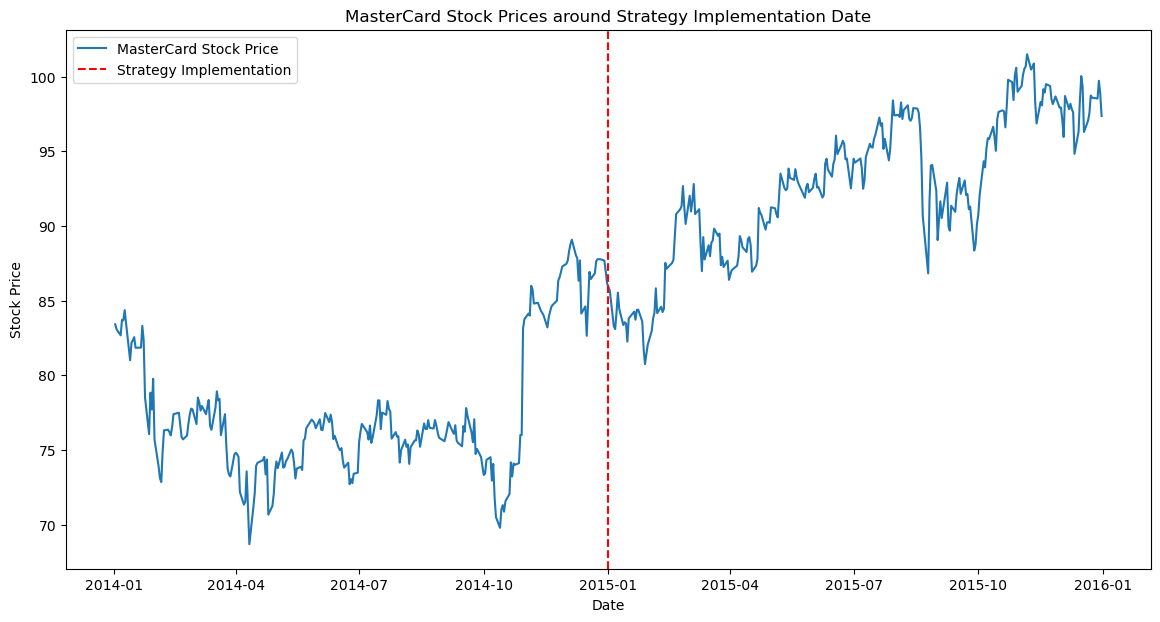

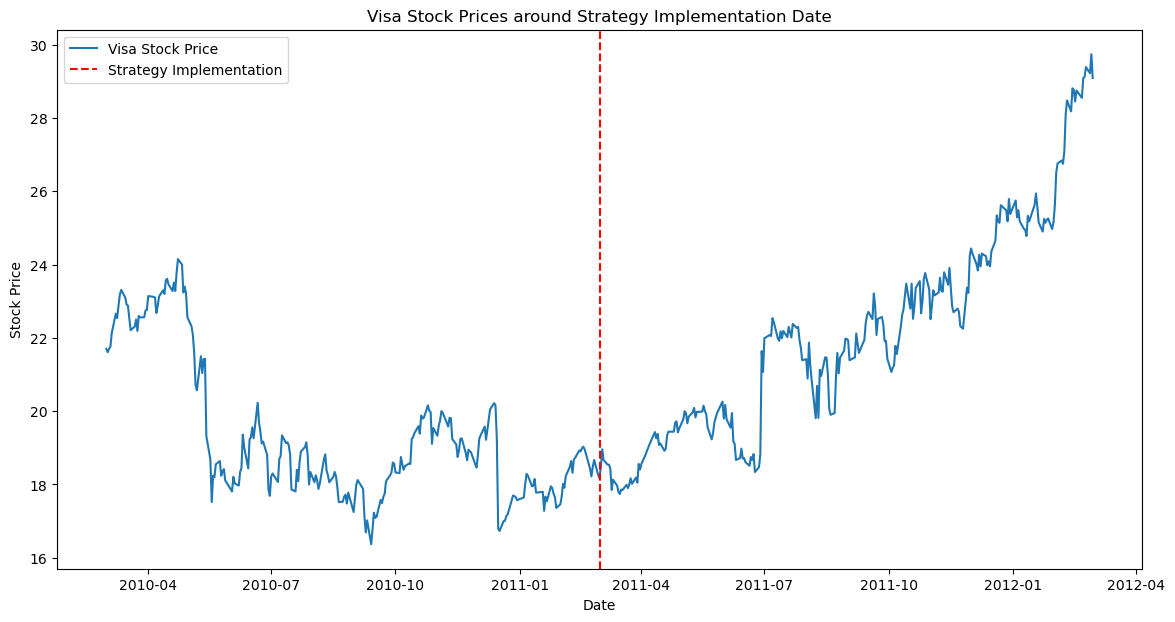

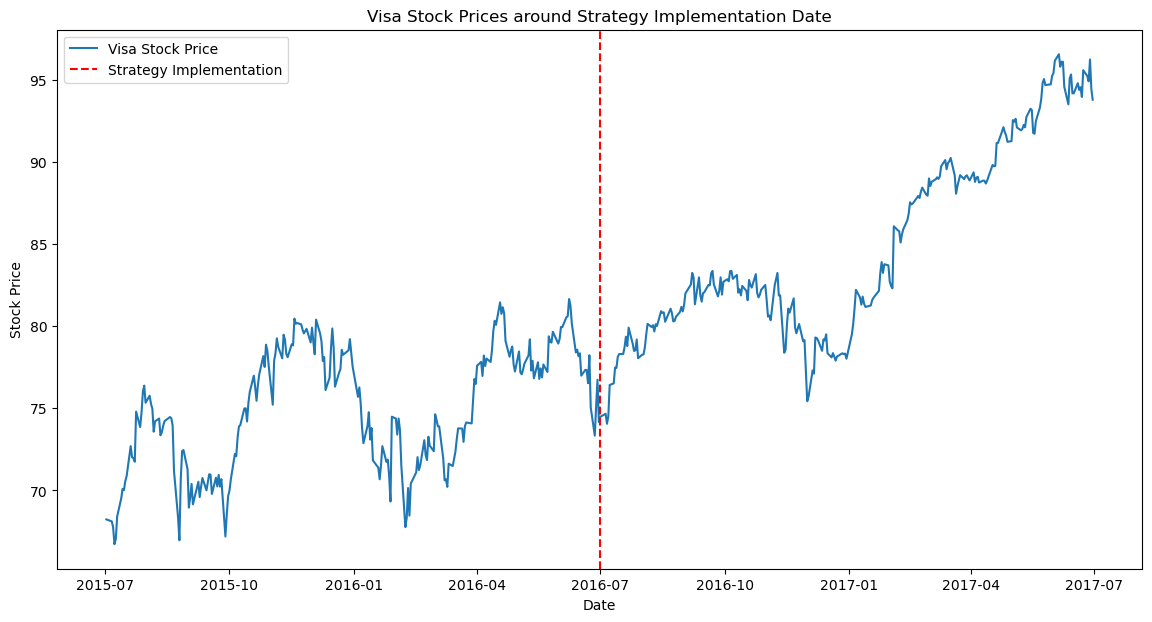

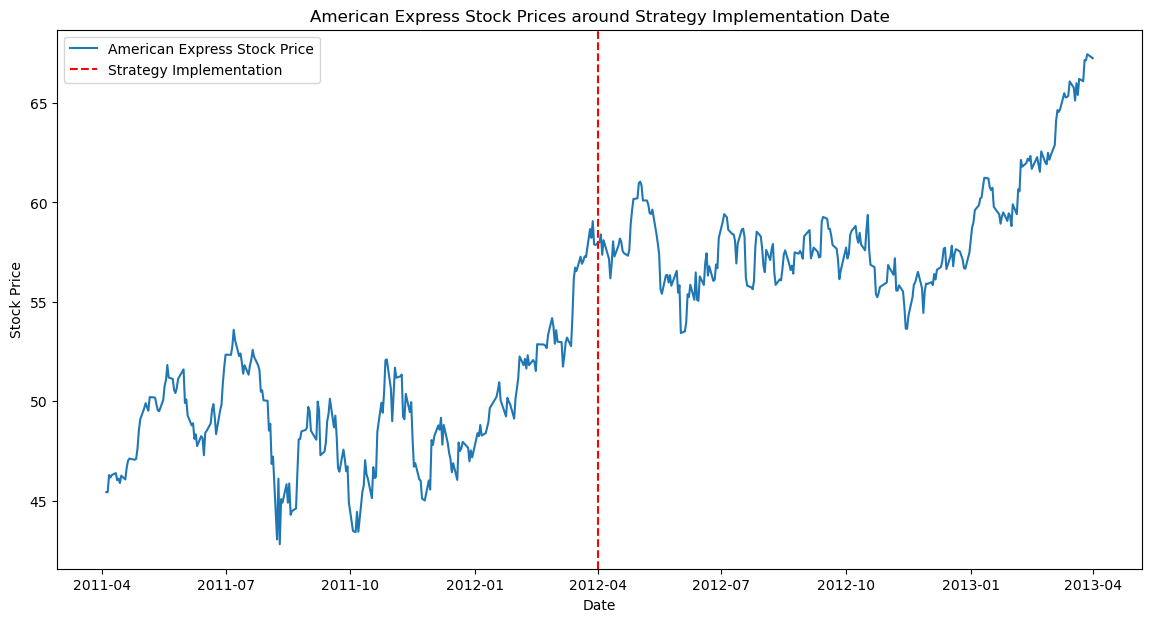

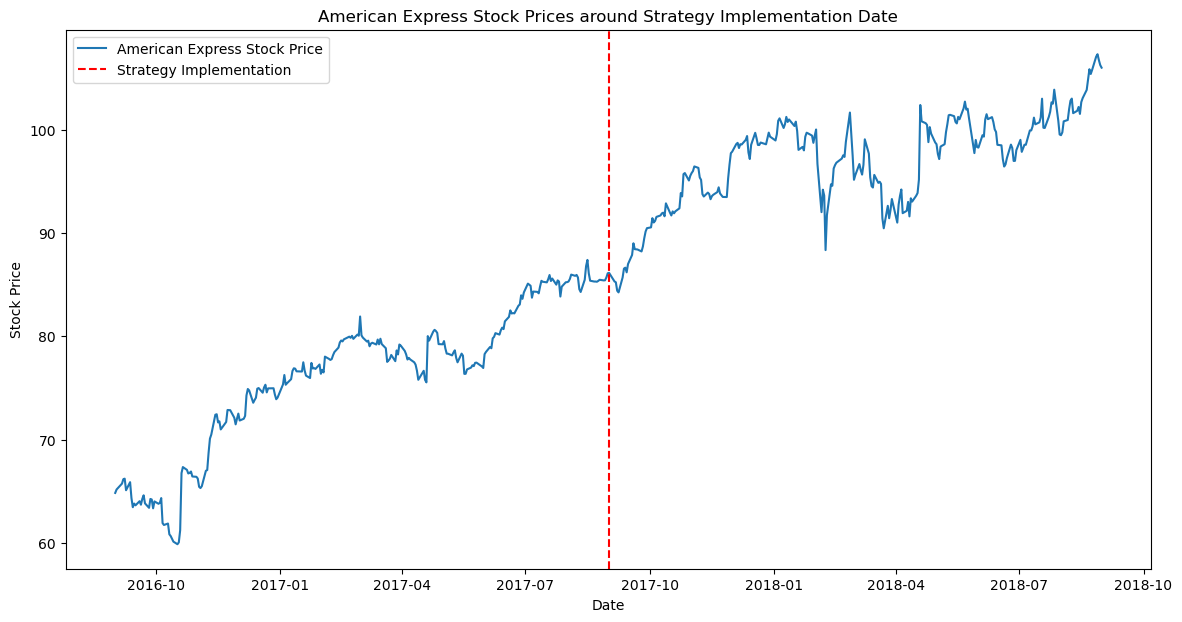

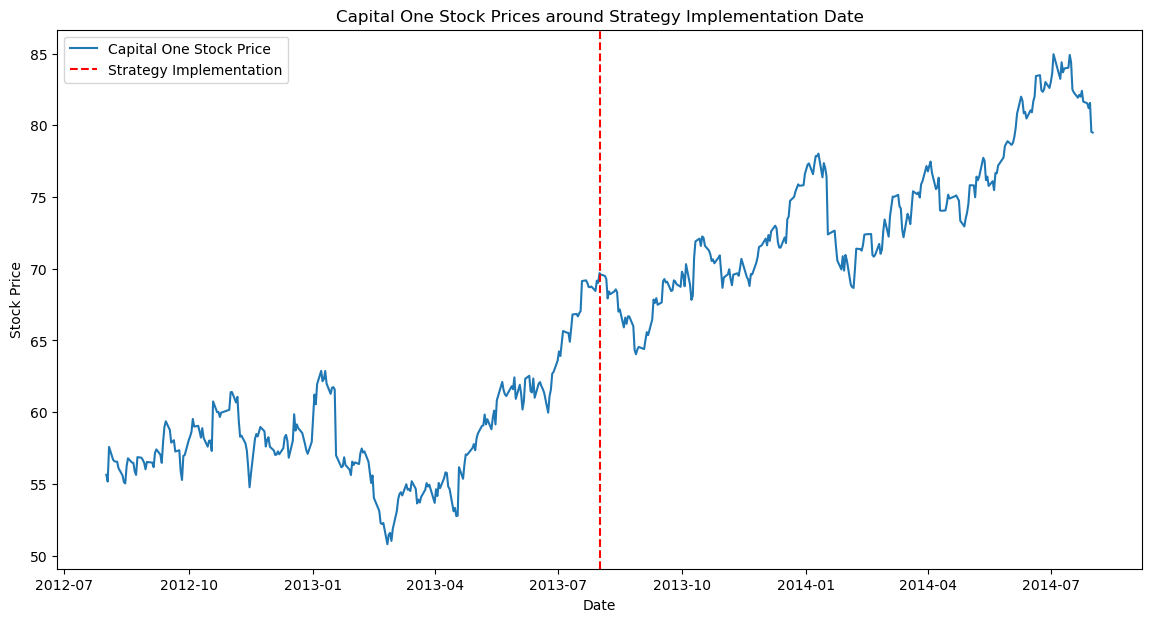

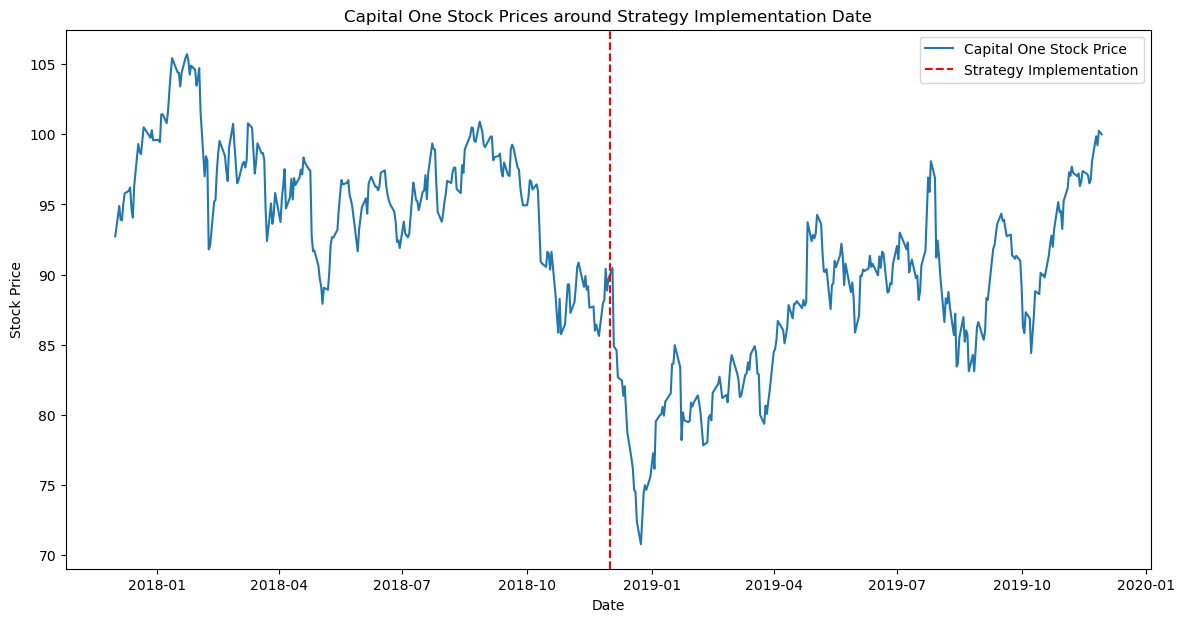

In [66]:
# Assuming df is your DataFrame with stock prices indexed by date
df = pd.read_csv('/Users/wilson/Desktop/Diss/Stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Adjust the key names to match your DataFrame column names
column_map = {
    'MasterCard': 'Close_M',
    'Visa': 'Close_V',
    'American Express': 'Close_AXP',
    'Capital One': 'Close_COF'
}

for company, dates in strategy_dates.items():
    column_name = column_map[company]  # Get the correct column name for each company
    for date in dates:
        start_date = date - pd.Timedelta(days=365)
        end_date = date + pd.Timedelta(days=365)
        period = df.loc[start_date:end_date, column_name]
        
        plt.figure(figsize=(14, 7))
        plt.plot(period.index, period, label=f'{company} Stock Price')
        plt.axvline(x=date, color='red', linestyle='--', label='Strategy Implementation')
        plt.title(f'{company} Stock Prices around Strategy Implementation Date')
        plt.xlabel('Date')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.show()

*Inference*: The visualizations highlight how these strategic decisions might have influenced stock price trends. For instance, red vertical lines mark the dates when each company implemented key strategies, allowing us to observe any immediate or long-term changes in stock performance. The findings suggest that stock prices often showed growth after the strategies were implemented, signifying potential investor confidence or favorable market reception to these decisions.

In [67]:
for company, dates in strategy_dates.items():
    column_name = column_map[company]
    for date in dates:
        # Get the closest available date before and after the strategy date
        before_date = df.index[df.index.get_loc(date - pd.Timedelta(days=1), method='pad')]
        after_date = df.index[df.index.get_loc(date + pd.Timedelta(days=1), method='backfill')]
        
        # Fetch the corresponding prices
        before = df.loc[before_date, column_name]
        after = df.loc[after_date, column_name]
        
        # Calculate the percentage change
        percentage_change = (after - before) / before * 100
        print(f'{company} - Strategy Date: {date.date()} - Change: {percentage_change:.2f}%')

MasterCard - Strategy Date: 2010-06-01 - Change: -0.40%
MasterCard - Strategy Date: 2015-01-01 - Change: -0.56%
Visa - Strategy Date: 2011-03-01 - Change: 1.26%
Visa - Strategy Date: 2016-07-01 - Change: 0.67%
American Express - Strategy Date: 2012-04-01 - Change: 0.26%
American Express - Strategy Date: 2017-09-01 - Change: -0.92%
Capital One - Strategy Date: 2013-08-01 - Change: 0.83%
Capital One - Strategy Date: 2018-12-01 - Change: 0.88%


/var/folders/nt/_qkwqcx50cs17gqb0sgr5cfh0000gn/T/ipykernel_85808/2016300306.py:5: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  before_date = df.index[df.index.get_loc(date - pd.Timedelta(days=1), method='pad')]
/var/folders/nt/_qkwqcx50cs17gqb0sgr5cfh0000gn/T/ipykernel_85808/2016300306.py:6: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  after_date = df.index[df.index.get_loc(date + pd.Timedelta(days=1), method='backfill')]


*Inference*: The immediate stock price changes for MasterCard, Visa, American Express, and Capital One around their respective strategy implementation dates show relatively modest movements. The changes range from a slight decline of -0.92% for American Express to a modest increase of 1.26% for Visa. These results indicate that while there may be some short-term market reactions to strategic decisions, the impact is generally minimal within the immediate time frame around the implementation date. 

### Regression Analysis with and without Macroeconomic Indicators:

In this analysis, the relationship between stock prices of four major financial companies—MasterCard, Visa, American Express, and Capital One—and key macroeconomic indicators: interest rates, inflation rates, unemployment rates, and GDP were examined. Two regression models were employed for each stock: one without macroeconomic indicators, using only the time index as a predictor, and another including the macroeconomic variables as additional predictors. This allows for assessing whether incorporating macroeconomic factors improves the explanatory power of the models.

The results were summarized in terms of R-squared, adjusted R-squared, F-statistic, and p-values for each macroeconomic variable to understand their significance in explaining stock price movements.

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from fredapi import Fred
from datetime import datetime, timedelta

# Initialize Fred API with your API key
fred = Fred(api_key='6a9f004262762e6cd7b84305b4cfdcde')

# Get today's date and a date range of 31 days prior
today = datetime.today().strftime('%Y-%m-%d')
thirty_one_days_ago = (datetime.today() - timedelta(days=31)).strftime('%Y-%m-%d')

# Define start and end dates for your analysis
start_date = '2008-04-02'
end_date = today  # Set end date to today

# Fetch the macroeconomic data from FRED
interest_rate = fred.get_series('DFF', start=start_date, end=end_date)
inflation_rate = fred.get_series('CPIAUCSL', start=start_date, end=end_date)
unemployment_rate = fred.get_series('UNRATE', start=start_date, end=end_date)
gdp = fred.get_series('GDP', start=start_date, end=end_date)

# Combine into a DataFrame
macro_data = pd.DataFrame({
    'Interest_Rate': interest_rate,
    'Inflation_Rate': inflation_rate.pct_change() * 100,  # percentage change in inflation
    'Unemployment_Rate': unemployment_rate,
    'GDP': gdp
})

# Resample and forward-fill missing values for monthly data
macro_data = macro_data.resample('M').mean().ffill()

# Ensure end date is within the valid range
macro_data = macro_data.loc[start_date:end_date]

# Read stock data
df = pd.read_csv('/Users/wilson/Desktop/Diss/Stock_data.csv', parse_dates=['Date'], index_col='Date')

# Filter stock data to match the available macroeconomic data
df = df.loc[start_date:end_date]

# Merge stock data with macroeconomic data
combined_data = df.join(macro_data, how='inner')
combined_data.dropna(inplace=True)

# Regression Models
def regression_no_macro(y):
    """Regression without macroeconomic indicators."""
    X_no_macro = sm.add_constant(range(len(y)))  # Use time index as predictor
    model_no_macro = sm.OLS(y, X_no_macro).fit()
    return model_no_macro

def regression_with_macro(y, X_macro):
    """Regression with macroeconomic indicators."""
    X_macro = sm.add_constant(X_macro)
    model_with_macro = sm.OLS(y, X_macro).fit()
    return model_with_macro

# Perform regression for each stock
X_macro = combined_data[['Interest_Rate', 'Inflation_Rate', 'Unemployment_Rate', 'GDP']]

# Stock price columns and their respective names
stocks = ['Close_M', 'Close_V', 'Close_AXP', 'Close_COF']
stock_names = ['MasterCard', 'Visa', 'American Express', 'Capital One']

# Dictionaries to store models
models_no_macro = {}
models_with_macro = {}

# Perform regression for each stock
for stock, name in zip(stocks, stock_names):
    y = combined_data[stock]
    
    # Without Macroeconomic Indicators
    models_no_macro[stock] = regression_no_macro(y)
    
    # With Macroeconomic Indicators
    models_with_macro[stock] = regression_with_macro(y, X_macro)

# Generate and display predictions
for stock, name in zip(stocks, stock_names):
    y = combined_data[stock]
    dates = combined_data.index
    
    # Predictions without macroeconomic indicators
    pred_no_macro = models_no_macro[stock].predict(sm.add_constant(range(len(y))))
    
    # Predictions with macroeconomic indicators
    pred_with_macro = models_with_macro[stock].predict(sm.add_constant(X_macro))

# Display Regression Summaries for Each Stock
for stock, name in zip(stocks, stock_names):
    print(f"{name} without macroeconomic indicators:")
    print(models_no_macro[stock].summary())
    print("\n")

    print(f"{name} with macroeconomic indicators:")
    print(models_with_macro[stock].summary())
    print("\n")

# Create Summary Table
def extract_regression_metrics(model, stock_name, macro_status):
    return {
        'Stock': stock_name,
        'Model': macro_status,
        'R-squared (R²)': round(model.rsquared, 3),
        'Adj. R-squared': round(model.rsquared_adj, 3),
        'F-statistic': round(model.fvalue, 2),
        'Prob (F-stat)': round(model.f_pvalue, 5),
        'P-value (Interest_Rate)': round(model.pvalues.get('Interest_Rate', float('nan')), 5),
        'P-value (Inflation_Rate)': round(model.pvalues.get('Inflation_Rate', float('nan')), 5),
        'P-value (Unemployment_Rate)': round(model.pvalues.get('Unemployment_Rate', float('nan')), 5),
        'P-value (GDP)': round(model.pvalues.get('GDP', float('nan')), 5),
    }

# Initialize an empty list to store the rows of the table
table_data = []

# Extract metrics for each stock
for stock, name in zip(stocks, stock_names):
    # Extract metrics for the model without macroeconomic indicators
    no_macro_metrics = extract_regression_metrics(models_no_macro[stock], name, 'No Macro')
    table_data.append(no_macro_metrics)
    
    # Extract metrics for the model with macroeconomic indicators
    with_macro_metrics = extract_regression_metrics(models_with_macro[stock], name, 'With Macro')
    table_data.append(with_macro_metrics)

# Convert the list of dictionaries into a pandas DataFrame
summary_table = pd.DataFrame(table_data)

# Reorganize the table for better readability
summary_table = summary_table[['Stock', 'Model', 'R-squared (R²)', 'Adj. R-squared', 'F-statistic', 'Prob (F-stat)', 
                               'P-value (Interest_Rate)', 'P-value (Inflation_Rate)', 'P-value (Unemployment_Rate)', 'P-value (GDP)']]

# Display the summary table
print(summary_table)


MasterCard without macroeconomic indicators:
                            OLS Regression Results                            
Dep. Variable:                Close_M   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     1247.
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           4.72e-70
Time:                        22:46:07   Log-Likelihood:                -711.68
No. Observations:                 137   AIC:                             1427.
Df Residuals:                     135   BIC:                             1433.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

In [8]:
import pandas as pd

# Function to extract key metrics from regression model
def extract_regression_metrics(model, stock_name, macro_status):
    return {
        'Stock': stock_name,
        'Model': macro_status,
        'R-squared (R²)': round(model.rsquared, 3),
        'Adj. R-squared': round(model.rsquared_adj, 3),
        'F-statistic': round(model.fvalue, 2),
        'Prob (F-stat)': round(model.f_pvalue, 5),
        'P-value (Interest_Rate)': model.pvalues.get('Interest_Rate', 'N/A'),
        'P-value (Inflation_Rate)': model.pvalues.get('Inflation_Rate', 'N/A'),
        'P-value (Unemployment_Rate)': model.pvalues.get('Unemployment_Rate', 'N/A'),
        'P-value (GDP)': model.pvalues.get('GDP', 'N/A'),
    }

# Initialize an empty list to store the rows of the table
table_data = []

# Stocks and stock names for comparison
stocks = ['Close_M', 'Close_V', 'Close_AXP', 'Close_COF']
stock_names = ['MasterCard', 'Visa', 'American Express', 'Capital One']

# Extract metrics for each stock
for stock, name in zip(stocks, stock_names):
    # Extract metrics for the model without macroeconomic indicators
    no_macro_metrics = extract_regression_metrics(models_no_macro[stock], name, 'No Macro')
    table_data.append(no_macro_metrics)
    
    # Extract metrics for the model with macroeconomic indicators
    with_macro_metrics = extract_regression_metrics(models_with_macro[stock], name, 'With Macro')
    table_data.append(with_macro_metrics)

# Convert the list of dictionaries into a pandas DataFrame
summary_table = pd.DataFrame(table_data)

# Reorganize the table for better readability
summary_table = summary_table[['Stock', 'Model', 'R-squared (R²)', 'Adj. R-squared', 'F-statistic', 'Prob (F-stat)', 
                               'P-value (Interest_Rate)', 'P-value (Inflation_Rate)', 'P-value (Unemployment_Rate)', 'P-value (GDP)']]

# Ensure that numerical columns are formatted properly
pd.set_option('display.float_format', '{:.5f}'.format)

# Replace NaN values with "N/A" for better readability in P-values
summary_table.fillna("N/A", inplace=True)

# Display the summary table in Jupyter
from IPython.display import display
display(summary_table)

# Optional: Save the table to a CSV file
summary_table.to_csv('summary_table.csv', index=False)

Stock       Model  R-squared (R²)  Adj. R-squared  F-statistic  Prob (F-stat) P-value (Interest_Rate) P-value (Inflation_Rate) P-value (Unemployment_Rate) P-value (GDP)
0        MasterCard    No Macro         0.90200         0.90200   1246.88000        0.00000                     N/A                      N/A                         N/A           N/A
1        MasterCard  With Macro         0.94500         0.94400    571.41000        0.00000                 0.00517                  0.29449                     0.00000       0.00000
2              Visa    No Macro         0.93300         0.93300   1883.59000        0.00000                     N/A                      N/A                         N/A           N/A
3              Visa  With Macro         0.94500         0.94300    562.55000        0.00000                 0.00012                  0.95837                     0.00014       0.00000
4  American Express    No Macro         0.83400         0.83300    679.89000        0.00000                     N/A                      N/A                         N/A           N/A
5  American Express  With Macro         0.90900         0.90700    331.42000        0.00000                 0.18085                  0.17154                     0.34038       0.00000
6       Capital One    No Macro         0.74500         0.74300    394.94000        0.00000                     N/A                      N/A                         N/A           N/A
7       Capital One  With Macro         0.84100         0.83600    174.11000        0.00000                 0.00000                  0.12605                     0.00000       0.00000

*Inference:* The models including macroeconomic factors (interest rates, inflation, unemployment, and GDP) show higher R-squared and adjusted R-squared values compared to models without them. This suggests that macroeconomic variables improve the models' explanatory power. For instance, MasterCard's R-squared improved from 0.92 to 0.945 with the inclusion of macroeconomic indicators. Additionally, some macroeconomic variables, such as unemployment rate and GDP, have highly significant p-values, indicating their strong influence on stock price movements. This implies that incorporating these economic factors can provide a more robust model for predicting stock prices.